### This notebook actually calculates a representative subsample of GBS. ROC Curves are therefore combined with increasing brightness to demonstrate the progress. Iterations stop around 0.5.

In [34]:
from pathlib import Path
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

path = Path(os.getcwd()).parent

def puROC(auc, pos):
    return (auc - pos/2)/(1-pos)

def roc(y_test, preds, iteration, name):
    alpha = min(iteration+0.2,0.8)
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    #plt.title('Iteration: '+ str(name))
    plt.figure(figsize=(12,8))
    label = 'puAUC = %0.2f' % roc_auc + '\n puAUC = %0.2f' % puROC(roc_auc, 0.29)
    plt.plot(fpr, tpr, 'black', label = label, alpha=alpha)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'k--', alpha=alpha)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig(os.path.join(path, 'tex/fig/roc/'+str(name)+'.png'))
    plt.show()
    return roc_auc

In [35]:
gbs = pd.read_csv(os.path.join(path, 'data/gbs_processed.csv'), encoding = "ISO-8859-1", delimiter = ',')
gesis = pd.read_csv(os.path.join(path, 'data/gesis_processed.csv'), encoding = "ISO-8859-1", delimiter = ',')

gbs = gbs.fillna(gbs.median())
gesis = gesis.fillna(gesis.median())

gbs['Umfrage'] = 1
gesis['Umfrage'] = 0

In [36]:
gesis.drop(columns = ['GESIS-CODE'], axis=1, inplace = True)
gbs.drop(columns = ['GBS-CODE', 'Gruppe'], axis=1, inplace = True)

drop = ['Personen im Haushalt', 'Druck', 'Optimismus Zukunft', 'Geburtsland', 'Nationalitaet',
       'Familienstand', 'Hoechster Bildungsabschluss', 'Berufliche Ausbildung',
       'Berufsgruppe', 'Leben genießen', 'Zu Nichts aufraffen',
       'Alles anstrengend', 'Zufriedenheit Leben', 'Aktiv', 'Verärgert',
       'Zufriedenheit Wahlergebnis', 'Resilienz', 'Wach', 'Nervös', 'Ängstlich', 'Zurueckhaltend',
       'Nettoeinkommen Selbst', 'Nettoeinkommen Haushalt', 'Schlechter Schlaf',
       'Wahlabsicht', 'Desinteresse Politiker']

gbs.drop(columns=drop, axis=1, inplace=True)
gesis.drop(columns=drop, axis=1, inplace=True)

gbs_base = gbs.copy()

[0.03523816 0.18638615 0.36623899 0.06211838 0.08979483 0.03253477
 0.02938268 0.0415542  0.02382224 0.030103   0.02184125 0.0482288
 0.03275657]


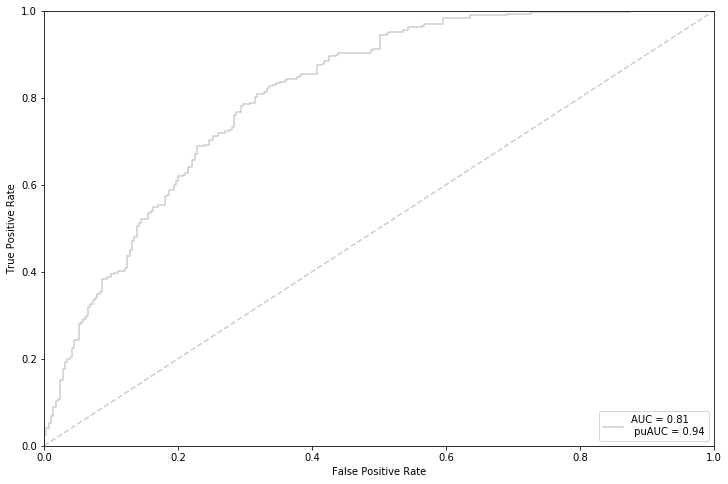

[0.02819621 0.21478887 0.3517682  0.02955045 0.05792924 0.03956716
 0.03702859 0.04692622 0.03296945 0.02343024 0.02312514 0.0533749
 0.06134533]


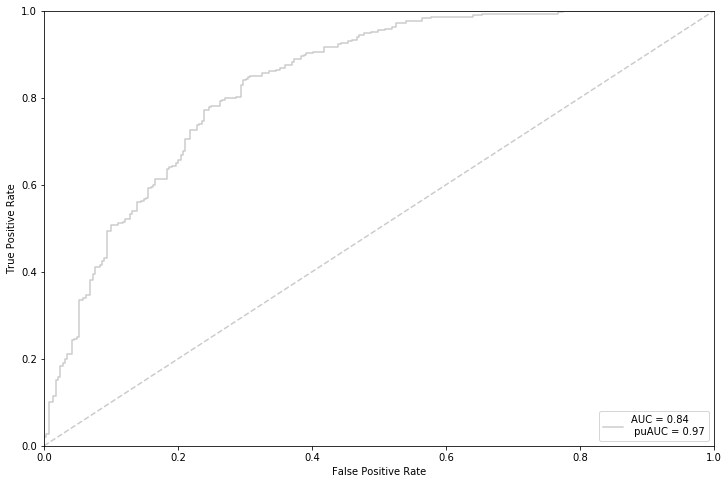

[0.03286754 0.21587983 0.33769173 0.05257517 0.07983455 0.03839085
 0.03608923 0.07503711 0.02243253 0.02158588 0.01967294 0.03958765
 0.02835499]


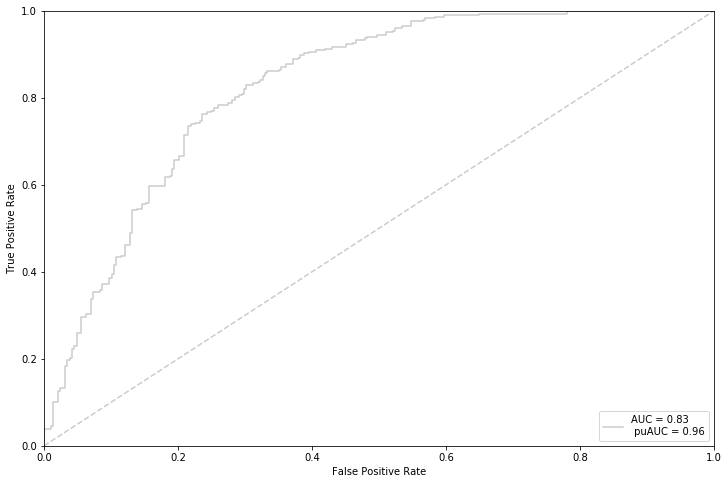

[0.01591069 0.20821227 0.31726457 0.07182035 0.089001   0.03663147
 0.0304541  0.06494515 0.02610735 0.02125231 0.01850574 0.04464409
 0.05525093]


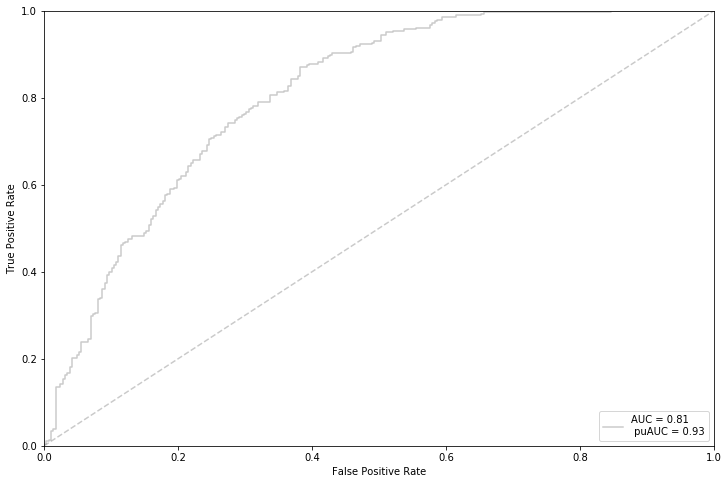

[0.03039288 0.21034888 0.3110661  0.05353653 0.06618162 0.05195593
 0.03261762 0.06556553 0.05512231 0.02052586 0.02944385 0.04048537
 0.03275753]


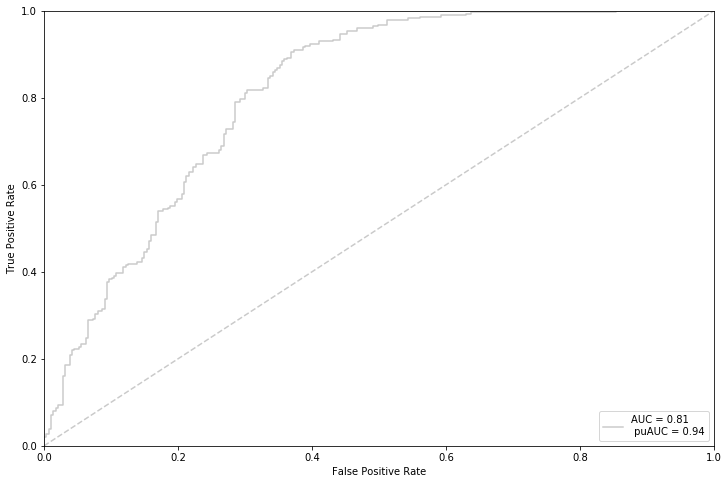

[0.02084916 0.22451676 0.37003396 0.04402466 0.0778413  0.04181192
 0.03814652 0.03488186 0.02468676 0.01697041 0.02162822 0.06056625
 0.02404222]


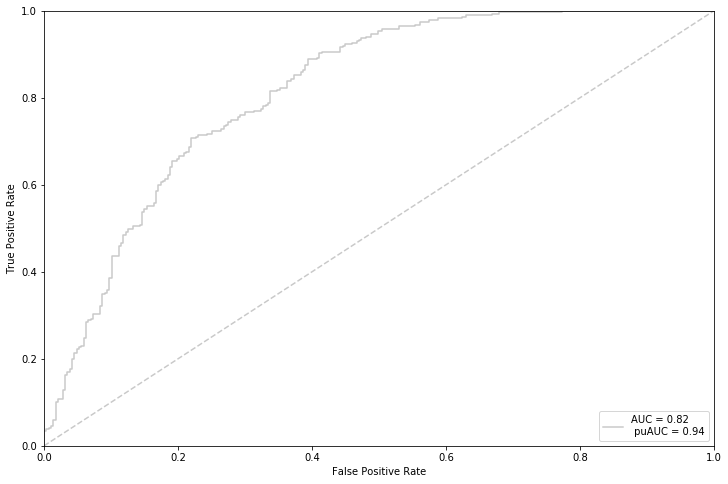

[0.03388974 0.24174953 0.29010877 0.06843088 0.07530286 0.047935
 0.0510543  0.03694262 0.02050582 0.02346081 0.01754357 0.07210104
 0.02097507]


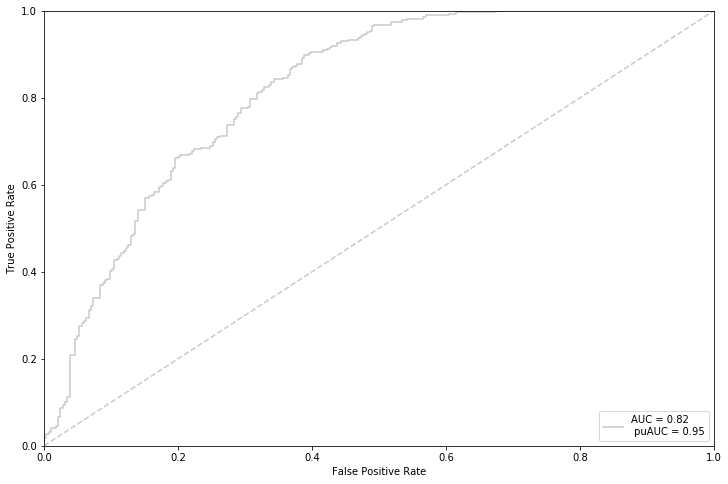

[0.02917231 0.19683512 0.33248371 0.03497315 0.09435362 0.04215887
 0.04261637 0.0393989  0.02211212 0.02775662 0.01887982 0.06597472
 0.05328467]


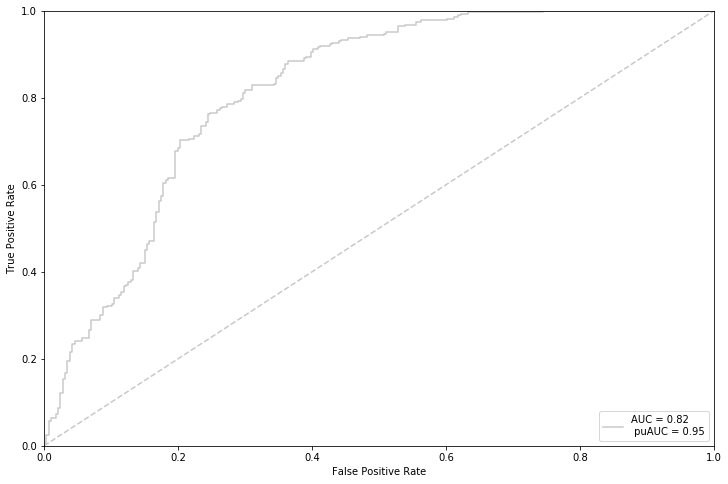

[0.03285551 0.24142379 0.32377317 0.01916382 0.08324153 0.06830071
 0.06241175 0.0303166  0.02825043 0.0174416  0.02065102 0.04332865
 0.02884142]


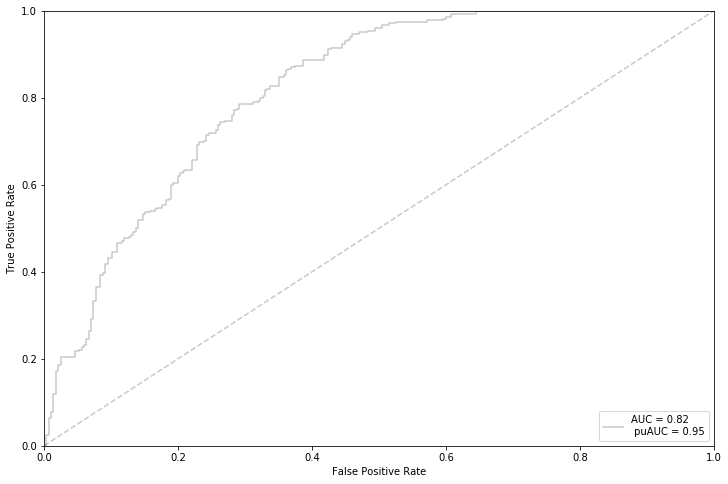

[0.03749085 0.24594056 0.3030573  0.06125282 0.05734978 0.03361742
 0.04119696 0.04891825 0.02122776 0.02757675 0.01988755 0.0632642
 0.03921979]


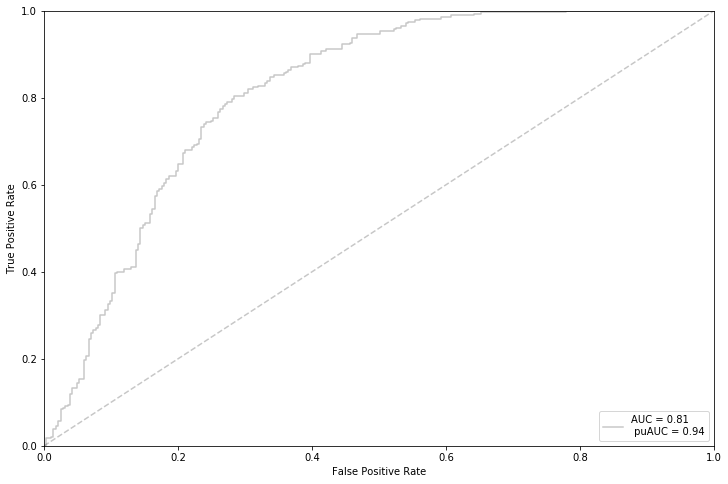

[0.02073514 0.22315638 0.32502091 0.08893327 0.07532033 0.02204267
 0.03747142 0.05580846 0.02024082 0.0159628  0.01680113 0.06786835
 0.03063831]


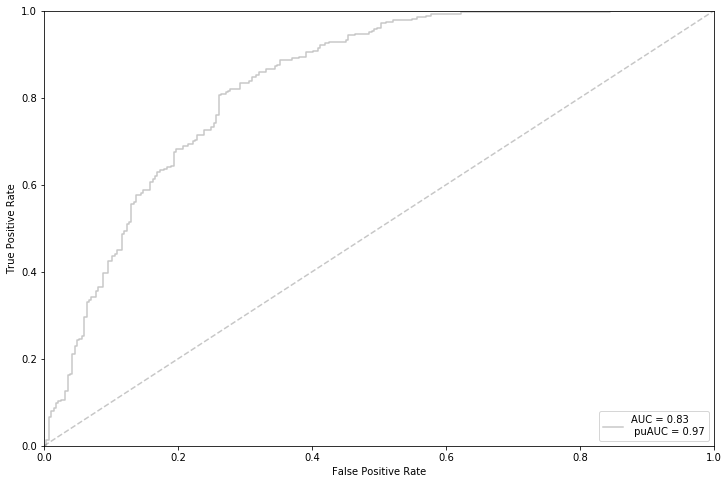

[0.01653257 0.18831688 0.39529374 0.06918898 0.08777227 0.03473995
 0.05203282 0.0329299  0.02533728 0.01738935 0.01756259 0.02433459
 0.03856907]


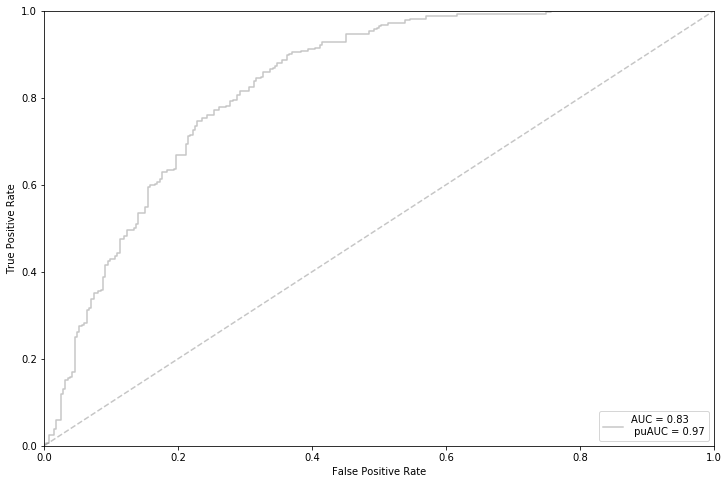

[0.02365123 0.20778027 0.35997435 0.03127601 0.05507235 0.04255321
 0.05557103 0.04426545 0.02670065 0.02030645 0.02238525 0.06457927
 0.04588449]


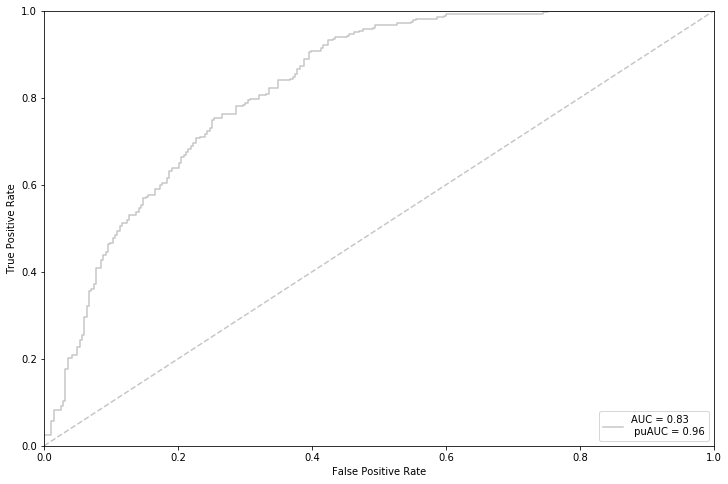

[0.0308946  0.20221765 0.32200493 0.05603667 0.09137693 0.05227905
 0.03431619 0.04983926 0.0298046  0.02052853 0.01694719 0.05043143
 0.04332296]


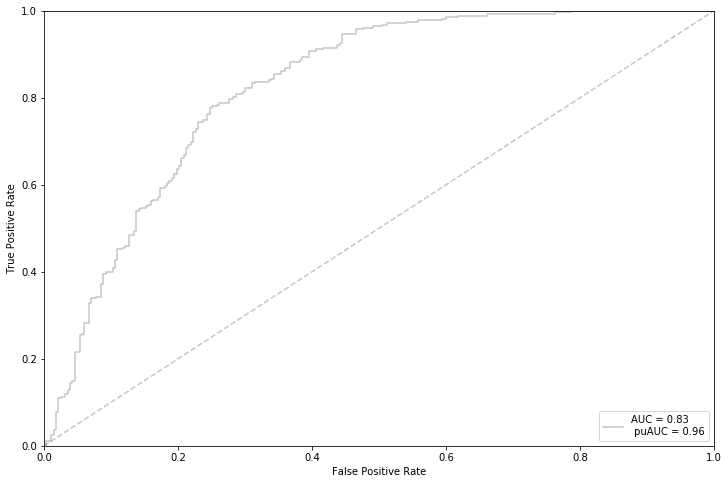

[0.01327204 0.19617894 0.29471528 0.0849868  0.12294487 0.03460433
 0.04136327 0.03573933 0.01799884 0.01847224 0.0196266  0.0721591
 0.04793835]


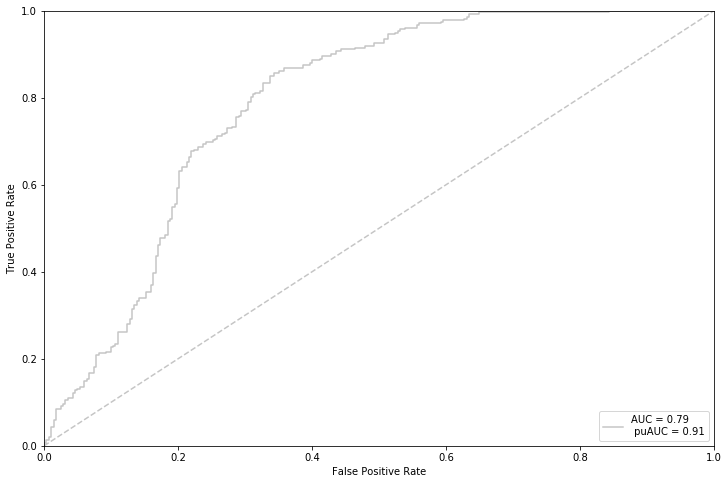

[0.03569875 0.23794637 0.29538299 0.06068839 0.11222788 0.03187885
 0.04326062 0.04617746 0.03017484 0.01926269 0.0218776  0.03800837
 0.02741518]


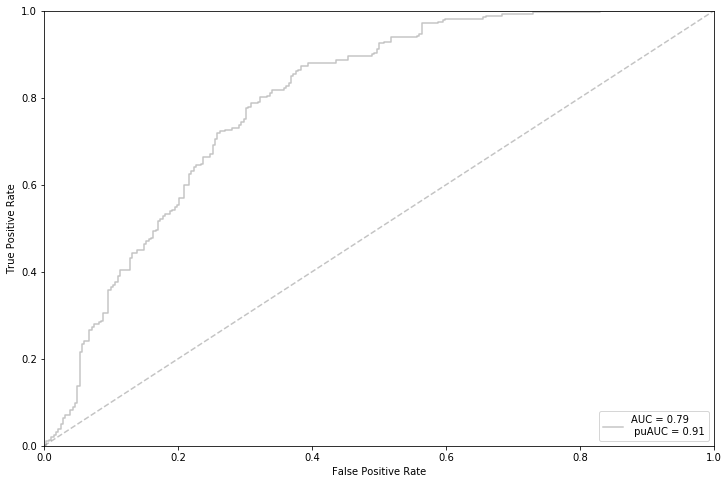

[0.03176763 0.20090099 0.34518729 0.05518339 0.06107666 0.0312309
 0.03561842 0.05106904 0.03625447 0.02592791 0.01629952 0.05568601
 0.05379778]


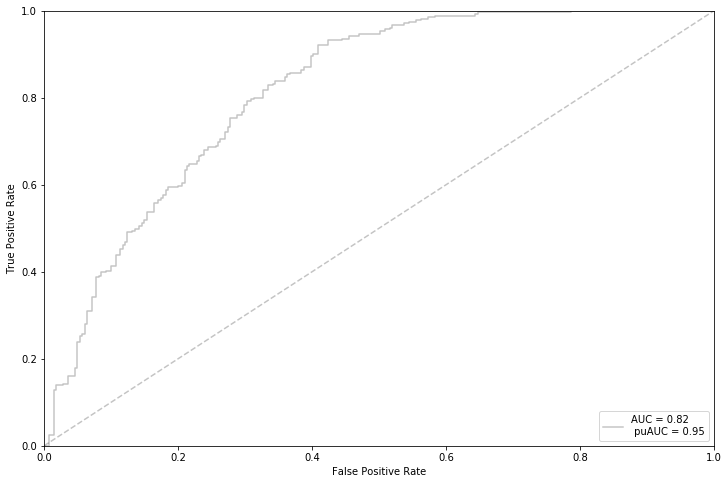

[0.02363788 0.28291615 0.25982424 0.03987125 0.08354963 0.05916941
 0.04375551 0.03946477 0.0192631  0.02553436 0.02005497 0.07337919
 0.02957954]


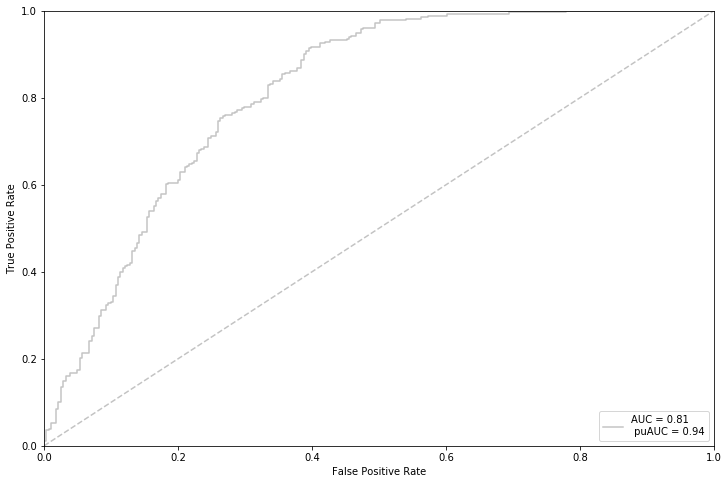

[0.03466178 0.17461726 0.34182378 0.06270347 0.09281818 0.04133932
 0.05534334 0.04517759 0.03327229 0.02080877 0.02254609 0.04338288
 0.03150526]


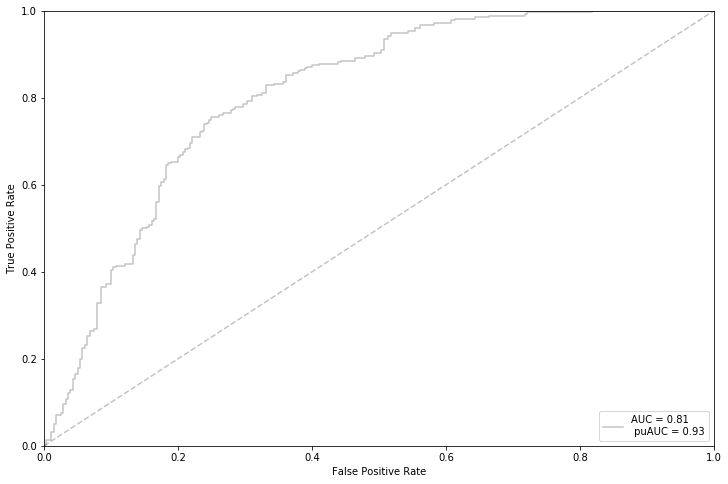

[0.01370934 0.21795184 0.34147694 0.03670197 0.09081662 0.03182568
 0.04496229 0.05005627 0.02894421 0.02074791 0.01524514 0.06953993
 0.03802184]


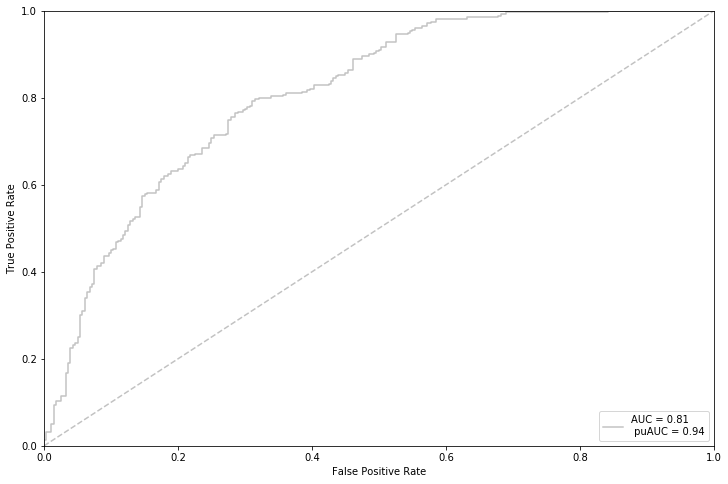

[0.04142594 0.18582883 0.30398294 0.04070892 0.06748964 0.04052925
 0.04400659 0.07592574 0.03603867 0.03121302 0.01981638 0.05179804
 0.06123604]


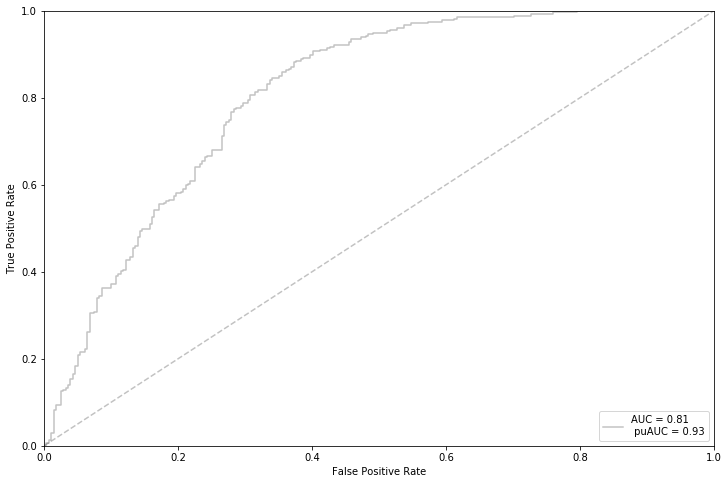

[0.02431883 0.2387886  0.35987414 0.05796551 0.05393362 0.05502589
 0.04034802 0.04246458 0.02197856 0.01659911 0.01588685 0.04321886
 0.02959743]


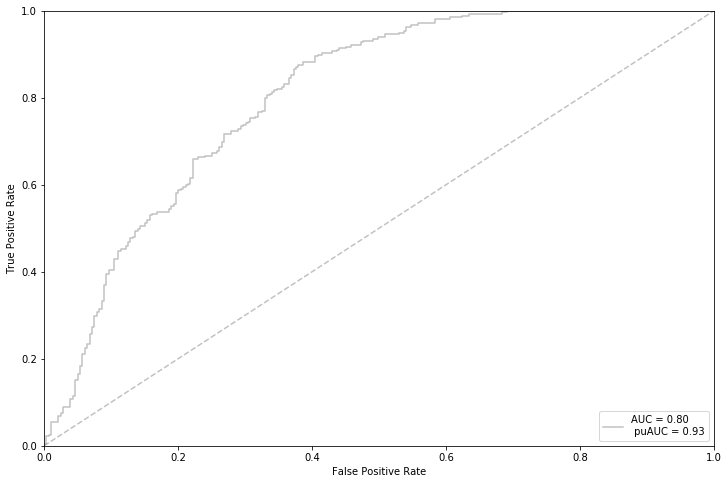

[0.02034559 0.19922915 0.34200739 0.03567528 0.04705266 0.03258408
 0.0455487  0.04848917 0.02584452 0.02911954 0.02277981 0.11549014
 0.03583398]


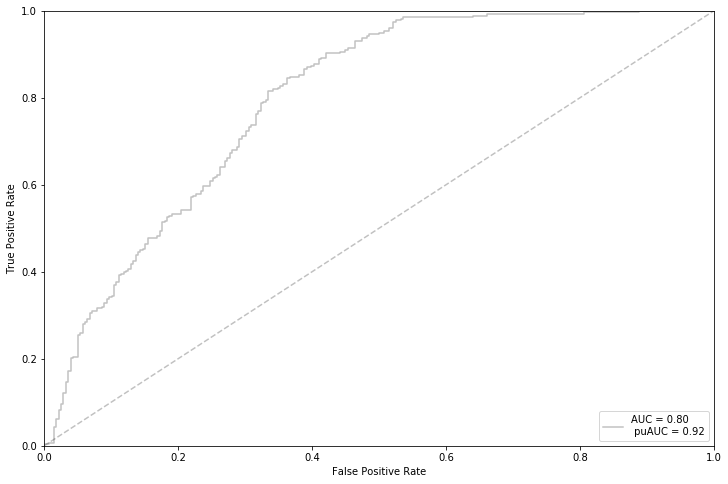

[0.02752267 0.22590524 0.36761709 0.05418334 0.07277312 0.05058369
 0.03310539 0.04326237 0.02239853 0.01770635 0.01105956 0.05479402
 0.01908864]


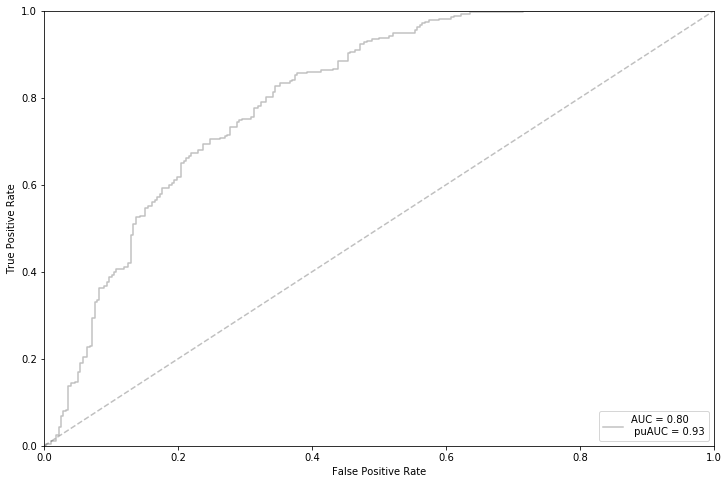

[0.02073467 0.30698941 0.2958117  0.02446325 0.07806166 0.04086528
 0.03573714 0.03852106 0.03129003 0.02325627 0.01876324 0.06247325
 0.02303305]


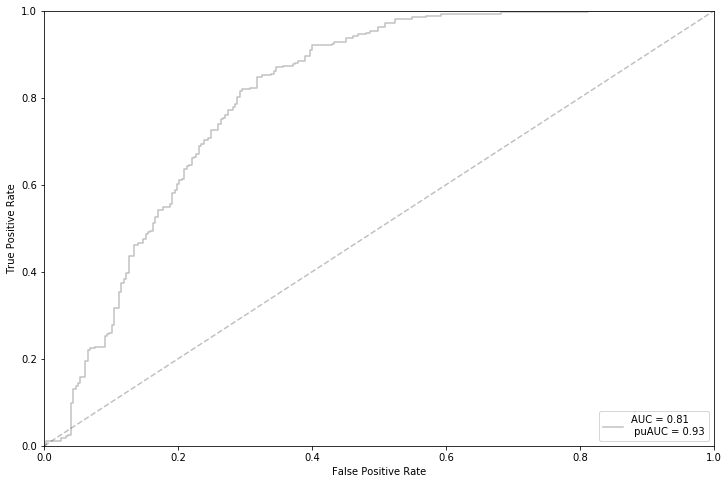

[0.03574383 0.24919584 0.31205213 0.05347273 0.08152772 0.0340865
 0.03109549 0.0402036  0.02766079 0.02882417 0.0293021  0.04372984
 0.03310525]


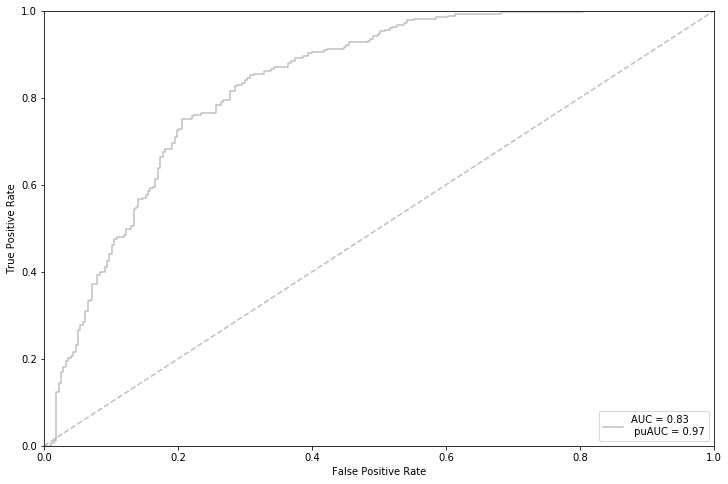

[0.03068212 0.21154262 0.29892979 0.06069162 0.08684039 0.04109667
 0.0363978  0.05619468 0.02222983 0.01932471 0.02201259 0.06325497
 0.0508022 ]


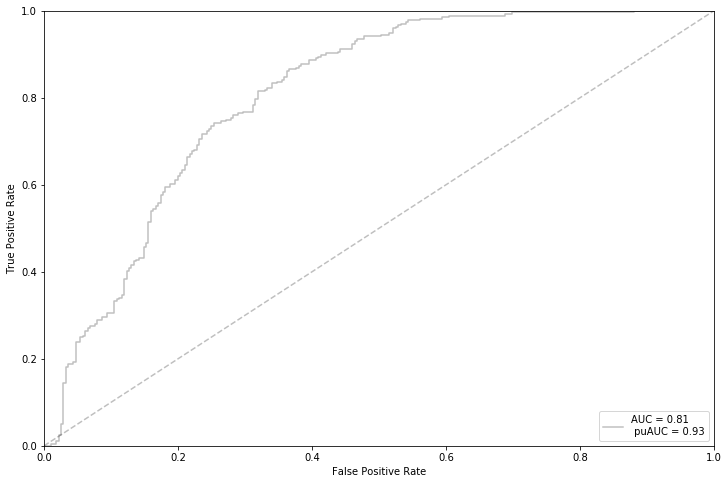

[0.02432136 0.22296294 0.3444127  0.04516351 0.04689514 0.04963143
 0.0368725  0.05550254 0.02630236 0.01862212 0.02277469 0.05327891
 0.05325981]


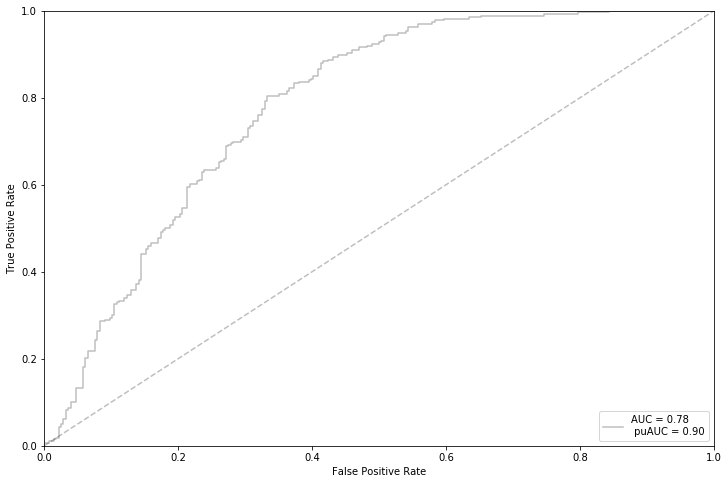

[0.04451346 0.22993369 0.29817273 0.05595764 0.08742083 0.04459505
 0.04259534 0.04842704 0.02198356 0.02057022 0.01760432 0.0536716
 0.03455451]


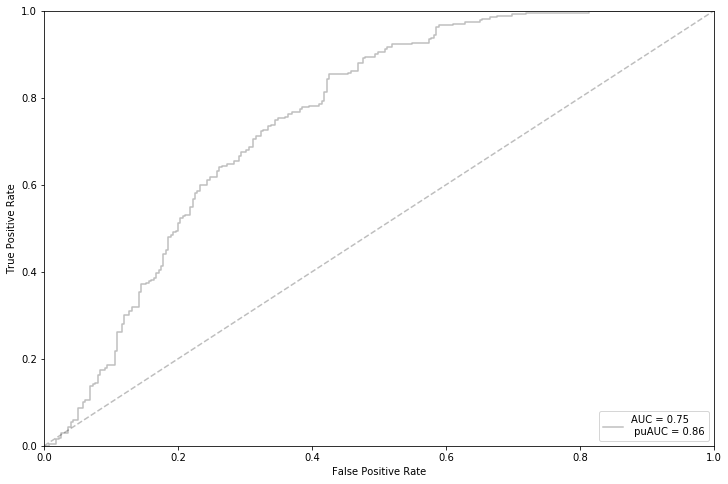

[0.02405484 0.17365227 0.33189392 0.08505929 0.05494411 0.02678315
 0.0366095  0.06373014 0.03641753 0.02834281 0.02634725 0.0674022
 0.04476301]


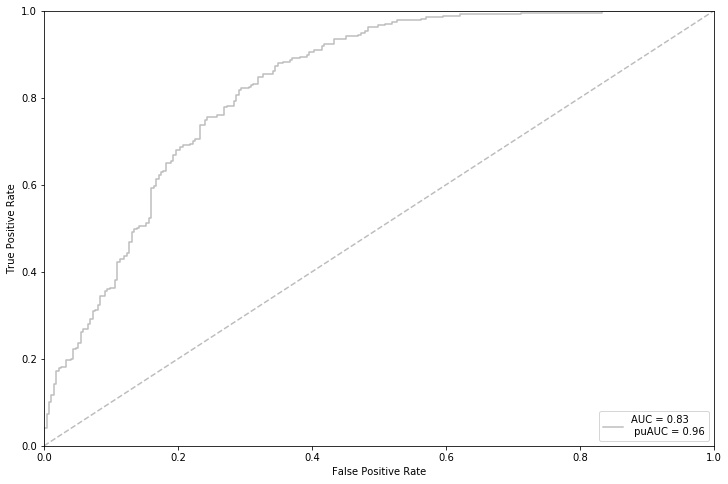

[0.01943611 0.25289824 0.3147883  0.06968574 0.07067017 0.03145375
 0.05201911 0.04730355 0.02065996 0.01807442 0.01287736 0.05890986
 0.03122345]


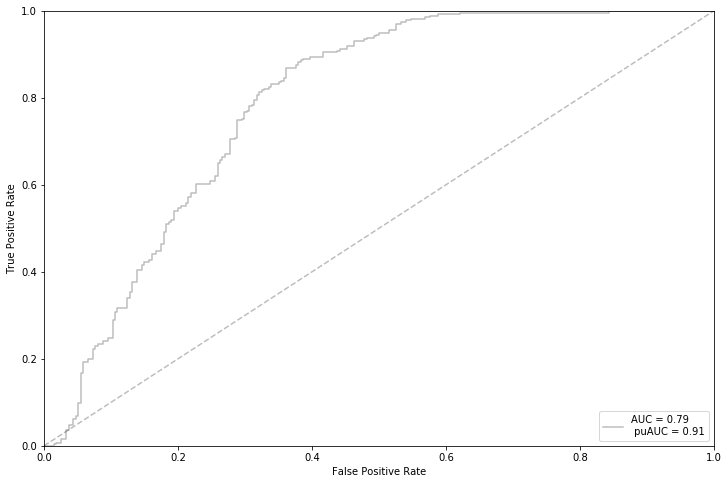

[0.04164372 0.26780563 0.27730128 0.03467272 0.05736799 0.05353468
 0.04820926 0.04690304 0.02443904 0.02369395 0.01685348 0.06295944
 0.04461576]


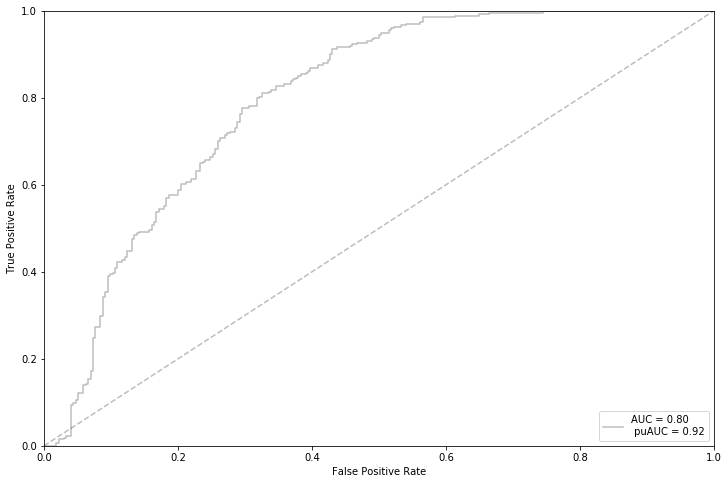

[0.0258828  0.2563535  0.3087074  0.0532313  0.06632587 0.05697959
 0.0445262  0.03751497 0.03056999 0.02177247 0.0210185  0.04492324
 0.03219417]


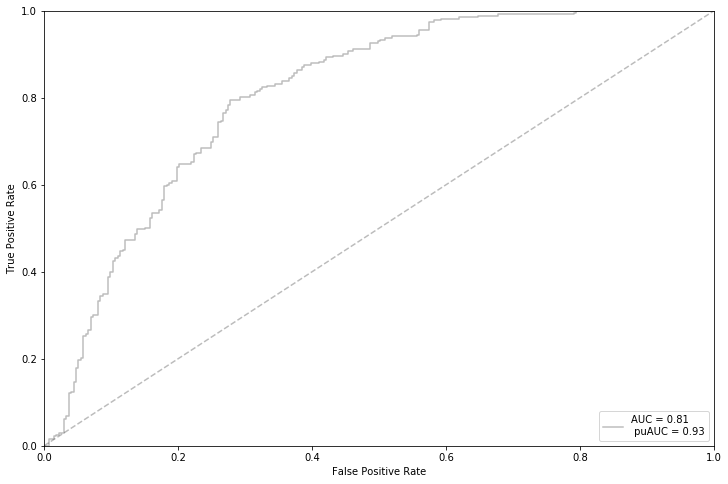

[0.03244574 0.23912497 0.31763312 0.04343136 0.074532   0.04346772
 0.0408838  0.05609888 0.02885207 0.02230726 0.01814355 0.05132979
 0.03174975]


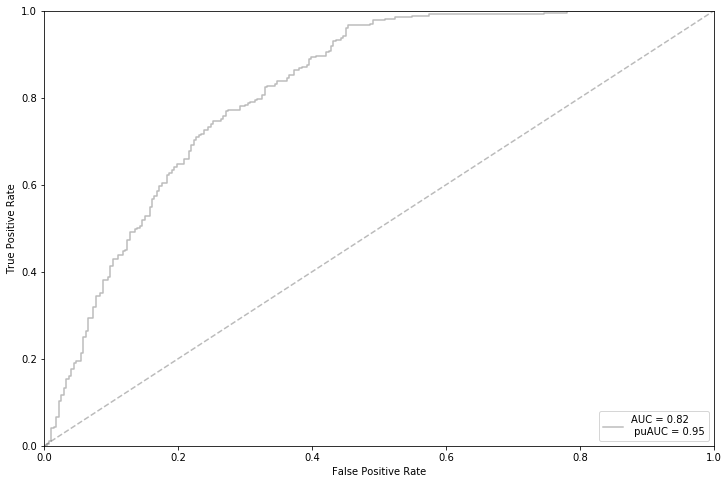

[0.02788194 0.23907449 0.3011853  0.08939243 0.08288085 0.05764117
 0.02700977 0.04770337 0.02902857 0.02035716 0.01704369 0.03396698
 0.02683428]


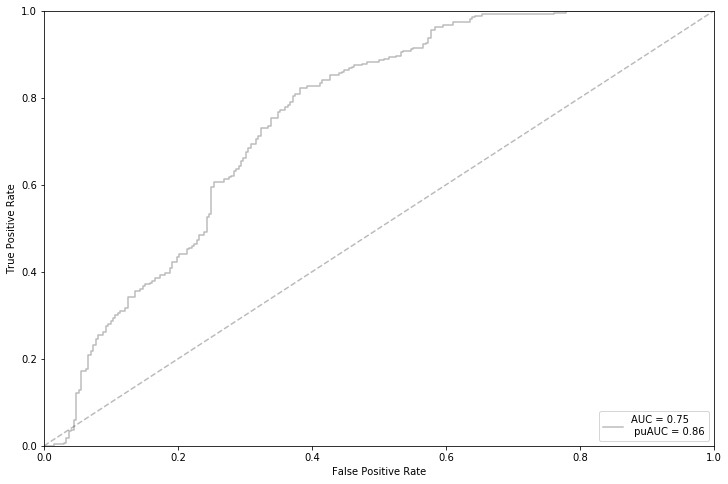

[0.02096207 0.28823974 0.29022104 0.02628145 0.06323108 0.04005161
 0.04434537 0.03895343 0.02354134 0.02480033 0.01491861 0.08126982
 0.04318412]


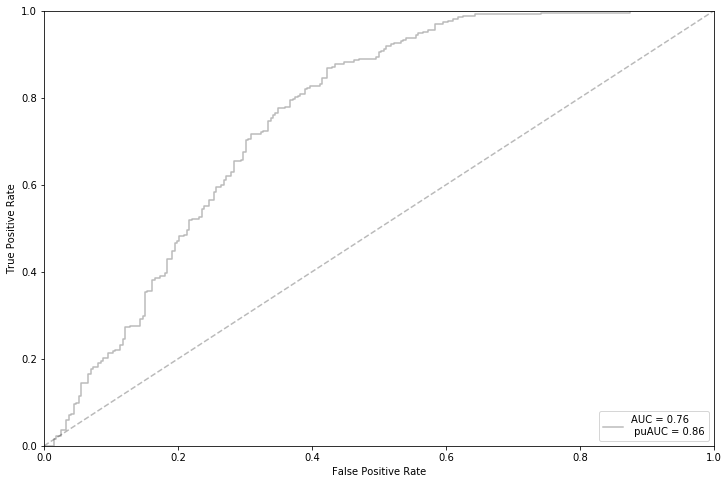

[0.02821978 0.22167147 0.31576664 0.04455581 0.09331793 0.03437974
 0.03765441 0.0496855  0.02650074 0.01984756 0.01911083 0.06080509
 0.04848448]


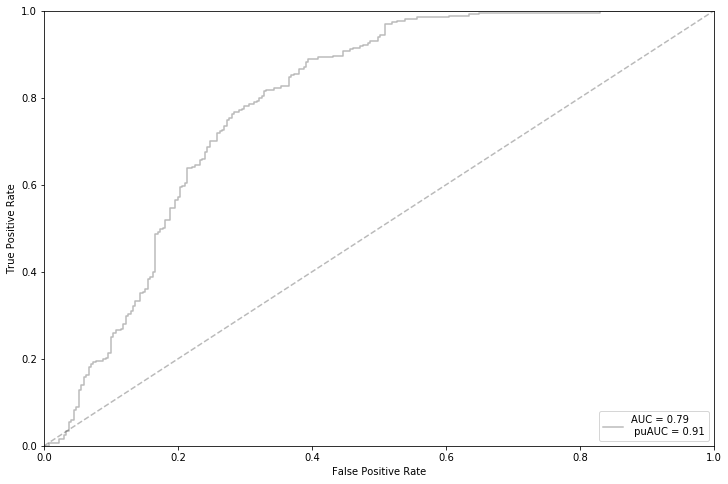

[0.03497481 0.20669967 0.34593609 0.0640926  0.04875024 0.03289473
 0.0385651  0.04975155 0.02660107 0.02074351 0.01684506 0.07457856
 0.03956702]


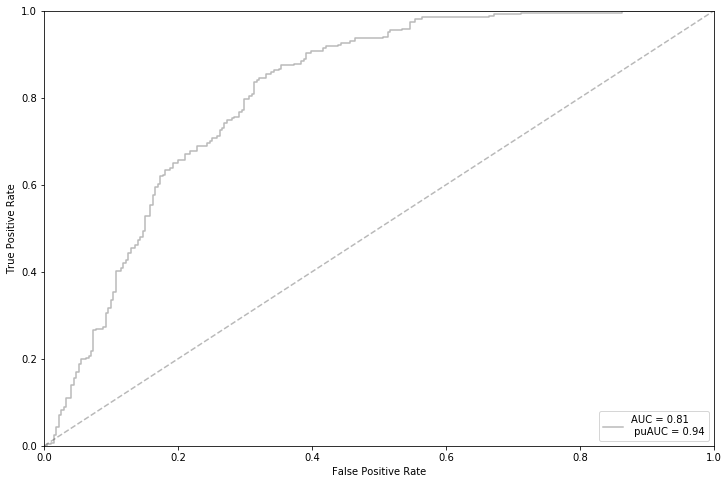

[0.03612814 0.2129166  0.23396569 0.08974312 0.09485365 0.02972393
 0.0450535  0.0672243  0.02207344 0.02225679 0.02380492 0.07724602
 0.04500989]


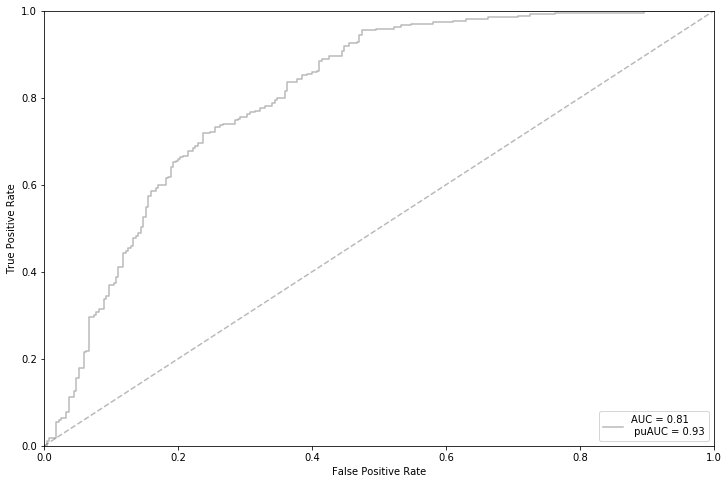

[0.03588967 0.22047592 0.3452868  0.06751397 0.04168297 0.03687265
 0.05941999 0.04147174 0.03250677 0.02706736 0.01769658 0.04763927
 0.02647633]


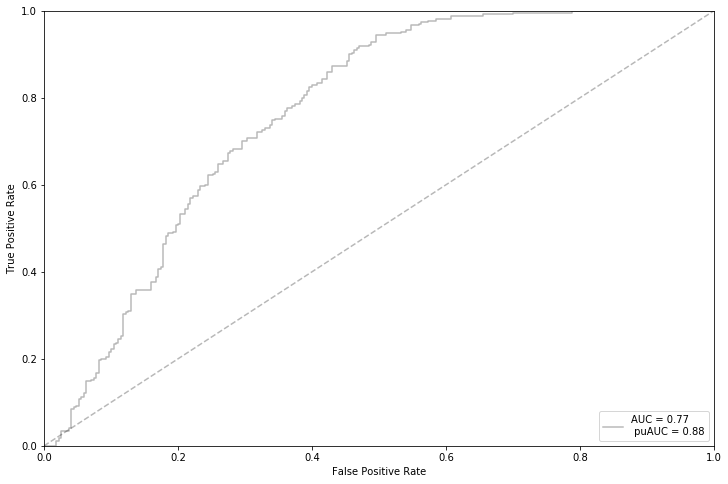

[0.02577364 0.21538467 0.34394685 0.04354884 0.04961688 0.03492173
 0.04459729 0.08658669 0.02929852 0.02296898 0.0182512  0.04989217
 0.03521254]


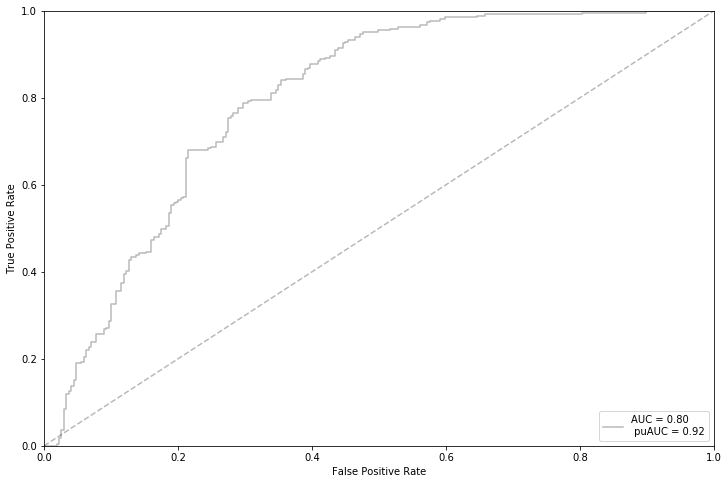

[0.02924295 0.24153107 0.31882564 0.05114271 0.05800104 0.03963265
 0.03283952 0.02998991 0.02874579 0.02978353 0.02093971 0.07234084
 0.04698464]


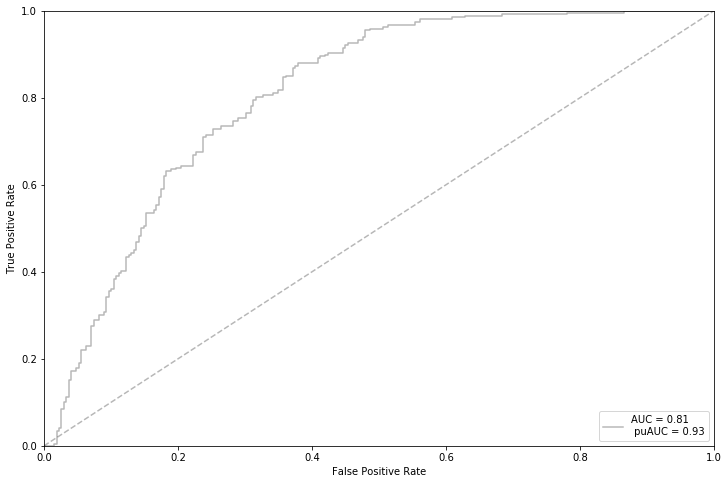

[0.02914755 0.20253289 0.31357367 0.0265769  0.09076946 0.04383965
 0.04799596 0.06175113 0.02187848 0.02036028 0.03289002 0.05037732
 0.05830668]


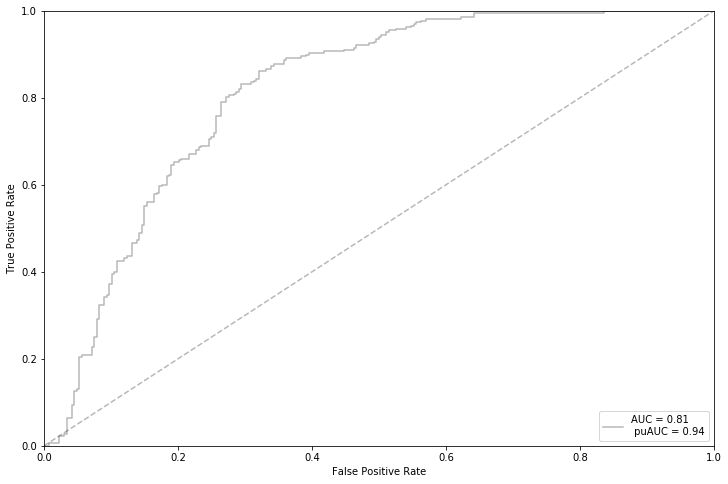

[0.02068698 0.21928725 0.3455918  0.04128879 0.07555715 0.03610822
 0.05311113 0.03398746 0.03640231 0.01901864 0.02196692 0.05389496
 0.04309839]


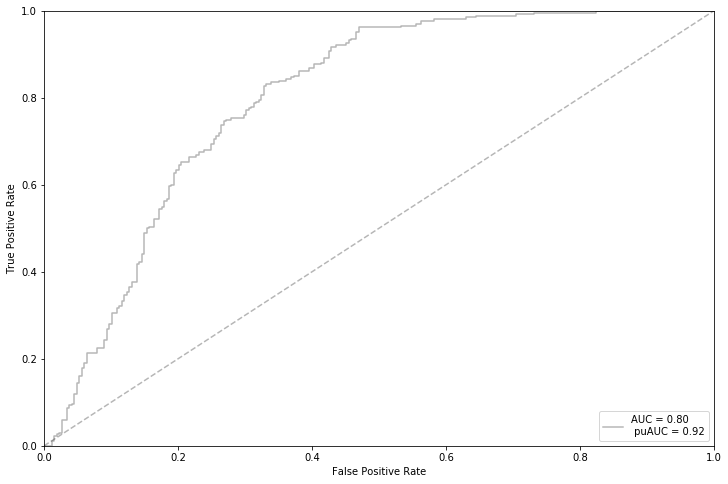

[0.04557874 0.22731994 0.33319876 0.03562897 0.06601872 0.04415128
 0.02646149 0.0485372  0.02576672 0.02237356 0.02030095 0.03927635
 0.06538732]


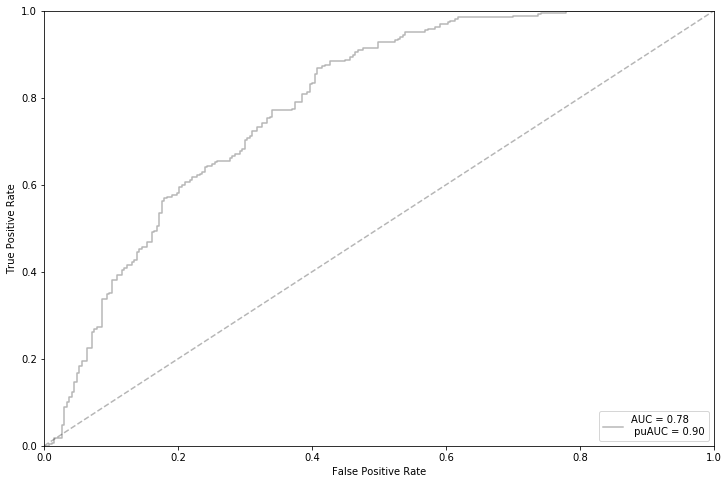

[0.02927486 0.25212568 0.33268663 0.03413118 0.05568183 0.03521303
 0.05471282 0.03552318 0.0319122  0.01767443 0.0171523  0.06905791
 0.03485395]


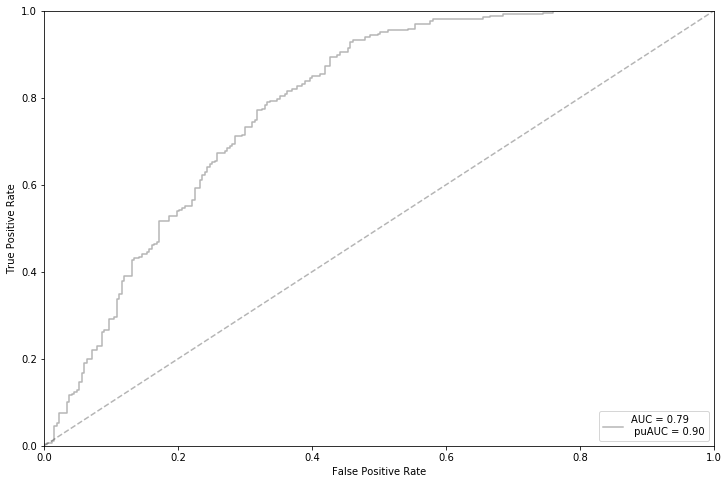

[0.04232728 0.22138826 0.32489263 0.05911216 0.08420112 0.04601821
 0.02980906 0.04288707 0.02687019 0.01859658 0.01664213 0.04715032
 0.040105  ]


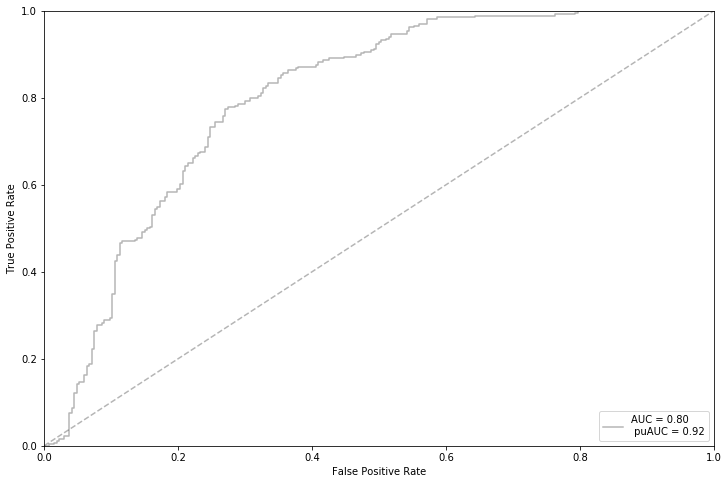

[0.01261025 0.18938425 0.35294906 0.03833084 0.1098739  0.04556765
 0.04468069 0.02738922 0.02643313 0.01831474 0.0232934  0.08035818
 0.03081471]


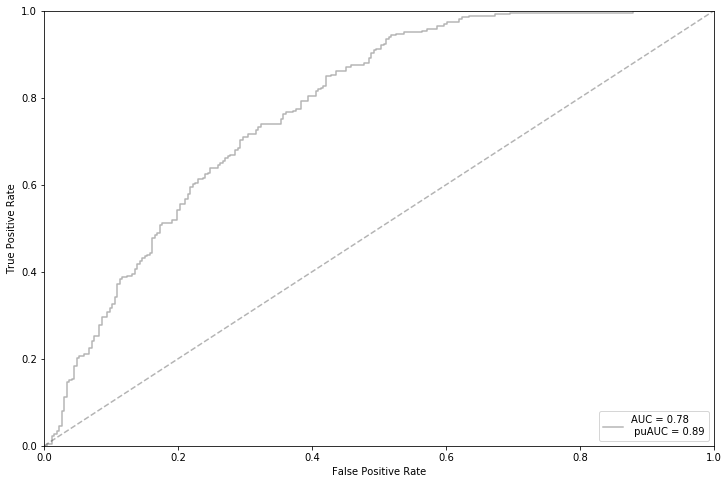

[0.02855193 0.19477155 0.35410578 0.04417124 0.07471935 0.03002047
 0.02576258 0.03718616 0.02976637 0.02402656 0.02320221 0.08231569
 0.05140012]


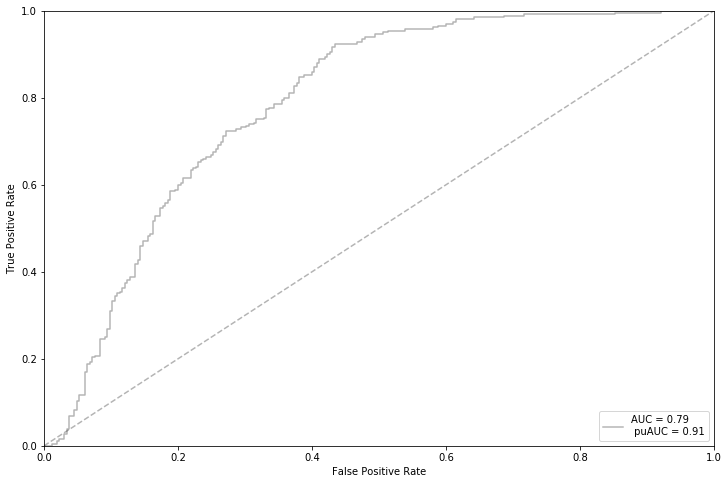

[0.03491661 0.18949688 0.31067286 0.0478184  0.06615574 0.04112074
 0.03478562 0.05143339 0.03592041 0.02120668 0.01877569 0.07292577
 0.07477121]


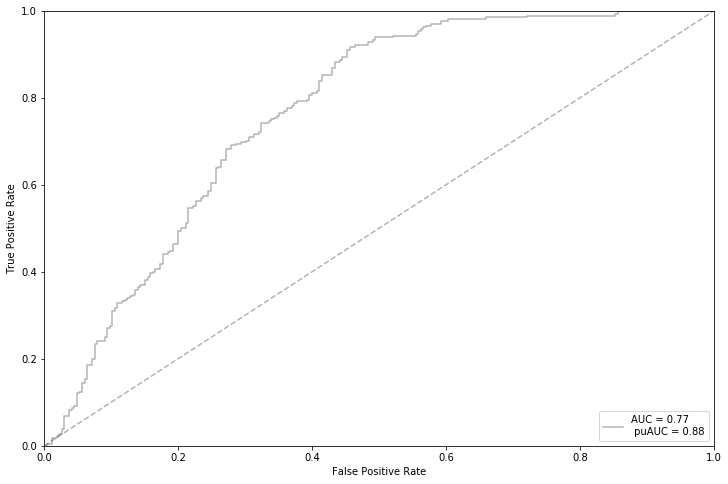

[0.0205922  0.23928481 0.26310437 0.05491019 0.09885886 0.05450499
 0.03775442 0.03685534 0.02664338 0.03210347 0.01929905 0.07081959
 0.04526933]


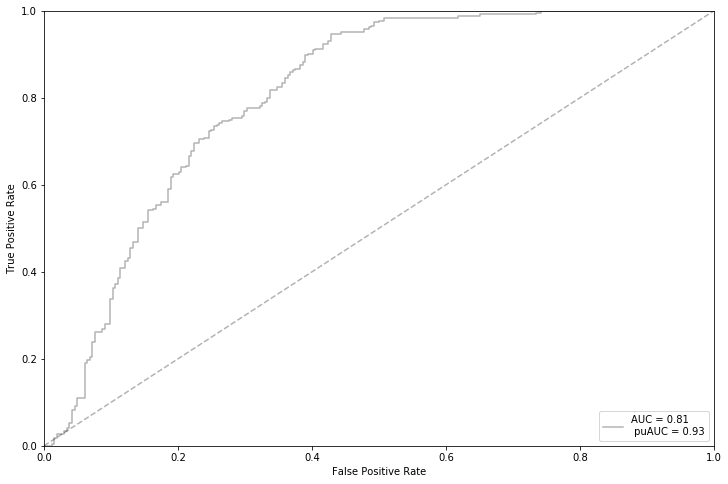

[0.02361265 0.22009037 0.30911928 0.0328834  0.09200316 0.06024272
 0.0425993  0.04631607 0.02832531 0.0261795  0.03388702 0.04794475
 0.03679646]


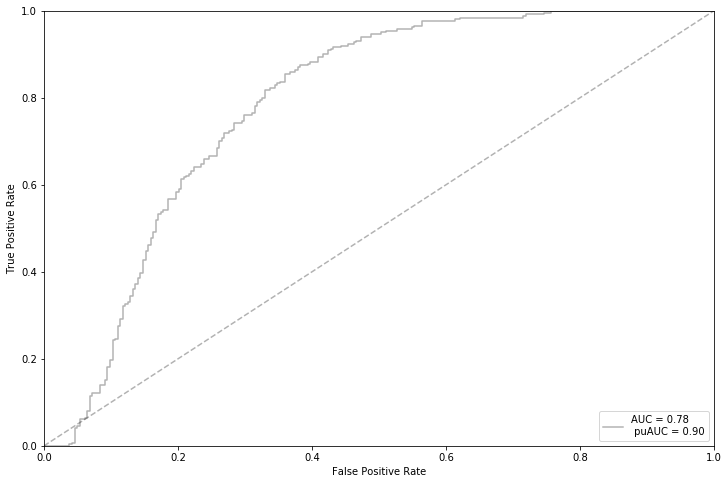

[0.02667957 0.21019097 0.31314865 0.07714898 0.05662565 0.03737662
 0.04753991 0.03904562 0.03002474 0.02629969 0.02083694 0.0745336
 0.04054906]


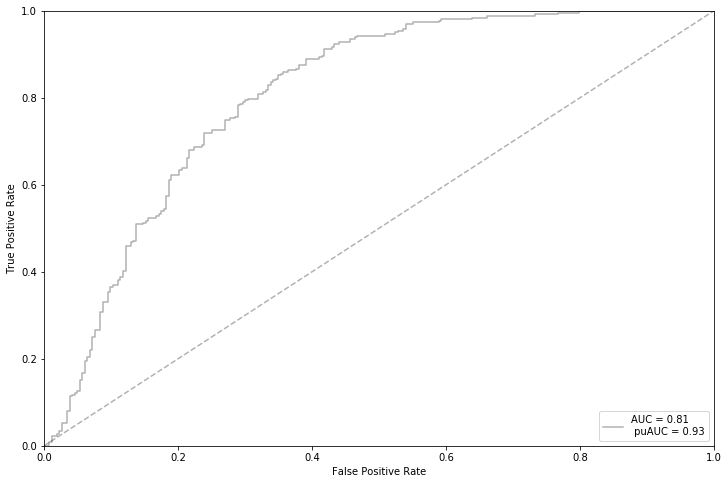

[0.02390112 0.22188066 0.34220868 0.0418924  0.08286225 0.03092425
 0.04636367 0.05575589 0.021834   0.02598933 0.01742741 0.05307641
 0.03588391]


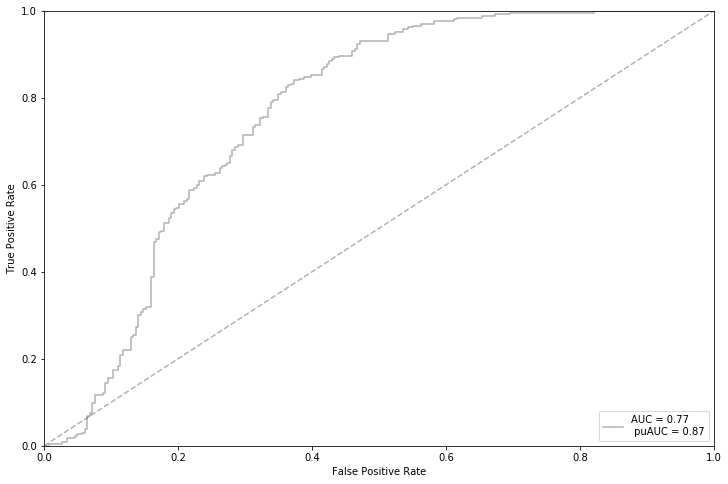

[0.03157455 0.18770181 0.29128504 0.08799606 0.1119489  0.03280861
 0.02898557 0.05406612 0.03613306 0.02206204 0.02101836 0.04940371
 0.04501617]


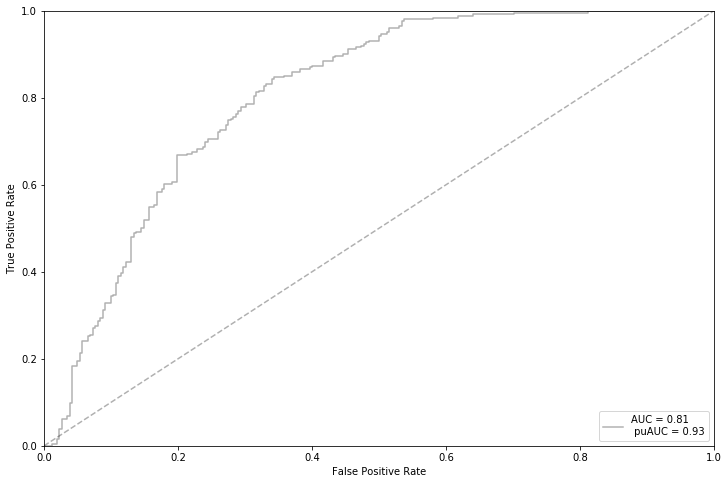

[0.04208974 0.20486378 0.31887656 0.05663205 0.1076884  0.0260095
 0.033989   0.03208452 0.02786979 0.01881494 0.03829327 0.05581852
 0.03696994]


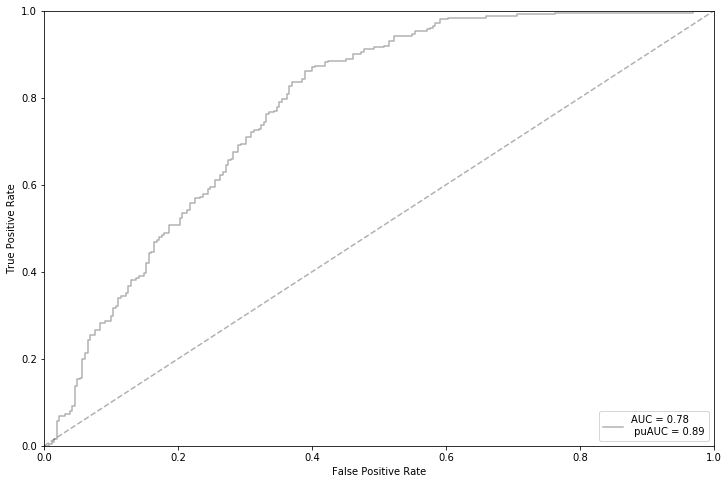

[0.02315648 0.2338024  0.36441887 0.07642849 0.07009002 0.03480461
 0.02658693 0.0329649  0.02508324 0.01786276 0.01573734 0.05266423
 0.02639973]


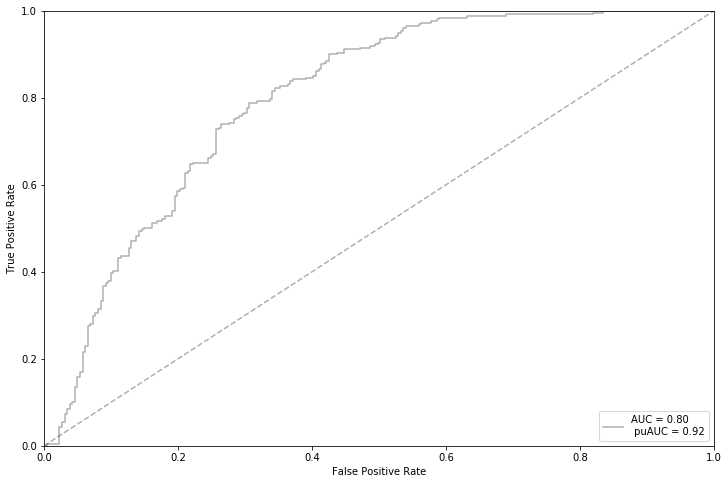

[0.02394134 0.19723547 0.32819955 0.02464671 0.0778742  0.0701814
 0.03397282 0.04426712 0.02705552 0.02976953 0.02488247 0.04801785
 0.06995602]


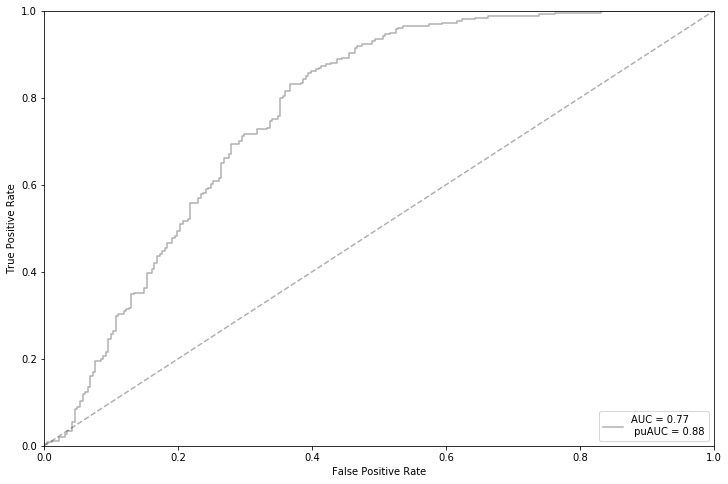

[0.02401444 0.20282329 0.34987221 0.04203114 0.09022104 0.04818452
 0.02695481 0.03812381 0.02665277 0.03002023 0.02205229 0.06268593
 0.03636352]


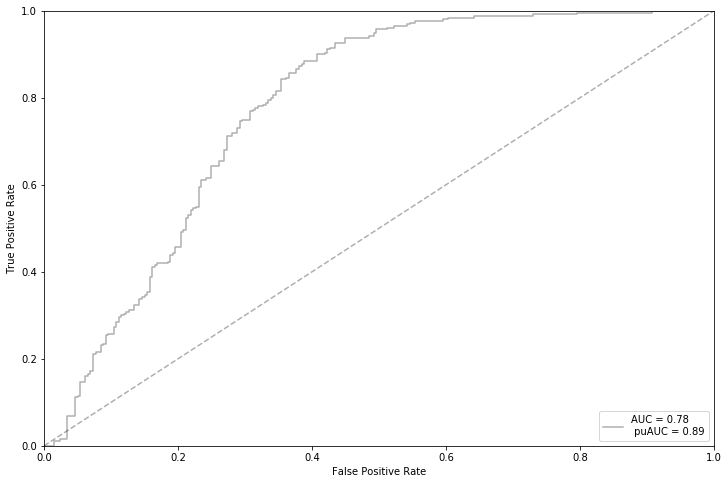

[0.02562107 0.19517311 0.28937664 0.05737402 0.1164938  0.04761111
 0.03417781 0.03783802 0.03142545 0.03175301 0.01749504 0.05687008
 0.05879082]


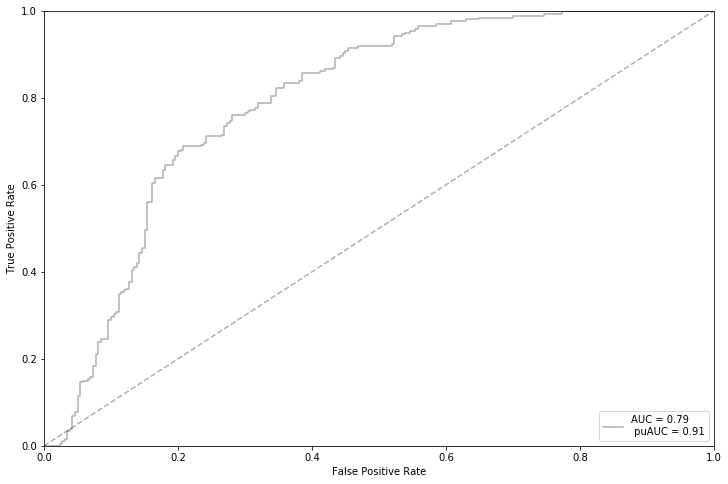

[0.02643092 0.23299817 0.3102371  0.02897727 0.05840919 0.06479934
 0.04410878 0.04765059 0.02879921 0.02262597 0.02089097 0.04034273
 0.07372976]


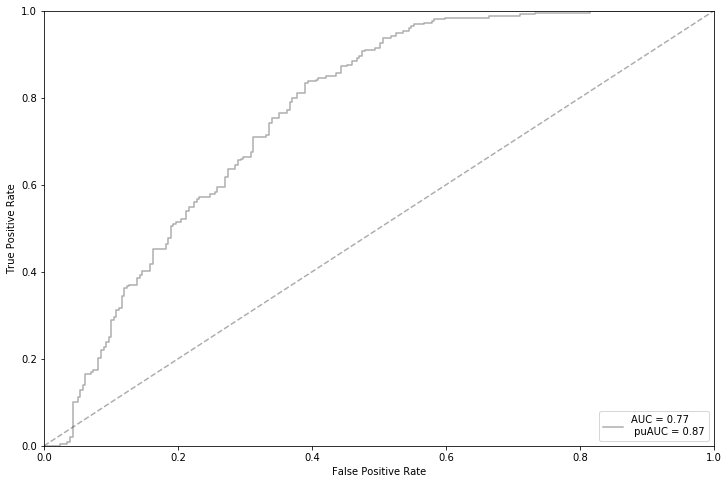

[0.02453386 0.20058782 0.32357212 0.02318759 0.12024296 0.04839448
 0.03745277 0.04382353 0.02435454 0.02249883 0.02255336 0.05022529
 0.05857283]


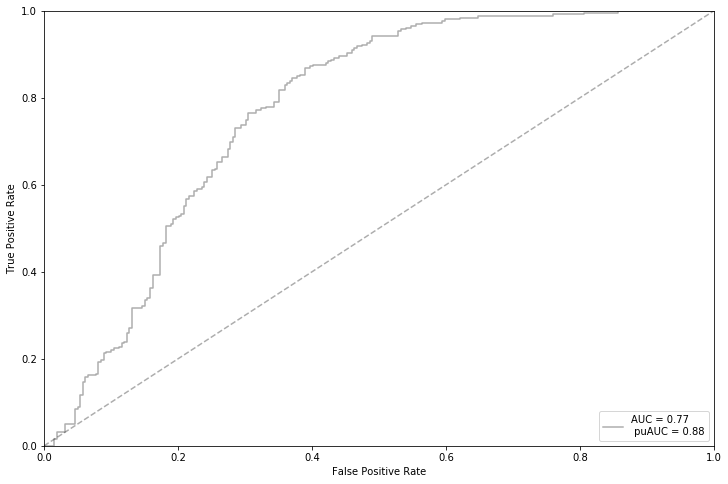

[0.01836888 0.2584263  0.30323993 0.06152366 0.06064485 0.05053294
 0.02917059 0.03625032 0.02762152 0.02655435 0.02234827 0.04396107
 0.06135733]


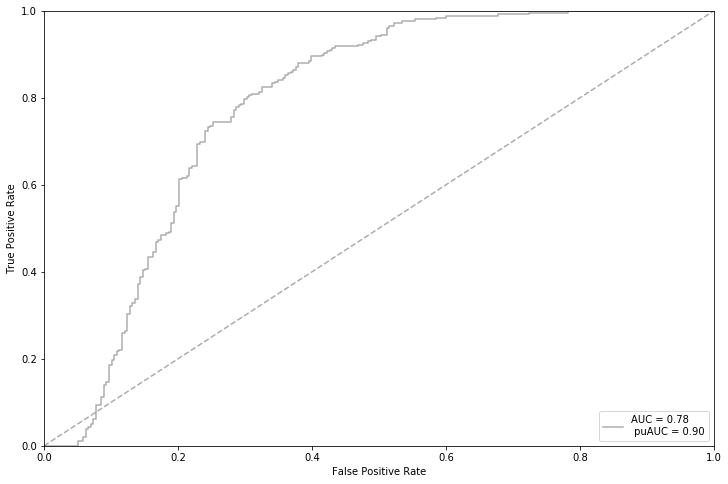

[0.03333052 0.24086425 0.24094859 0.0319575  0.0691615  0.04927395
 0.05381239 0.05094014 0.02470483 0.02813869 0.02461938 0.10382049
 0.04842776]


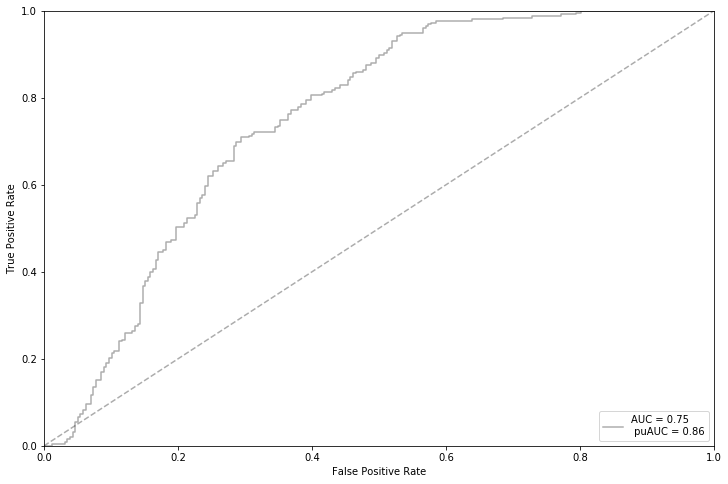

[0.04162768 0.19486092 0.30150657 0.07952325 0.09047579 0.04674718
 0.02775115 0.06268942 0.02743786 0.02535292 0.02096489 0.05805681
 0.02300557]


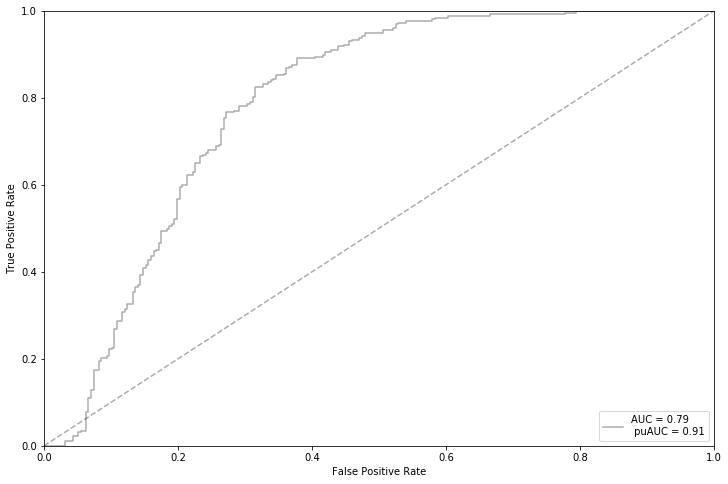

[0.03592227 0.2057027  0.34051343 0.0874431  0.06529515 0.0268912
 0.0346224  0.04846629 0.0241875  0.02020849 0.03287872 0.0375701
 0.04029865]


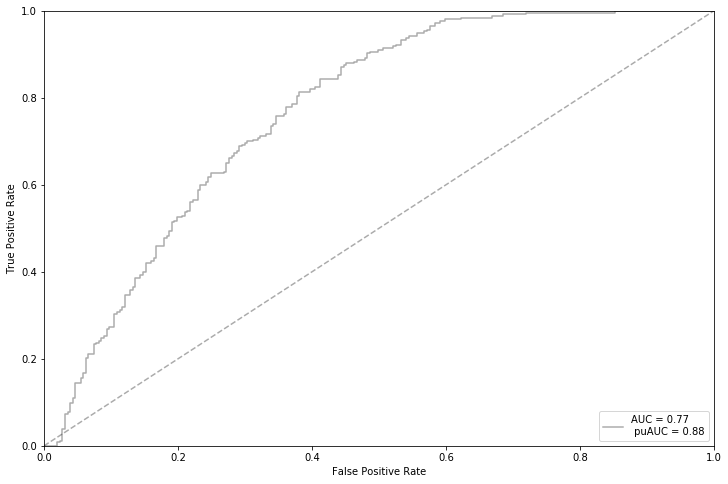

[0.03168067 0.24279616 0.31415284 0.0366667  0.07155527 0.04512084
 0.02799669 0.07710217 0.01838256 0.0233063  0.0218249  0.04808121
 0.04133369]


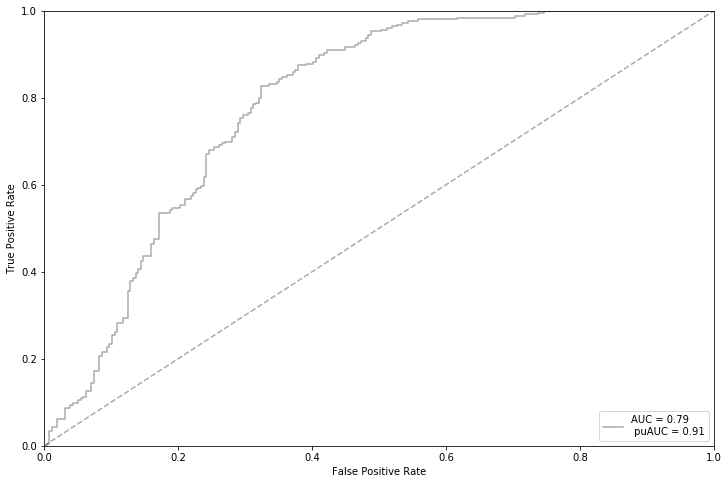

[0.03066268 0.25002925 0.30529322 0.04656641 0.07837829 0.0458487
 0.0309473  0.05464339 0.02775251 0.01669232 0.02169285 0.05142595
 0.04006713]


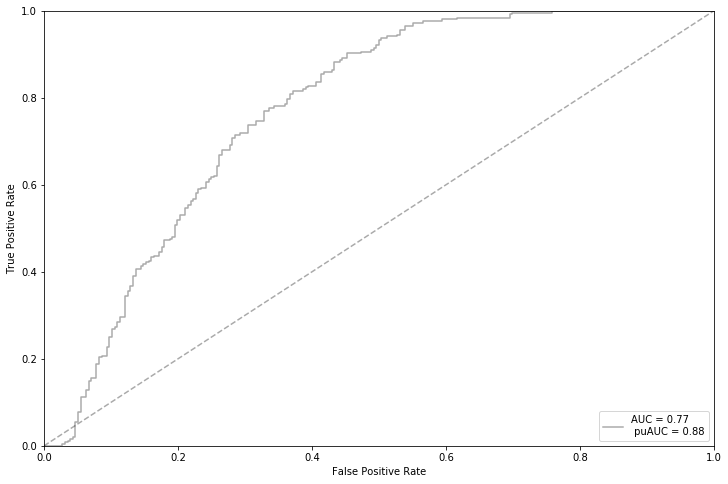

[0.0251672  0.26348562 0.29515915 0.05525109 0.10064651 0.04507486
 0.02912146 0.0395663  0.02559497 0.02122814 0.02271292 0.03737305
 0.03961874]


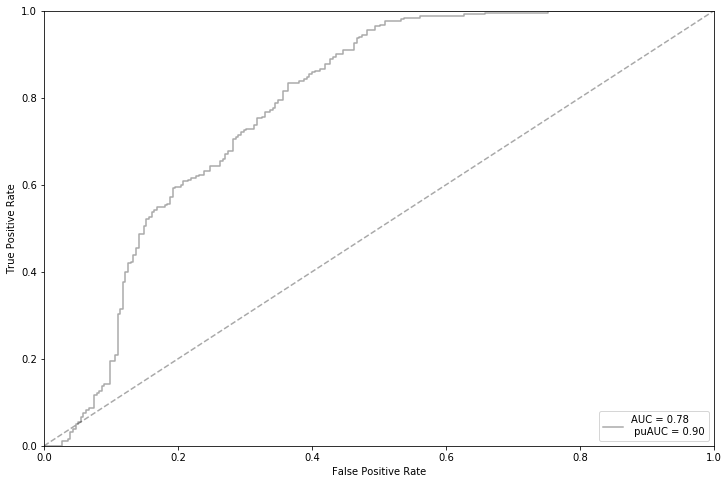

[0.01827369 0.20949962 0.28287953 0.06957764 0.11264782 0.05389998
 0.04177432 0.04370425 0.02156391 0.03377362 0.02667856 0.04565322
 0.04007385]


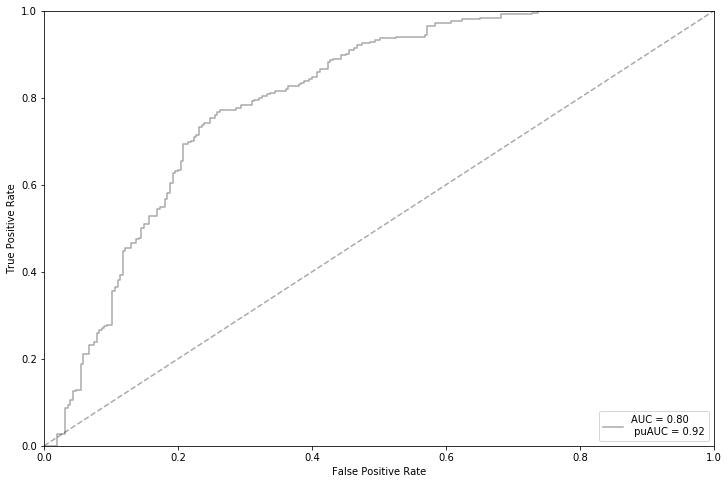

[0.03125128 0.25064322 0.30005332 0.0756959  0.04834299 0.04758911
 0.04553283 0.03282365 0.03294337 0.02444256 0.01578536 0.07290171
 0.02199471]


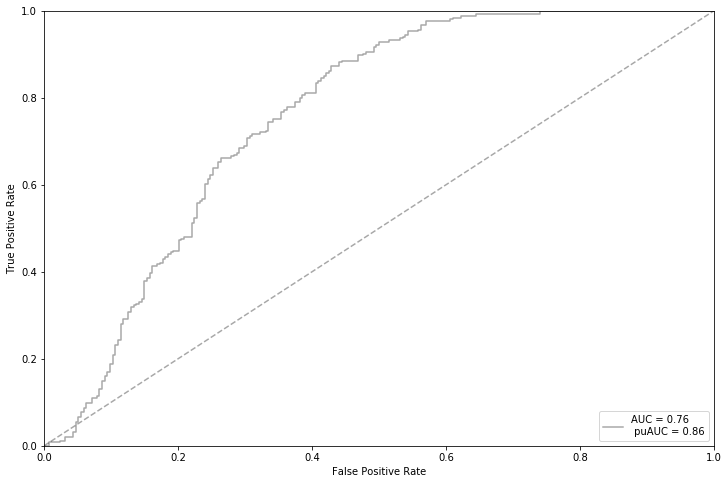

[0.03300013 0.23733773 0.28465872 0.04709675 0.06007156 0.04163934
 0.07308209 0.03539345 0.03339843 0.0321157  0.02999119 0.04418177
 0.04803312]


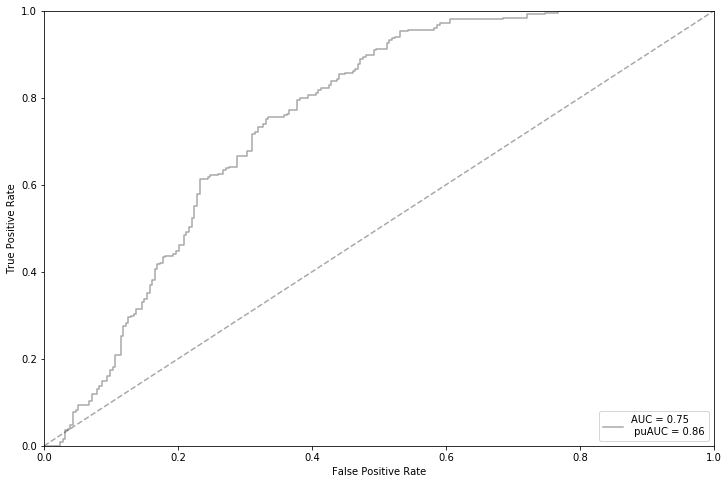

[0.03198316 0.21675272 0.31578573 0.06555319 0.07539696 0.05676916
 0.03699685 0.03750788 0.0268021  0.02306184 0.02767249 0.02603062
 0.0596873 ]


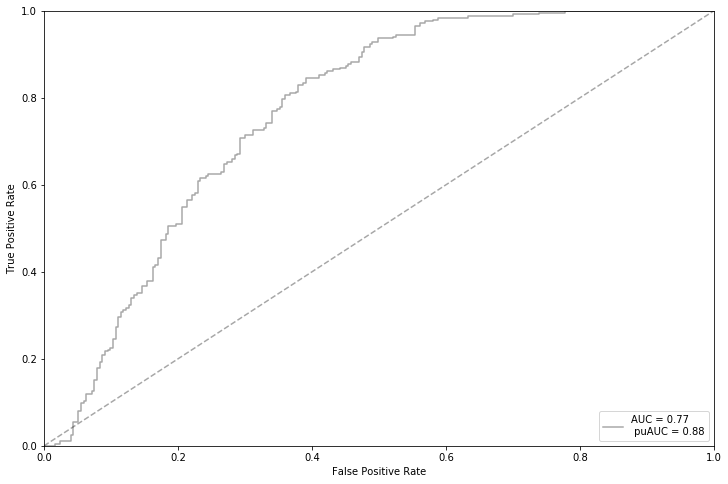

[0.04649425 0.21364796 0.24600727 0.0485677  0.06858148 0.06166115
 0.04373452 0.0883689  0.02634726 0.02639685 0.01610078 0.06615502
 0.04793685]


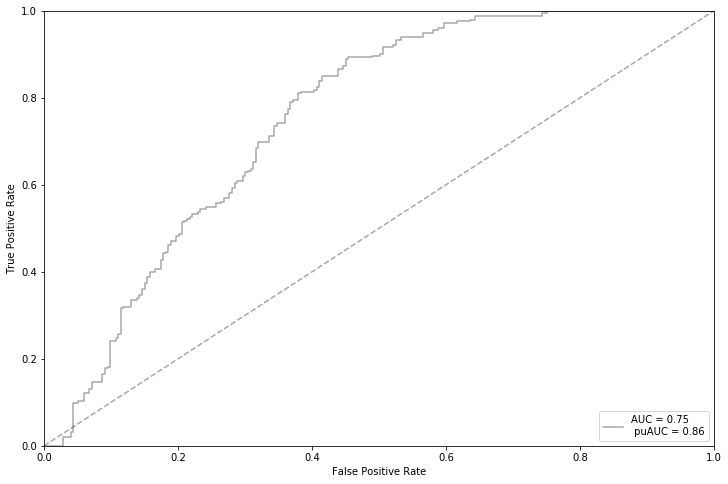

[0.02869408 0.20511856 0.31546699 0.07327741 0.09928415 0.04387197
 0.03395189 0.03250079 0.02803345 0.02945781 0.02021045 0.04740139
 0.04273106]


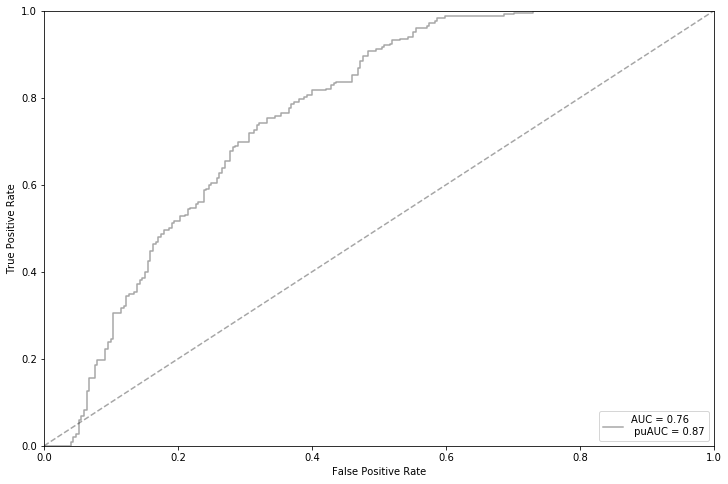

[0.02523513 0.24950069 0.30295232 0.04044884 0.04838742 0.05355931
 0.0434323  0.07049974 0.02380782 0.03246066 0.01733047 0.05872263
 0.03366266]


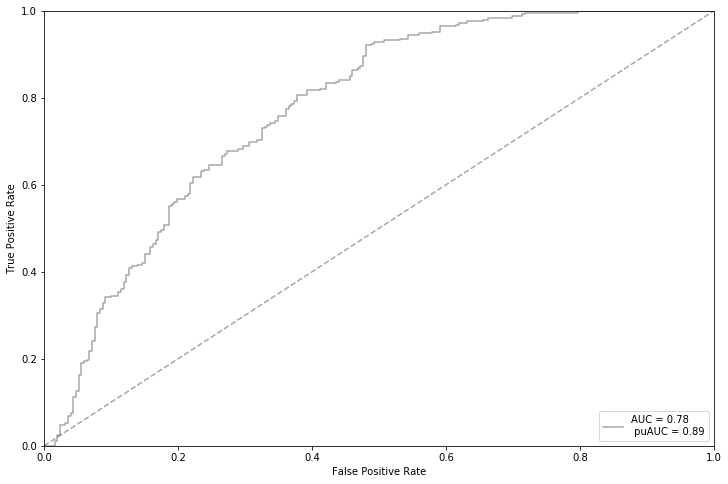

[0.01669589 0.2334285  0.26720645 0.09265715 0.11758959 0.0391602
 0.03080172 0.04499446 0.03042147 0.01649351 0.01911096 0.02963409
 0.06180601]


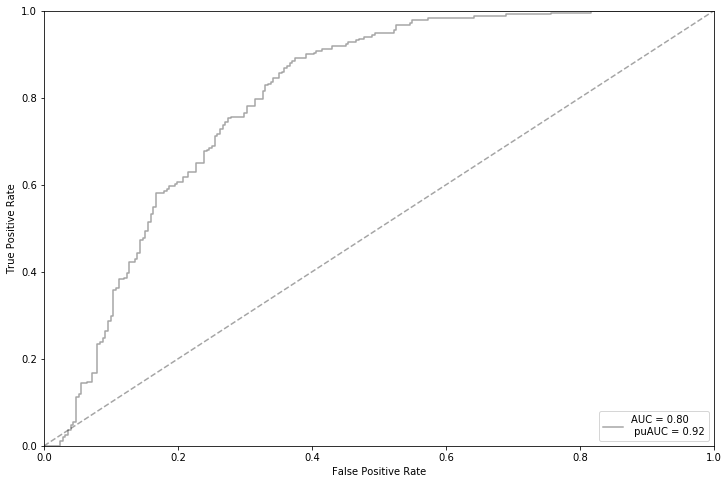

[0.01872867 0.22374199 0.32355514 0.03597856 0.07337636 0.03221375
 0.04773628 0.05239619 0.03925389 0.02645301 0.01791008 0.05564187
 0.05301422]


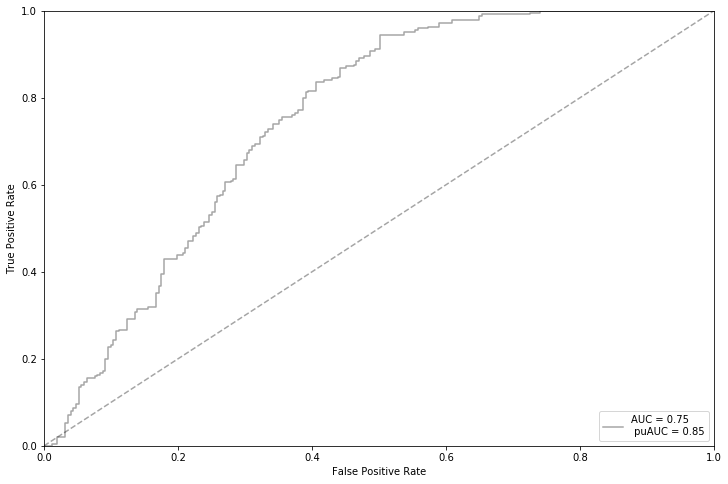

[0.02503339 0.26695686 0.309566   0.02036018 0.08374057 0.04629935
 0.05046533 0.04191182 0.0249706  0.02246023 0.01996731 0.05801478
 0.03025358]


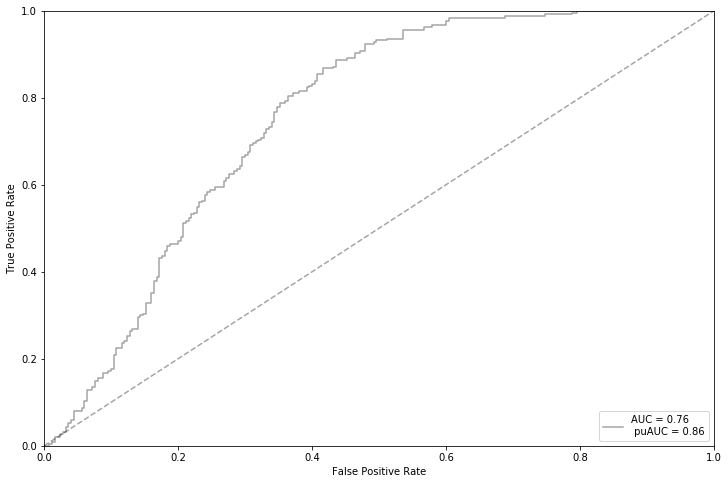

[0.01709841 0.24196754 0.31884527 0.04734688 0.05979915 0.04812658
 0.03087293 0.03345989 0.02753906 0.03019611 0.02519253 0.08869991
 0.03085573]


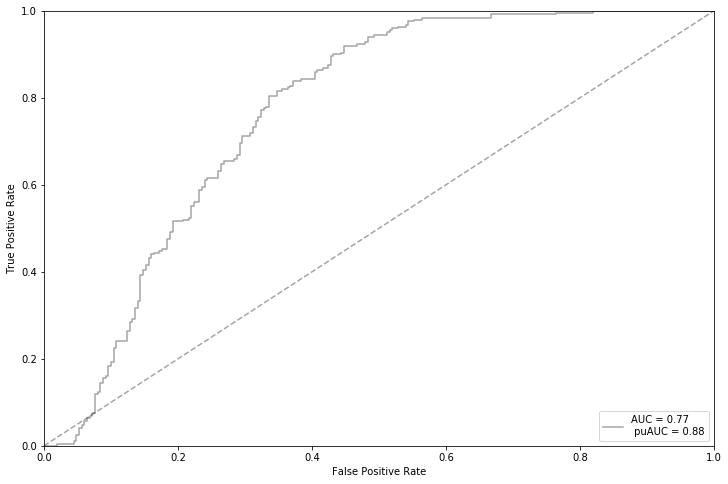

[0.03476973 0.2363408  0.34094931 0.04748255 0.0832567  0.05283632
 0.02449636 0.03671724 0.02588656 0.01559129 0.01527837 0.04512472
 0.04127005]


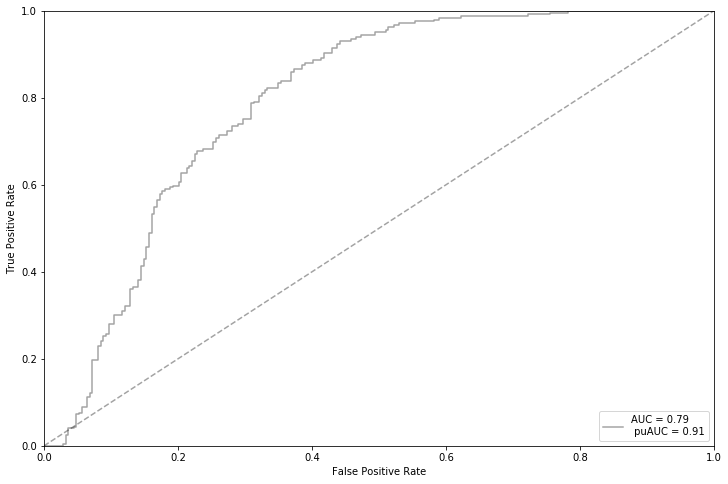

[0.02757468 0.25491165 0.26818139 0.06543086 0.06220365 0.05277539
 0.02971427 0.04527015 0.02412619 0.02330253 0.01912561 0.05919859
 0.06818506]


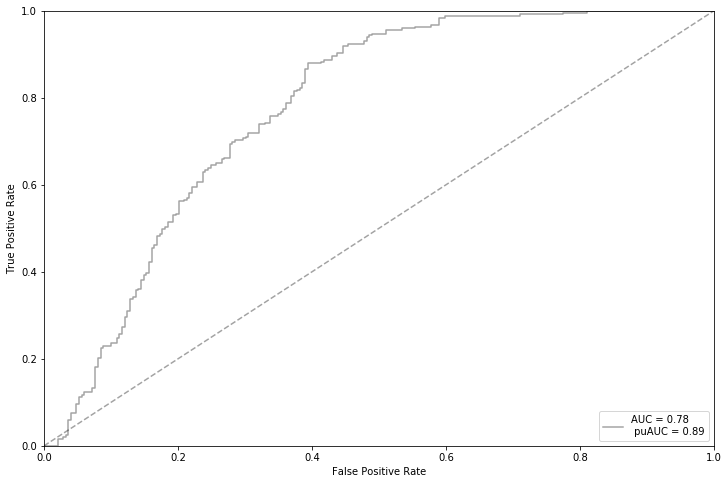

[0.02856262 0.23202139 0.28869678 0.04861811 0.04933513 0.04960519
 0.04436161 0.04778634 0.02559504 0.0225918  0.0324867  0.06008258
 0.0702567 ]


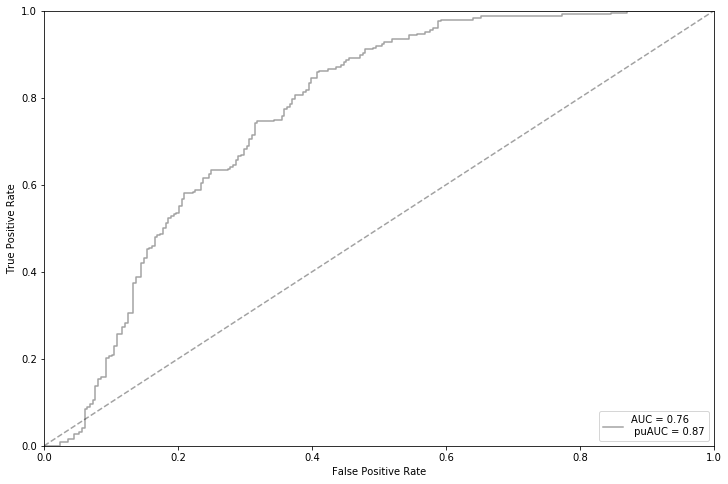

[0.02548063 0.23612915 0.26826584 0.09428528 0.05635957 0.05605185
 0.04469765 0.04415105 0.02656214 0.02040904 0.03066404 0.05927758
 0.03766618]


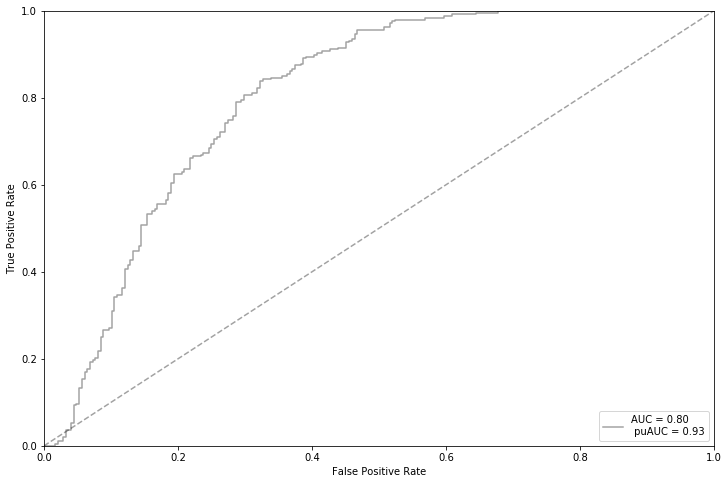

[0.02775888 0.19641281 0.35554439 0.07764957 0.05205413 0.05450062
 0.03519005 0.03993165 0.02851095 0.02618113 0.02018588 0.0507066
 0.03537335]


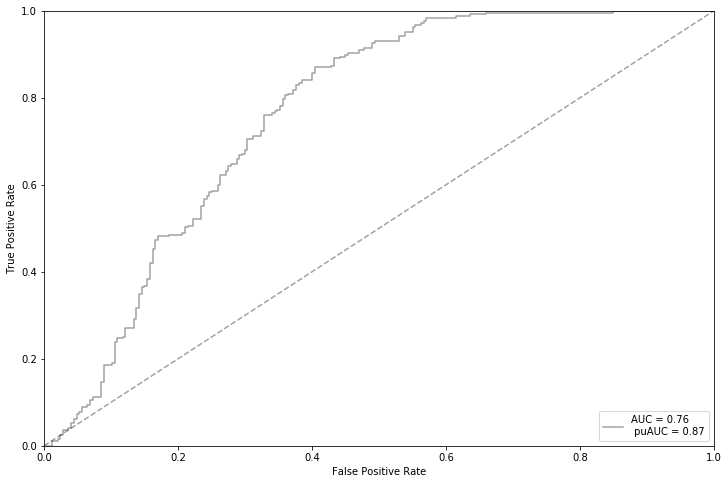

[0.02013284 0.18688199 0.34070439 0.09010047 0.06677039 0.04871703
 0.03796699 0.03302285 0.03238352 0.01848631 0.02544195 0.06037123
 0.03902003]


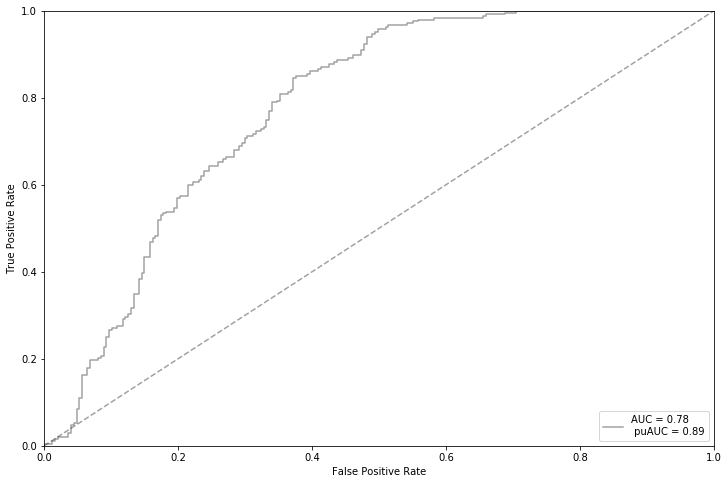

[0.02050108 0.22152677 0.33172331 0.055572   0.07233684 0.05497341
 0.0297342  0.05820226 0.03356275 0.02182154 0.01542202 0.03497501
 0.04964881]


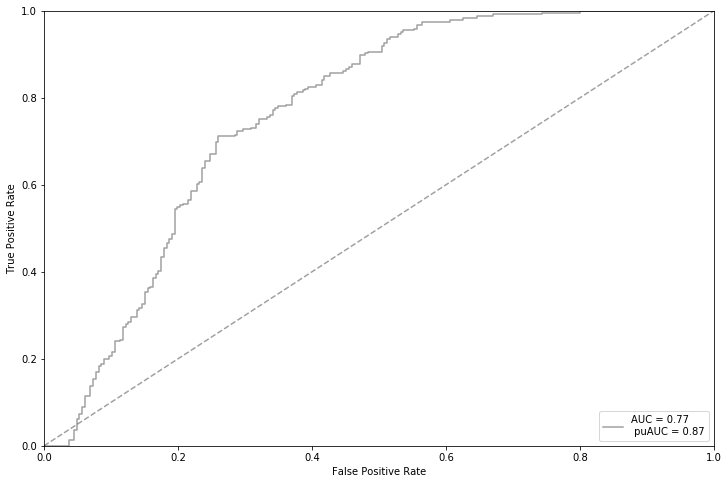

[0.03232356 0.24843269 0.28286258 0.03686385 0.08261654 0.04030744
 0.03960788 0.05167546 0.0271743  0.02221497 0.01681452 0.06809672
 0.0510095 ]


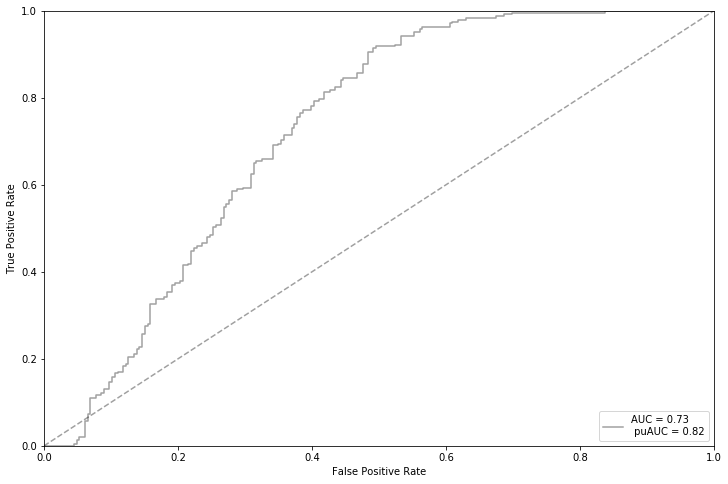

[0.02774962 0.20144272 0.31246048 0.07225773 0.04032393 0.06291447
 0.03096126 0.08711589 0.02588799 0.02101988 0.02490294 0.05178553
 0.04117758]


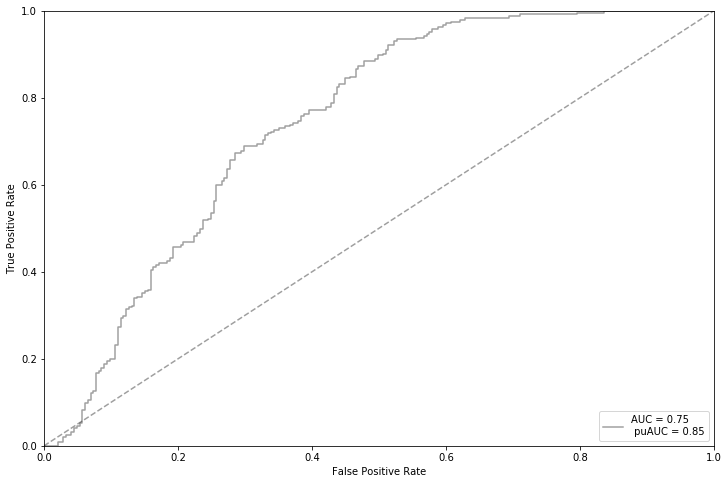

[0.04221745 0.20547148 0.2938389  0.07297817 0.09531619 0.04991705
 0.0272421  0.05846789 0.03560114 0.02142685 0.02046292 0.0397329
 0.03732694]


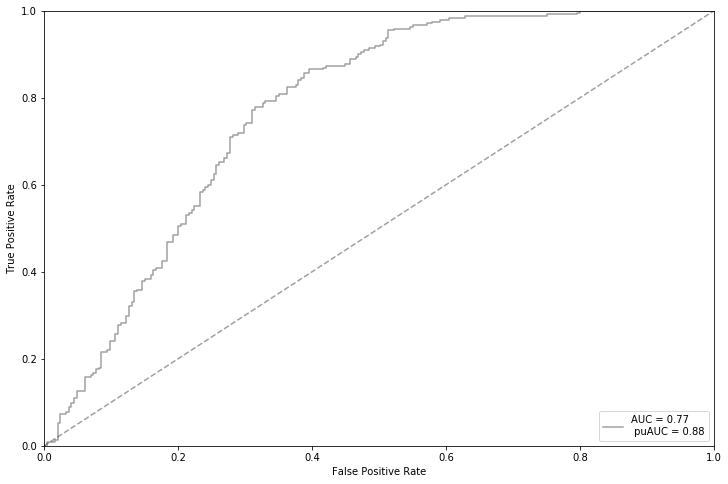

[0.02029842 0.24943396 0.35547562 0.04993782 0.06305706 0.03411433
 0.03661763 0.03268789 0.02168056 0.02095649 0.02310411 0.04607732
 0.0465588 ]


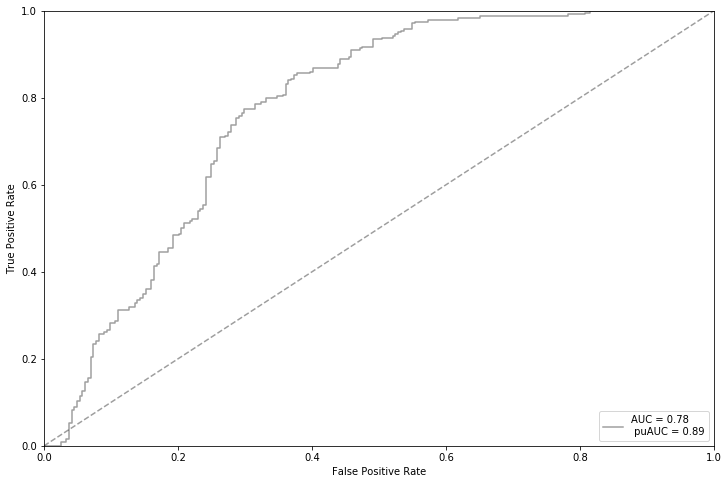

[0.03709837 0.27872193 0.31664217 0.04604372 0.04683857 0.03565229
 0.03130071 0.03756661 0.02727946 0.02919268 0.02476979 0.05221296
 0.03668074]


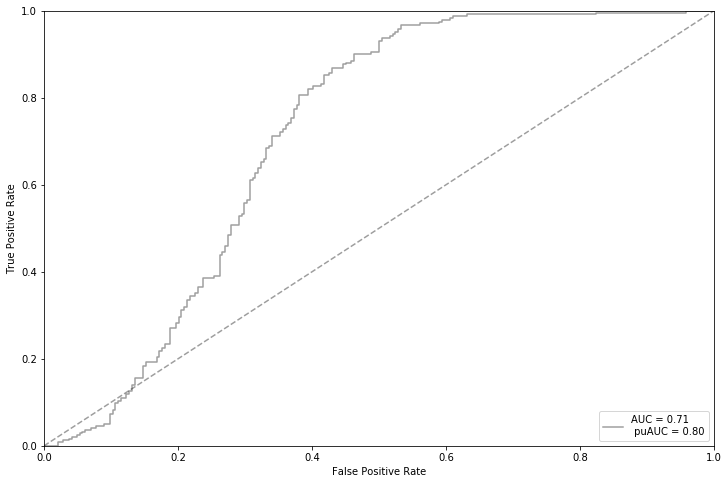

[0.02959378 0.20709318 0.30975689 0.07174183 0.04681894 0.06264463
 0.03086667 0.07344652 0.02940272 0.02620005 0.01717812 0.03724289
 0.05801378]


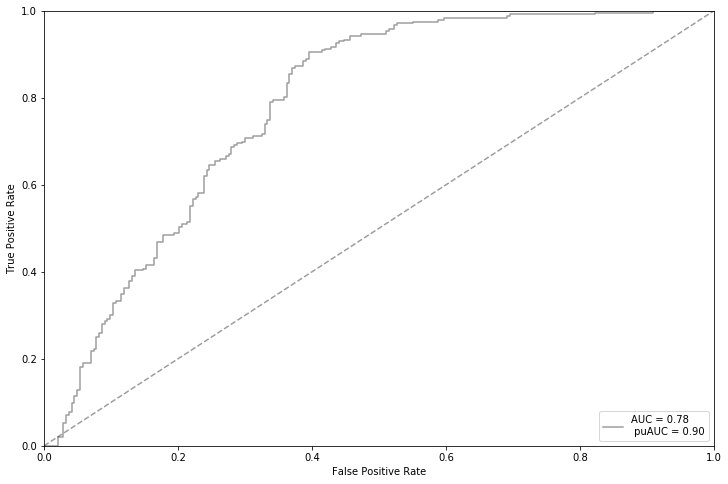

[0.02505302 0.21861422 0.35356511 0.04376865 0.08166417 0.04243546
 0.02703744 0.04586268 0.02619777 0.01978357 0.01926708 0.05450185
 0.04224897]


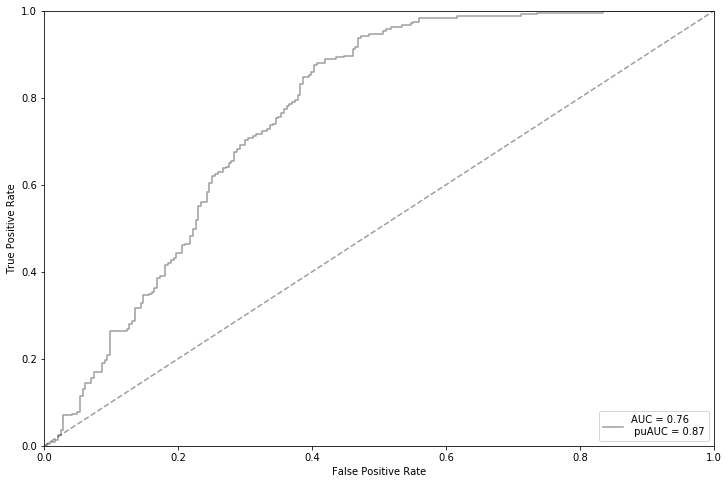

[0.02855233 0.23964364 0.31226271 0.05168807 0.06211857 0.04273957
 0.03595881 0.05046584 0.03644372 0.01912138 0.01921488 0.04832207
 0.0534684 ]


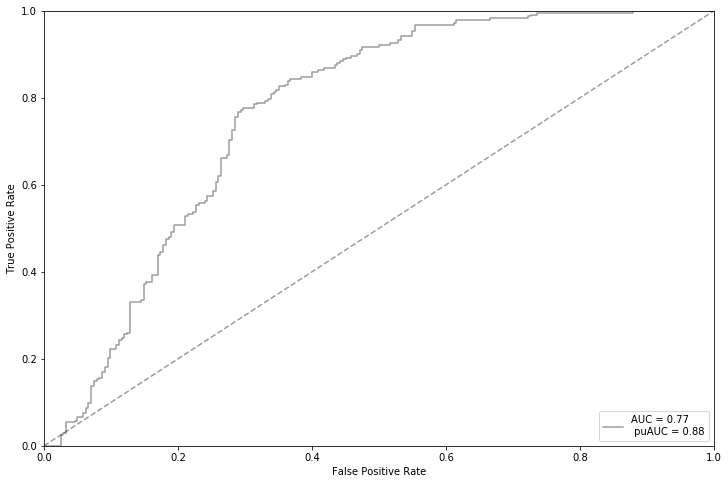

[0.02029106 0.2567985  0.33326705 0.05438745 0.05612433 0.0556748
 0.02349804 0.03902272 0.02219322 0.01776561 0.02661174 0.050685
 0.0436805 ]


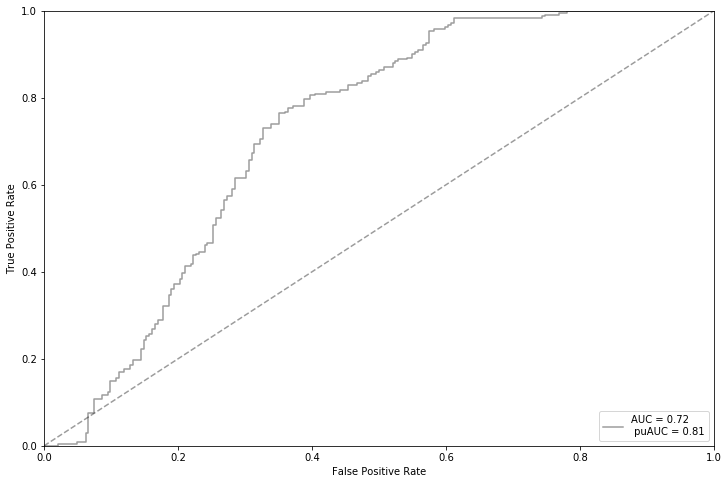

[0.04076913 0.20081292 0.28728215 0.09720169 0.0793058  0.03375887
 0.05991943 0.03482417 0.03446329 0.01832488 0.02290794 0.05374237
 0.03668736]


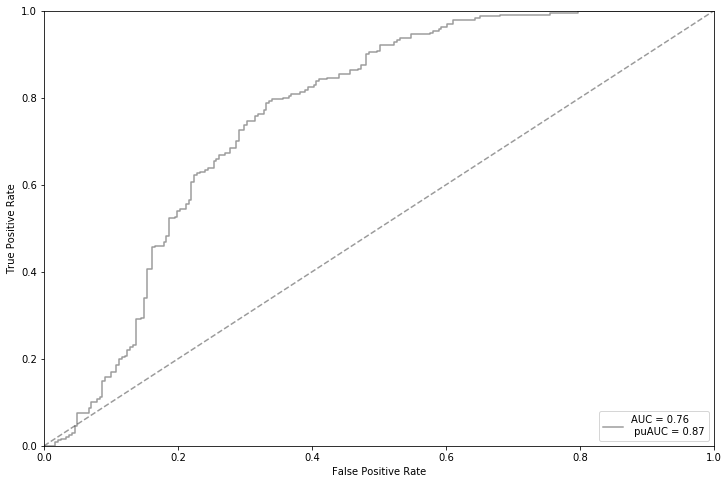

[0.02654074 0.22451408 0.296334   0.07867453 0.06416757 0.04252967
 0.03364431 0.05915789 0.0329287  0.0225283  0.01661235 0.06083631
 0.04153156]


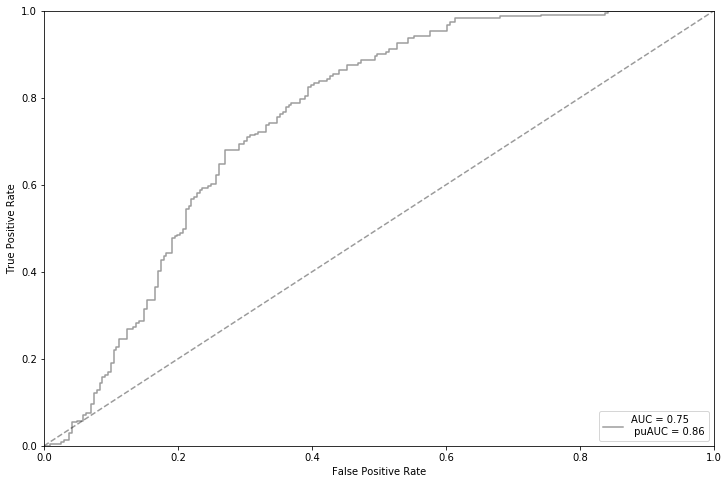

[0.03440834 0.2090134  0.31911679 0.08841578 0.06946744 0.03423212
 0.03022817 0.05021747 0.03243589 0.03008409 0.02406574 0.05005564
 0.02825912]


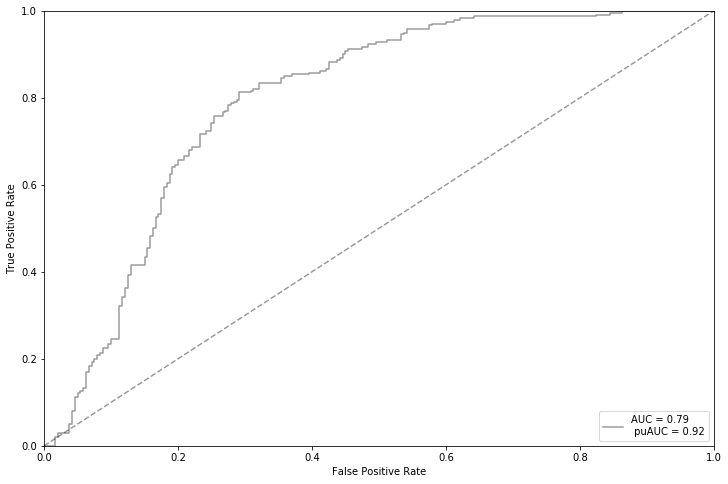

[0.02410626 0.20591386 0.34035111 0.04921749 0.07456178 0.04353222
 0.0407584  0.05306979 0.02610847 0.02351135 0.03608952 0.04478389
 0.03799586]


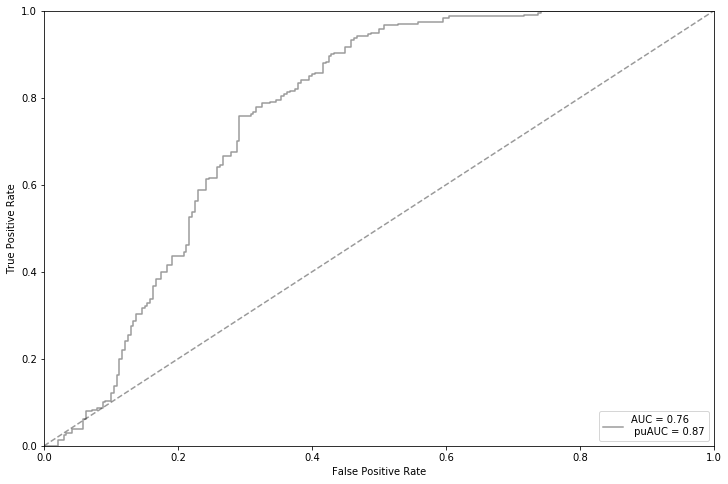

[0.02564827 0.20623562 0.33501587 0.06008755 0.06126814 0.04445123
 0.04234137 0.04392783 0.01916139 0.02194924 0.02492261 0.04955449
 0.0654364 ]


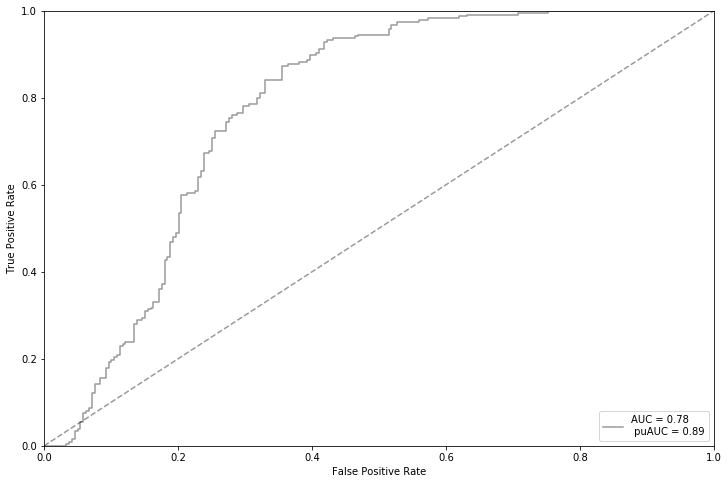

[0.03276875 0.22442531 0.23445675 0.05609798 0.0913864  0.06036434
 0.05594467 0.06348187 0.02786924 0.02421842 0.01852169 0.04597599
 0.06448859]


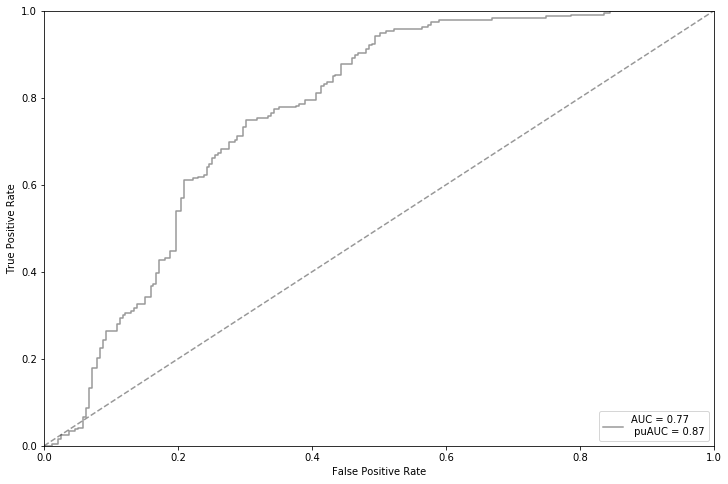

[0.01594624 0.20225084 0.27552979 0.08206588 0.11860682 0.03451895
 0.02822841 0.04040459 0.03745544 0.03308555 0.04419286 0.04355681
 0.04415782]


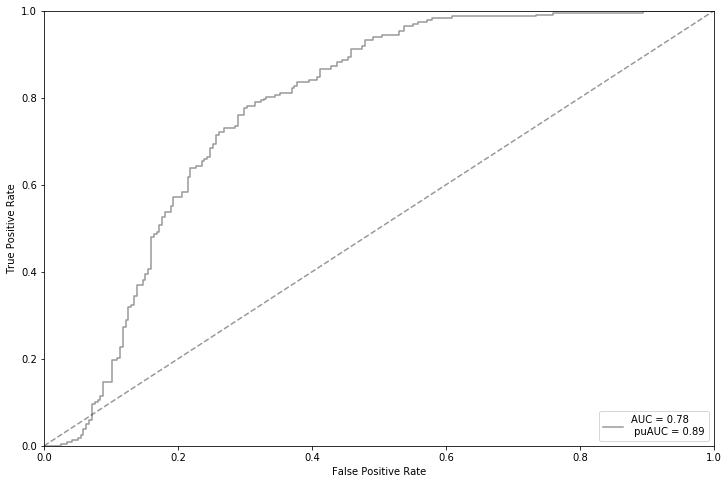

[0.03249026 0.23939028 0.33038372 0.06382396 0.07255313 0.03642801
 0.03752468 0.04236507 0.0249268  0.02348185 0.0182771  0.04734286
 0.03101229]


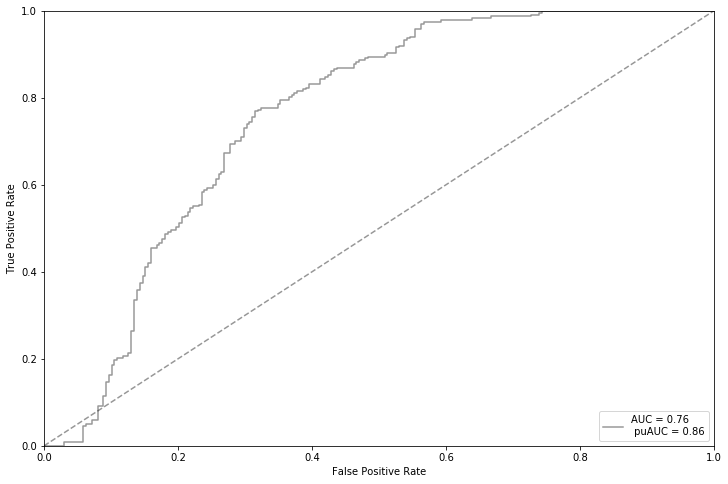

[0.02364383 0.22650373 0.31477991 0.07413117 0.06051629 0.04508435
 0.03921446 0.0504888  0.02265683 0.02540096 0.01771246 0.04939402
 0.05047318]


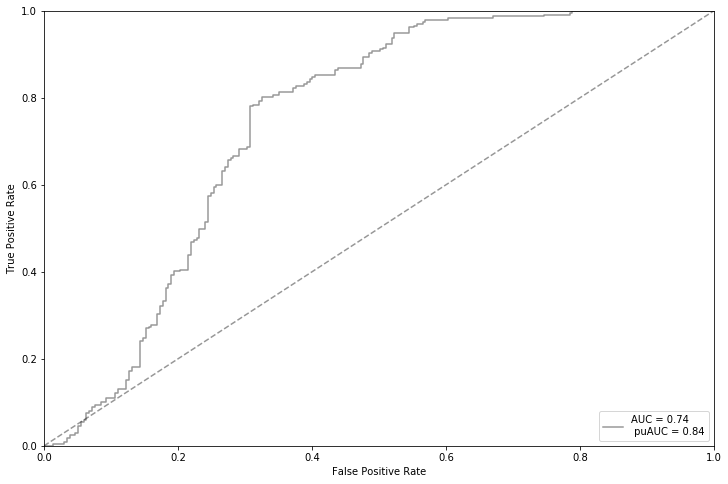

[0.02085378 0.20309413 0.34688871 0.05669163 0.10017032 0.02821897
 0.02949312 0.05796916 0.0358958  0.02026582 0.01651063 0.05033017
 0.03361777]


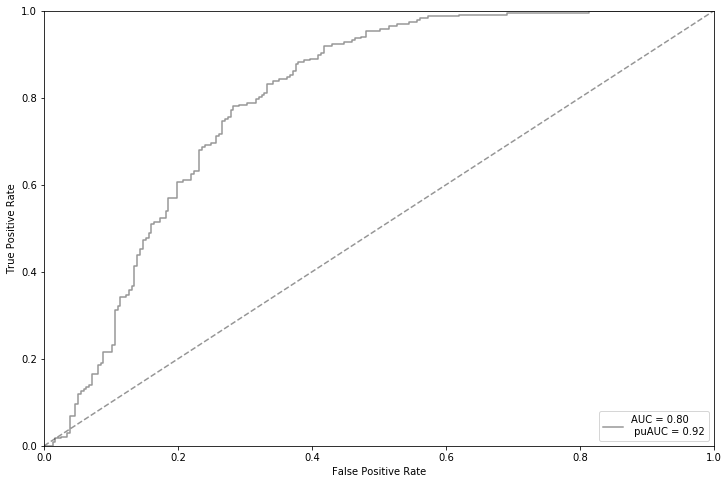

[0.02785821 0.25505432 0.35104201 0.03835753 0.05925769 0.03551964
 0.04168681 0.03984256 0.02372835 0.02629405 0.01816185 0.04770302
 0.03549396]


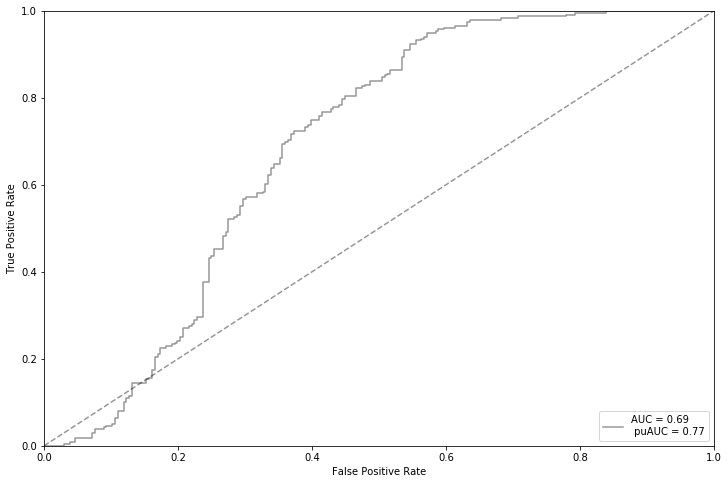

[0.03383348 0.22654766 0.34785587 0.05343865 0.04798578 0.06003566
 0.03522727 0.02952722 0.02518207 0.0242331  0.03520801 0.04398349
 0.03694175]


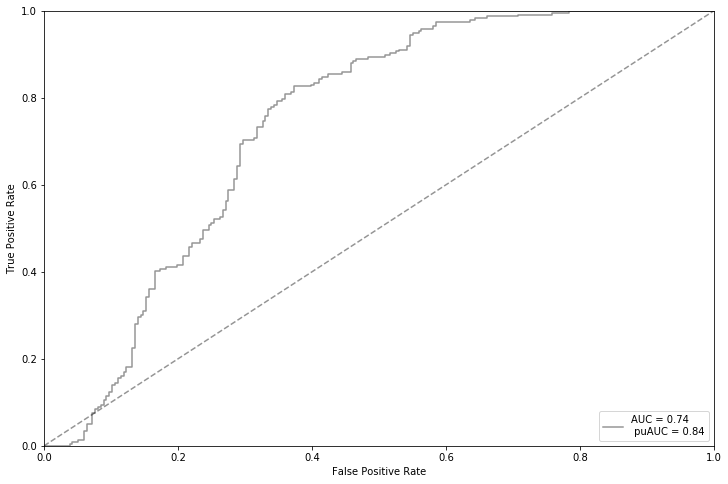

[0.02804663 0.22121994 0.33051484 0.05525132 0.08434243 0.049076
 0.02676393 0.069183   0.02356509 0.02616158 0.01826748 0.03540328
 0.03220448]


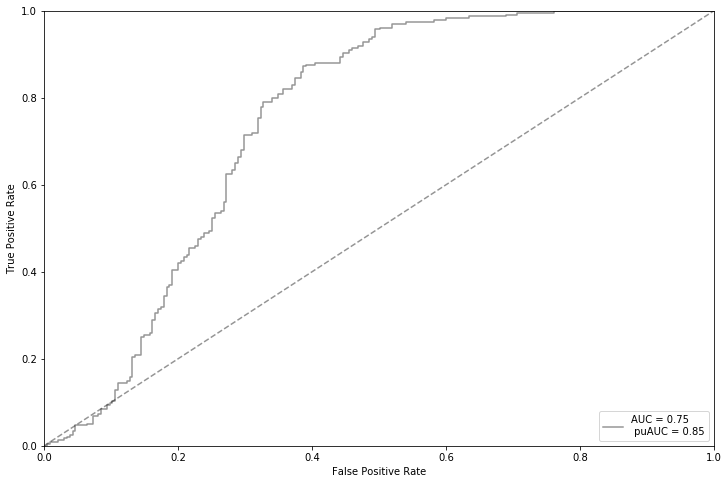

[0.03139207 0.24208536 0.30746802 0.07219415 0.06121711 0.03361248
 0.02903838 0.04941314 0.02609442 0.0312923  0.01972096 0.04147575
 0.05499585]


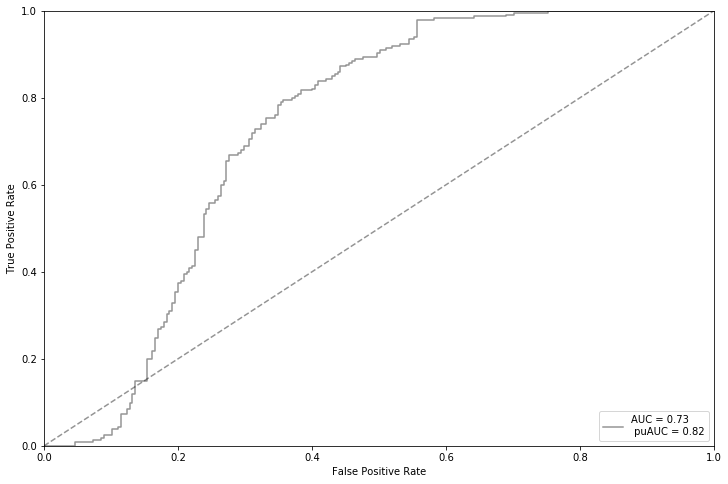

[0.03386333 0.21413882 0.33512375 0.04389342 0.06818182 0.03216877
 0.03393243 0.04835374 0.02455604 0.02403146 0.02941375 0.0772121
 0.03513055]


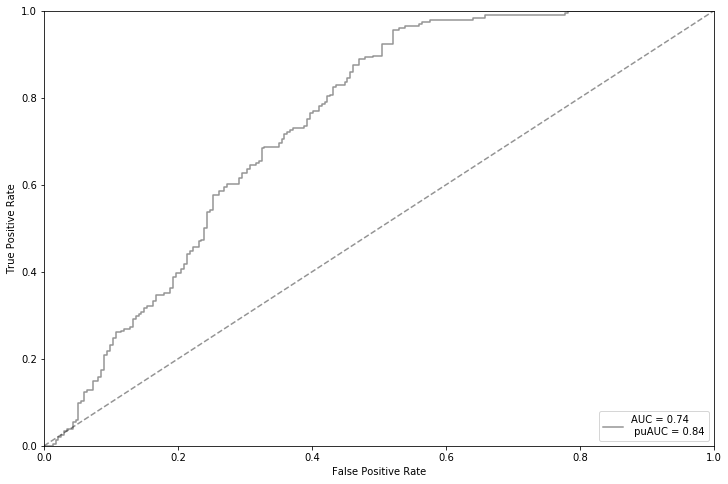

[0.01961606 0.22698974 0.29253959 0.05522134 0.07303407 0.05883699
 0.03211588 0.0431504  0.02897339 0.02097198 0.03124061 0.07089489
 0.04641506]


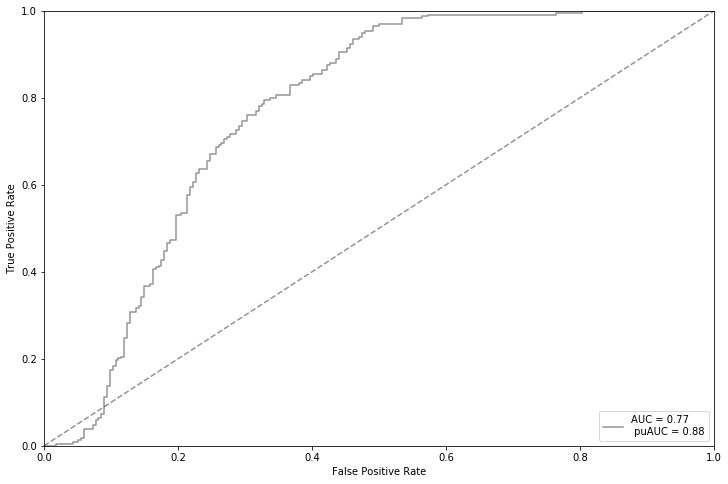

[0.02553989 0.24776032 0.29906712 0.05993673 0.07419301 0.04872765
 0.04234861 0.0356833  0.02620557 0.02360358 0.02235934 0.05973839
 0.0348365 ]


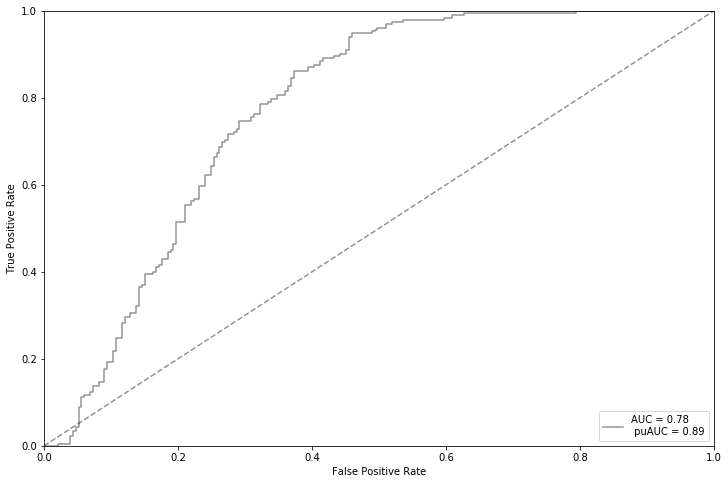

[0.02472485 0.23164639 0.27913036 0.07869613 0.09534381 0.02801191
 0.02905195 0.05612503 0.02594021 0.02619831 0.01953336 0.05599042
 0.04960726]


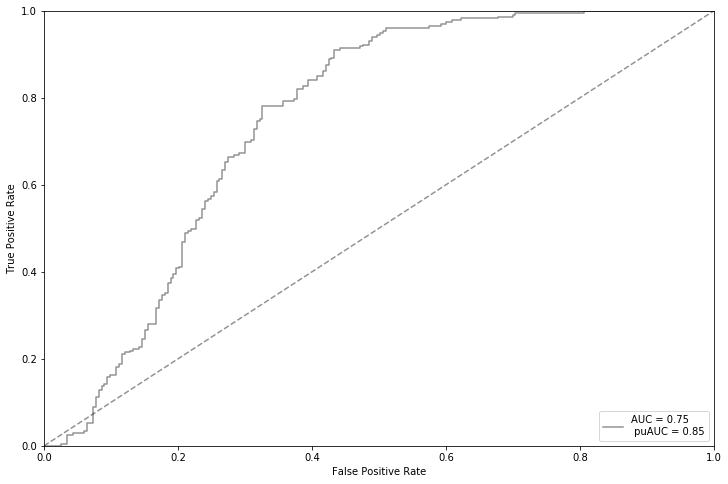

[0.02169413 0.21444613 0.34026528 0.07508784 0.06349916 0.03631785
 0.03791378 0.02840971 0.04336195 0.02955736 0.0201255  0.05281843
 0.03650288]


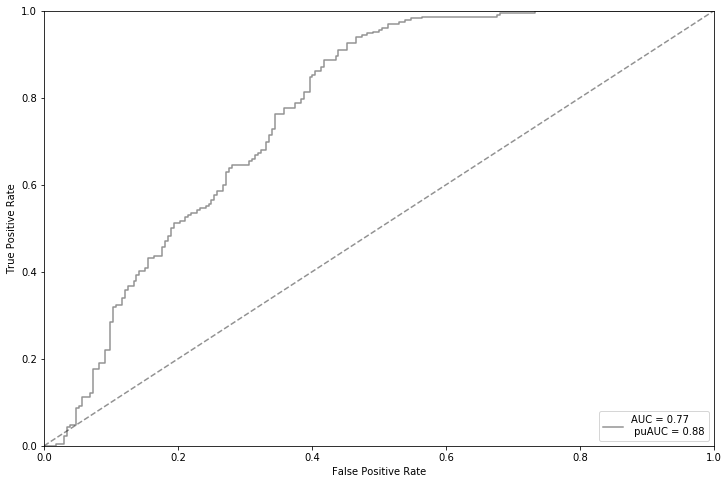

[0.0220787  0.22725554 0.29923191 0.05033213 0.09643622 0.04297154
 0.03222501 0.05515082 0.03213769 0.02125917 0.02263713 0.0662122
 0.03207195]


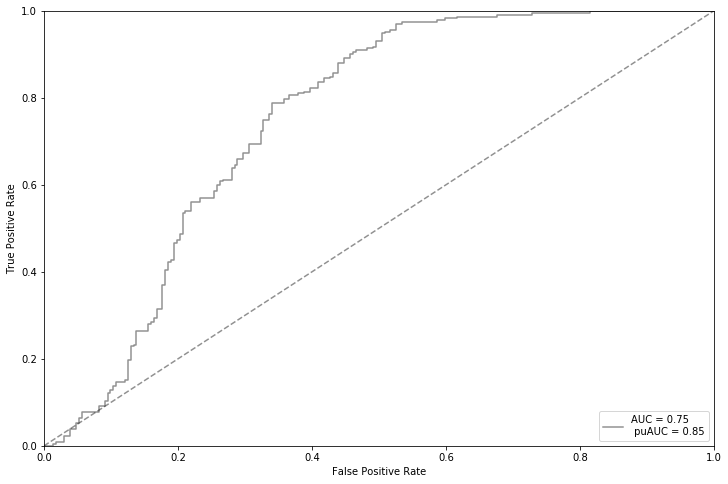

[0.01965784 0.2190843  0.30524387 0.06886706 0.06797431 0.04760067
 0.03912951 0.06516112 0.02656189 0.02008769 0.03991501 0.04393607
 0.03678066]


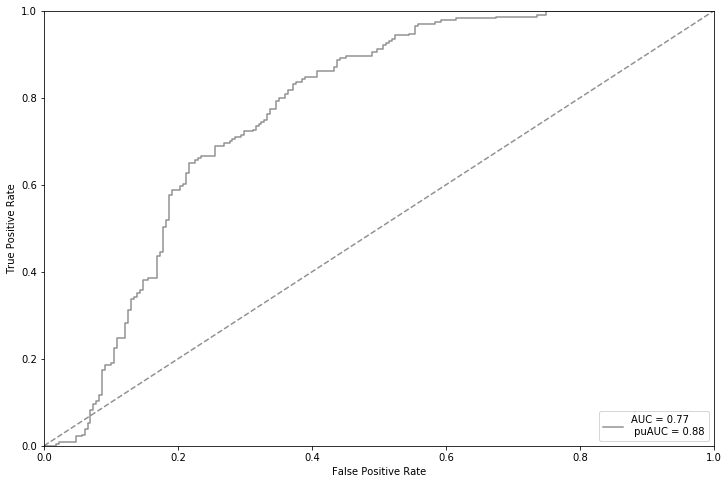

[0.02999314 0.23886902 0.24605765 0.0491268  0.07134421 0.0686455
 0.04602814 0.04899886 0.03249071 0.02594738 0.02666495 0.04558301
 0.07025062]


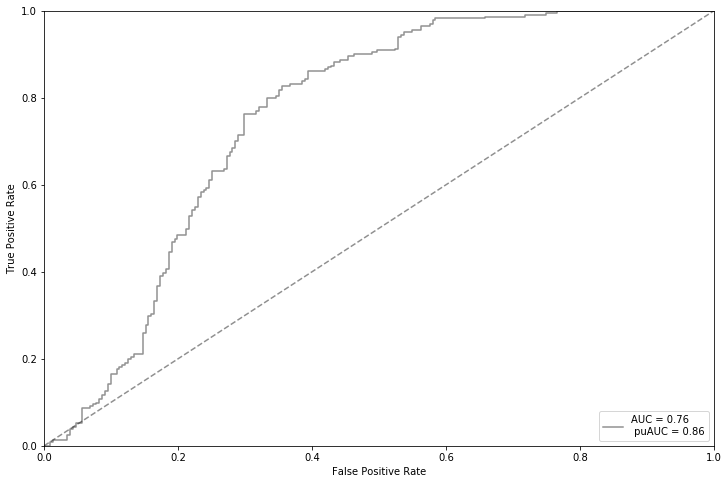

[0.01195112 0.16888232 0.30909176 0.08207928 0.06872654 0.06800915
 0.0413836  0.07411857 0.03030394 0.02453652 0.02394799 0.0476047
 0.04936451]


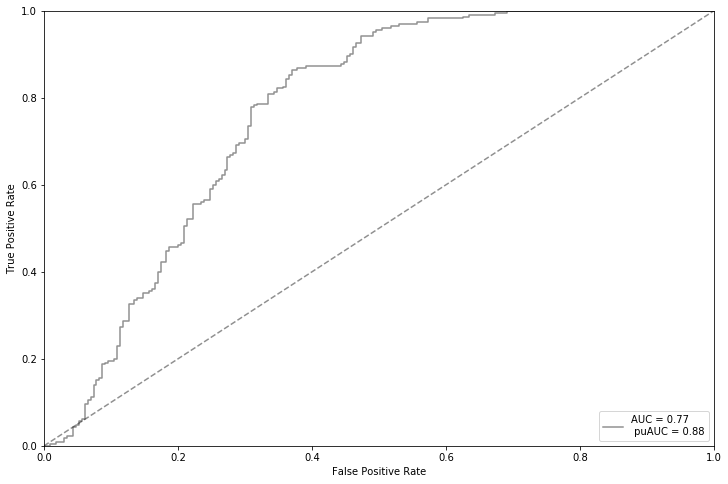

[0.03221572 0.24015713 0.254389   0.05545292 0.0580058  0.0442573
 0.03424701 0.05867883 0.03015104 0.03450509 0.02538903 0.08520011
 0.04735101]


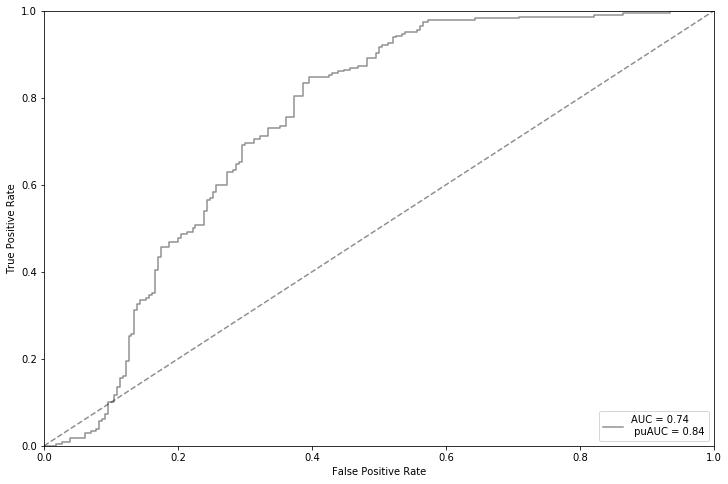

[0.02332932 0.2386046  0.29001085 0.0654175  0.05013557 0.03873848
 0.0372695  0.04188679 0.03167383 0.02678707 0.0235487  0.10146509
 0.03113271]


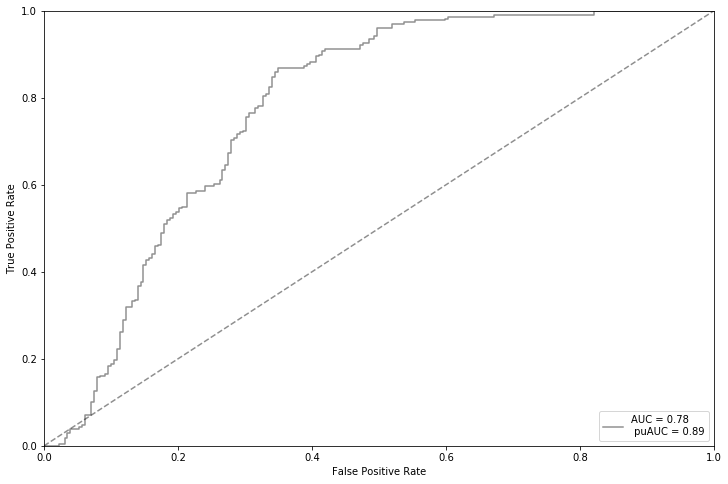

[0.02321727 0.2487352  0.30621355 0.04084645 0.05371601 0.03723443
 0.03692203 0.08674058 0.03320185 0.02754589 0.0182802  0.04513987
 0.04220668]


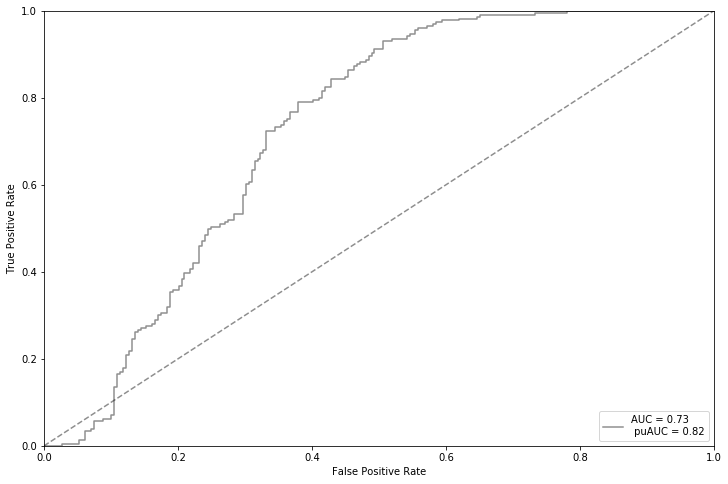

[0.01764765 0.23662539 0.31842861 0.04851615 0.09447842 0.04066489
 0.02602793 0.06229788 0.03230579 0.02237704 0.01910791 0.05062041
 0.03090193]


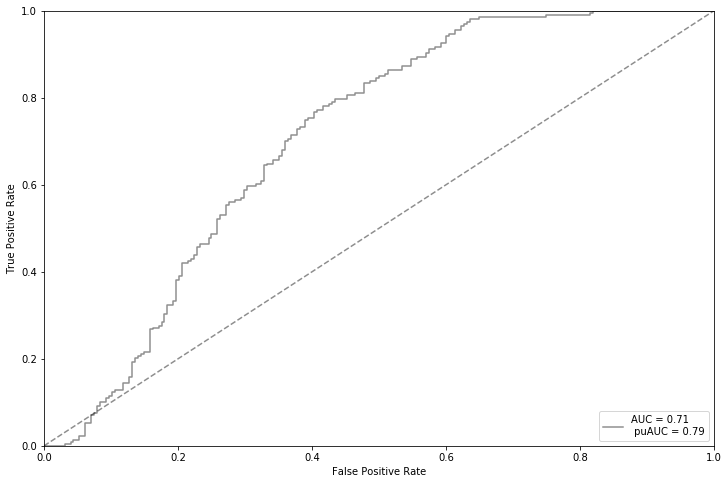

[0.04384019 0.26642788 0.27870414 0.08568707 0.04720013 0.04130163
 0.02870429 0.04020191 0.02489182 0.01823029 0.02591366 0.05072696
 0.04817001]


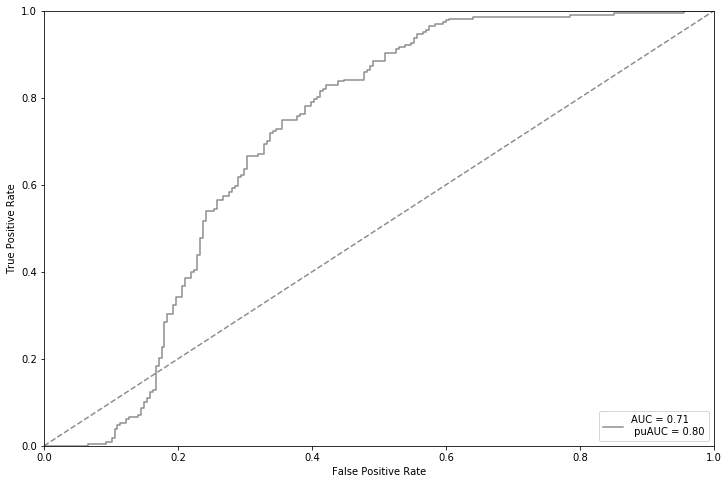

[0.0265068  0.27336598 0.29783398 0.04171817 0.0769953  0.03793241
 0.03952894 0.0461433  0.02357857 0.02919214 0.02808771 0.05166701
 0.02744968]


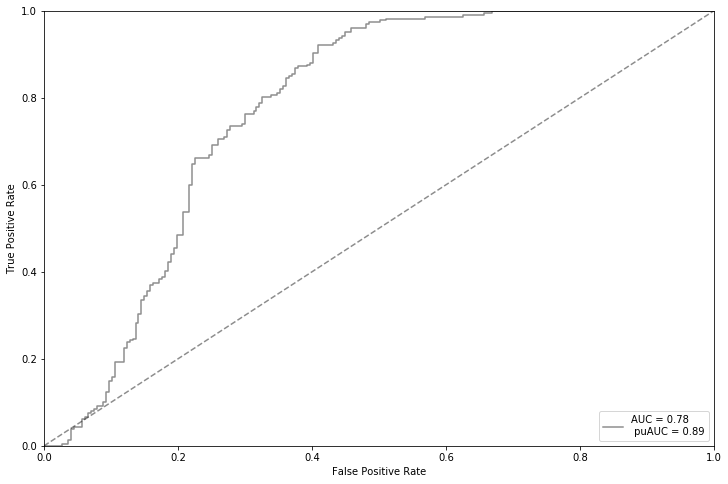

[0.05491849 0.27032133 0.28274878 0.07164448 0.04766548 0.04016163
 0.03962616 0.03848284 0.03045752 0.02706443 0.01532324 0.04880289
 0.03278273]


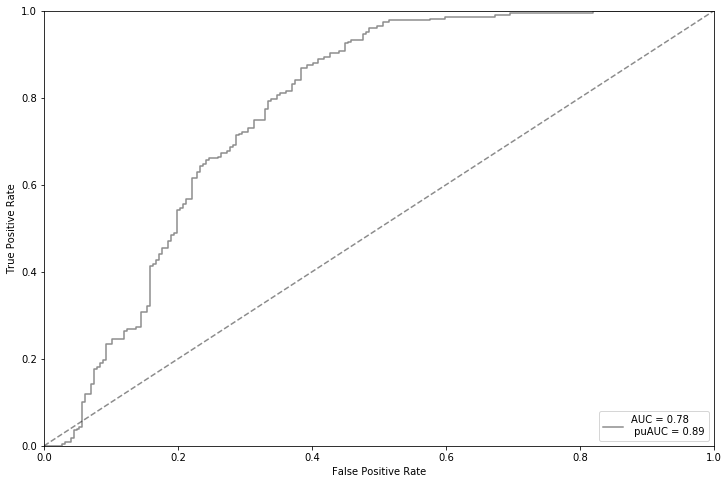

[0.03403004 0.25765502 0.21260078 0.0592302  0.12666974 0.03336572
 0.0393424  0.04224177 0.02476675 0.02255774 0.03664208 0.07807215
 0.03282561]


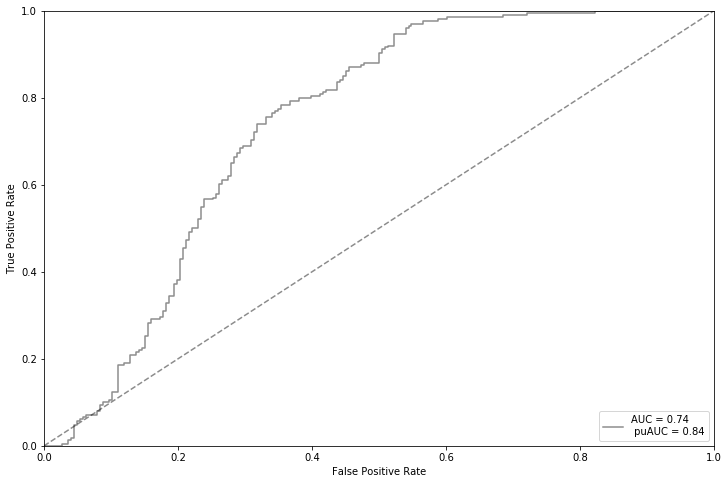

[0.0174628  0.21847193 0.35332028 0.05503673 0.06304122 0.0295165
 0.03217307 0.03828247 0.04687125 0.02598172 0.03495158 0.05079326
 0.03409717]


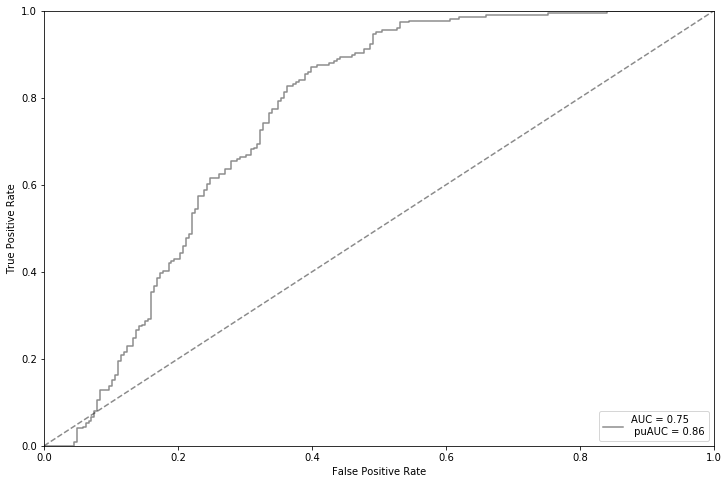

[0.01596724 0.2673592  0.30886469 0.04352022 0.08468849 0.04131947
 0.0255011  0.03425251 0.02783628 0.0256736  0.02838619 0.05336919
 0.04326182]


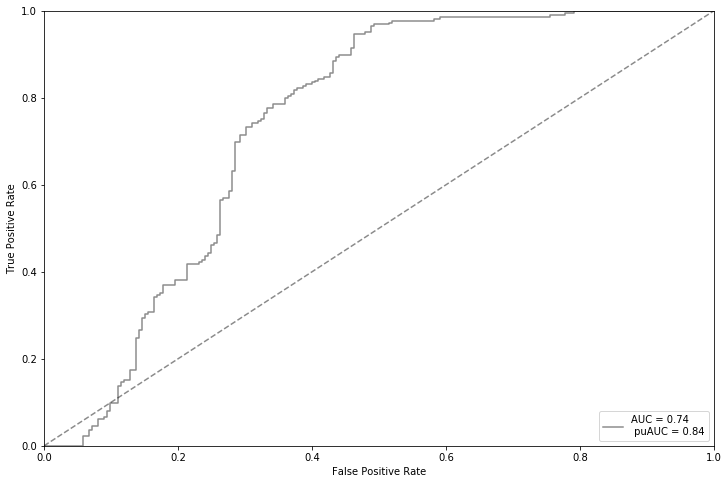

[0.02125777 0.23425393 0.26098675 0.0780296  0.0646667  0.04877108
 0.04641975 0.04045607 0.03553645 0.02223521 0.02656447 0.0641502
 0.05667202]


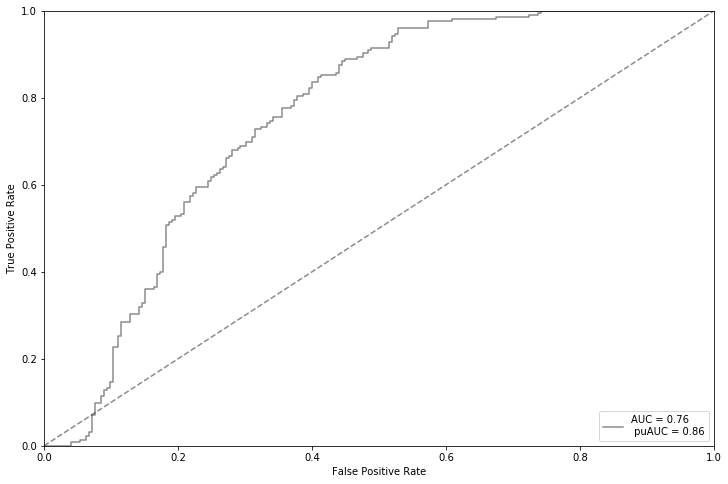

[0.02084301 0.26581599 0.27586737 0.06978276 0.08034239 0.03852564
 0.0323524  0.03698917 0.02778781 0.02231847 0.01867505 0.03907555
 0.07162438]


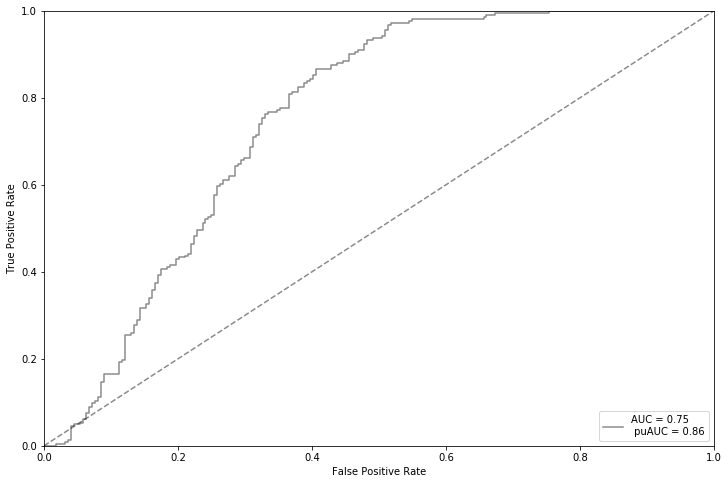

[0.01622819 0.23413501 0.31594907 0.06077865 0.07139036 0.04509903
 0.05933736 0.03094216 0.02522033 0.02340914 0.02062331 0.06351268
 0.0333747 ]


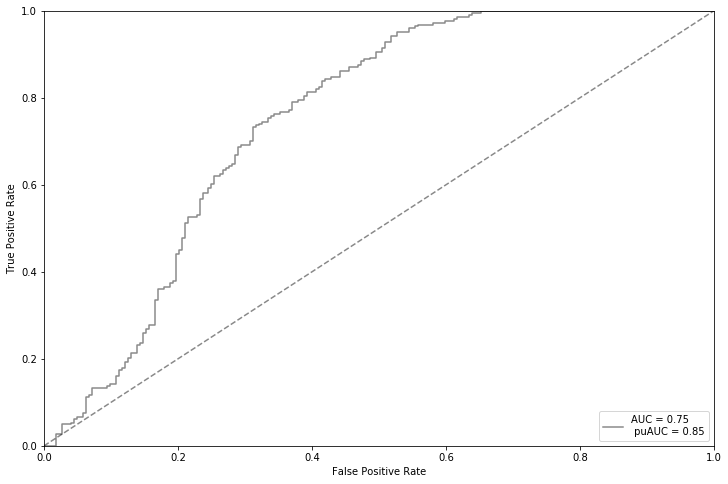

[0.0351618  0.2482993  0.27797718 0.05120616 0.06562769 0.06154748
 0.03612306 0.04200334 0.023358   0.03275978 0.03335428 0.05545513
 0.03712679]


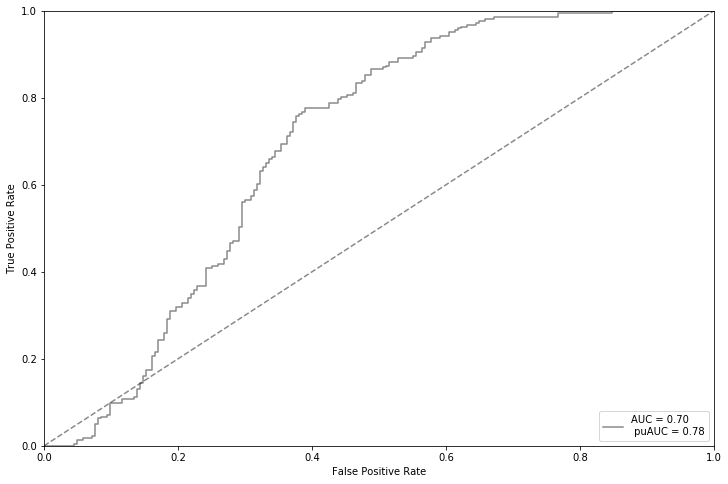

[0.01953359 0.21305812 0.32637055 0.07107905 0.07895024 0.05187428
 0.03336436 0.04520496 0.02403587 0.018323   0.02564149 0.05236028
 0.0402042 ]


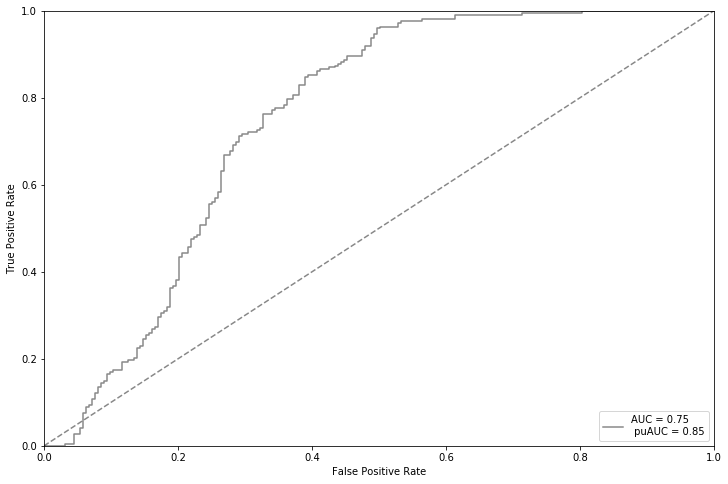

[0.02748833 0.24622375 0.27321051 0.04606013 0.06523138 0.05392709
 0.05863476 0.06286402 0.02669096 0.0371146  0.02499471 0.03818555
 0.0393742 ]


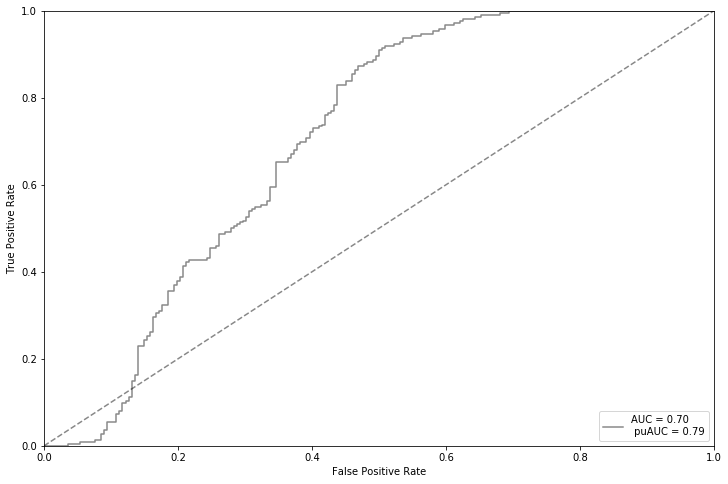

[0.02895567 0.27528699 0.27980205 0.02551557 0.07025937 0.03307788
 0.02840094 0.04859744 0.02847324 0.02336466 0.019801   0.04442625
 0.09403896]


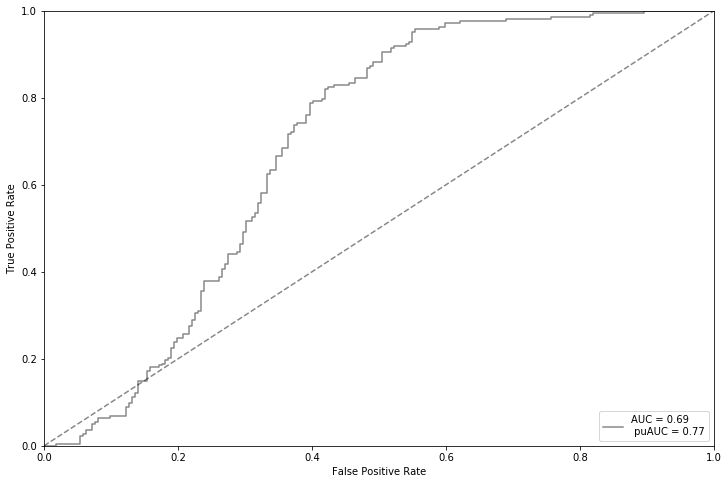

[0.03094874 0.23416043 0.30535464 0.03745096 0.05194498 0.06201427
 0.0460445  0.04982033 0.02520439 0.02732873 0.0256174  0.03936284
 0.06474779]


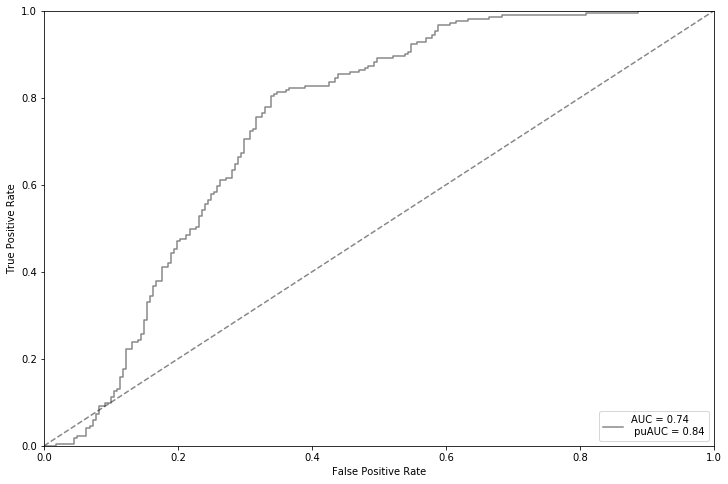

[0.02126979 0.18959152 0.32399987 0.02532448 0.07441915 0.03152217
 0.05614316 0.06613252 0.0255175  0.02643942 0.02716174 0.09524191
 0.03723677]


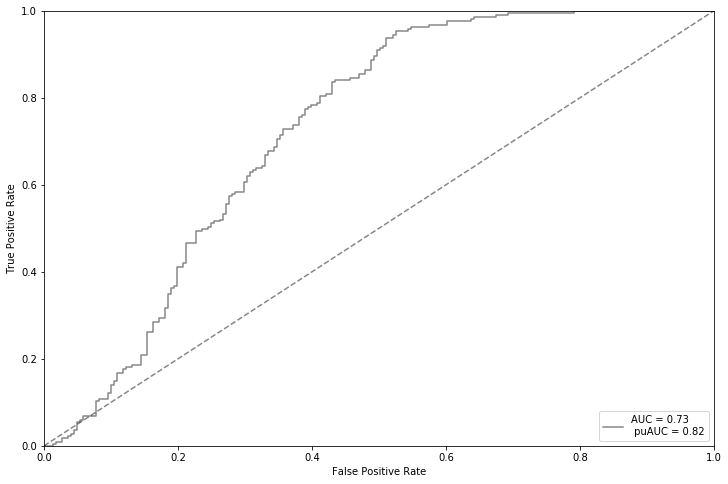

[0.01704059 0.25715385 0.29438581 0.04711834 0.0706723  0.03537156
 0.03024424 0.05139938 0.02527232 0.03524714 0.02039662 0.07724094
 0.03845692]


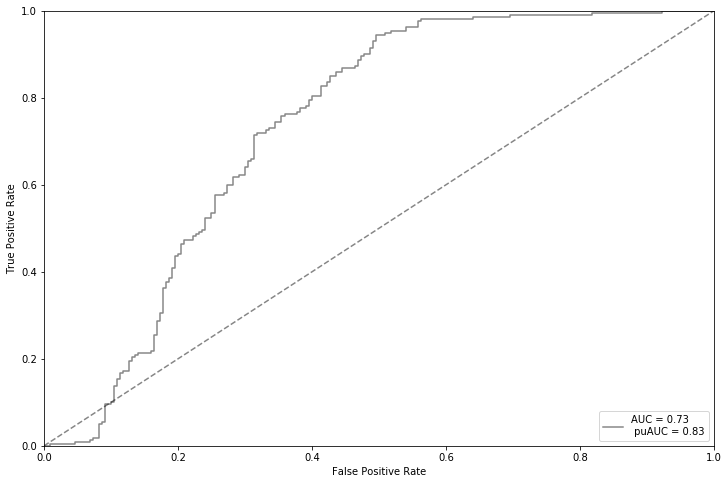

[0.03293784 0.19869362 0.32376409 0.03456102 0.04994779 0.04039355
 0.05773618 0.03035626 0.03870373 0.02091193 0.03633752 0.08856712
 0.04708935]


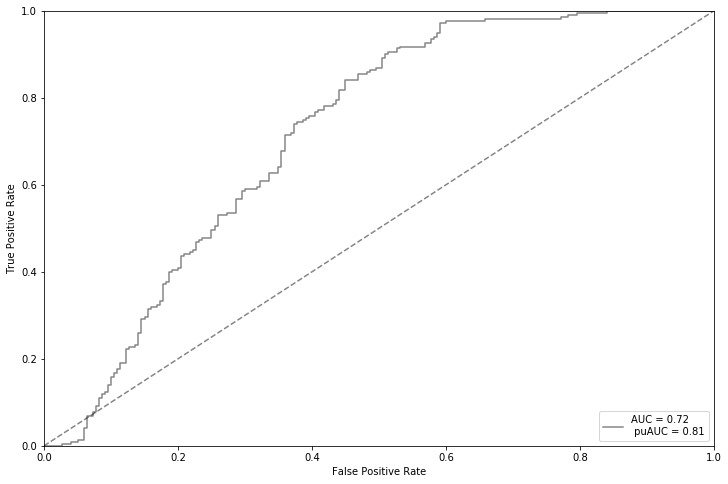

[0.02048704 0.24710178 0.2937053  0.04432514 0.05266657 0.05159005
 0.04525775 0.04105726 0.03799505 0.02345174 0.01588728 0.06720394
 0.05927109]


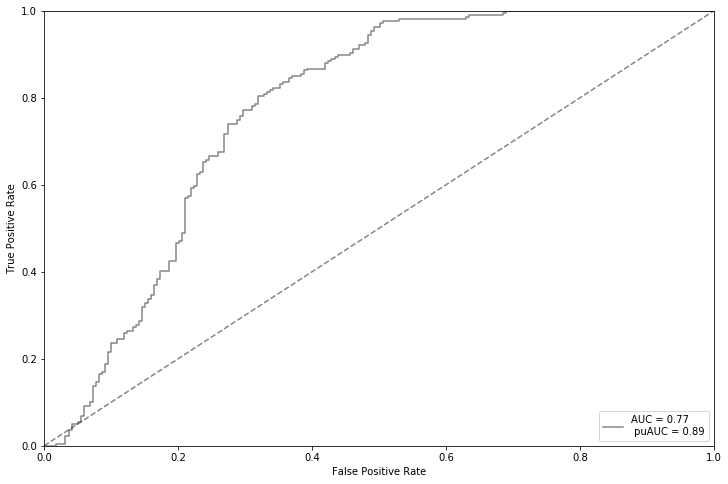

[0.02983136 0.2026328  0.2947252  0.07018396 0.05469525 0.0285822
 0.04033081 0.04460287 0.02904614 0.0194879  0.03202337 0.06839263
 0.08546553]


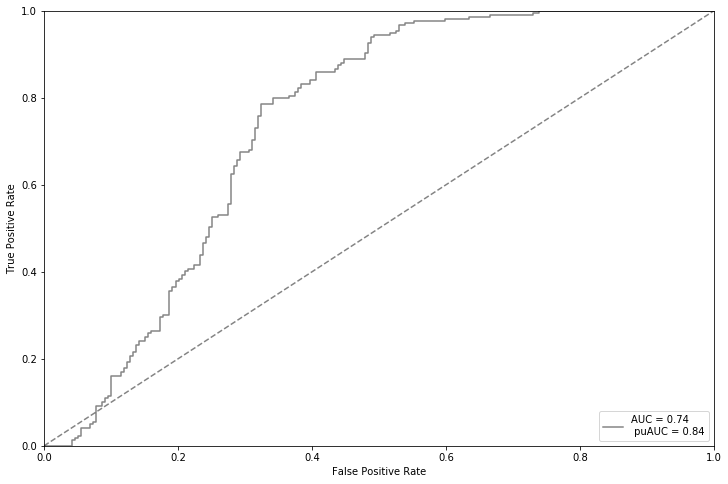

[0.02362392 0.25526944 0.24504323 0.05286486 0.07138722 0.03764096
 0.05683964 0.06134298 0.02470118 0.02704851 0.01468812 0.0777298
 0.05182014]


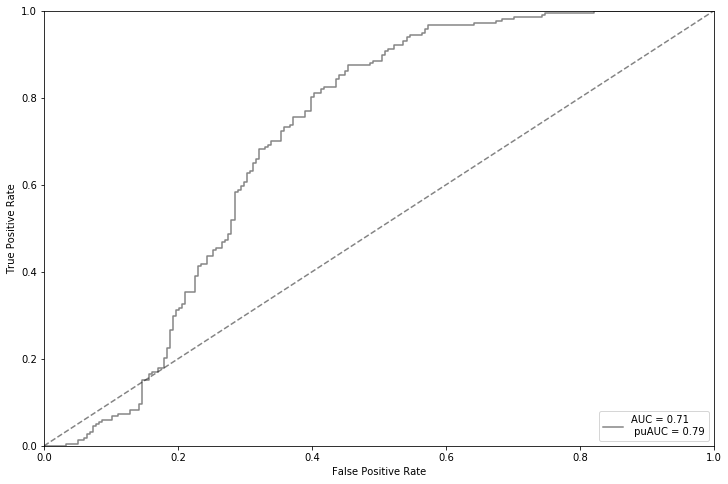

[0.03179312 0.23584697 0.28194197 0.08627203 0.05761943 0.02881617
 0.04504124 0.02917165 0.03763697 0.02753504 0.02600897 0.06006857
 0.05224787]


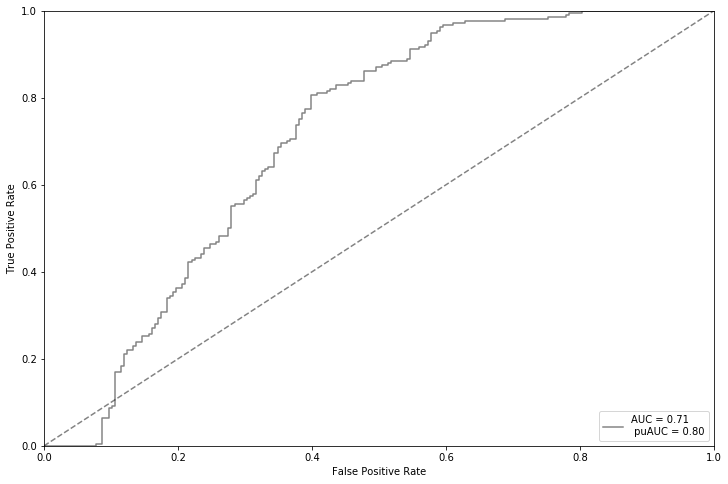

[0.01368216 0.22588105 0.25512802 0.03966626 0.10016022 0.03893087
 0.05257159 0.04962913 0.03491444 0.03108047 0.03276818 0.06530239
 0.06028521]


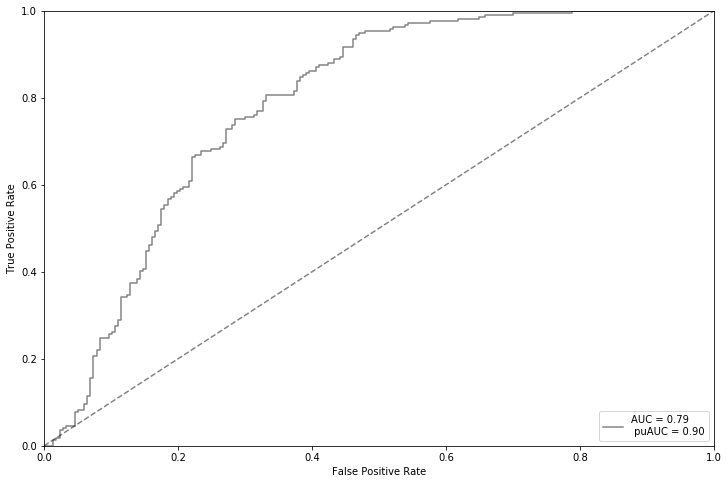

[0.03551752 0.23150199 0.31207882 0.03982    0.0981564  0.0409918
 0.03280211 0.04432405 0.0349094  0.02537946 0.01619078 0.0542162
 0.03411146]


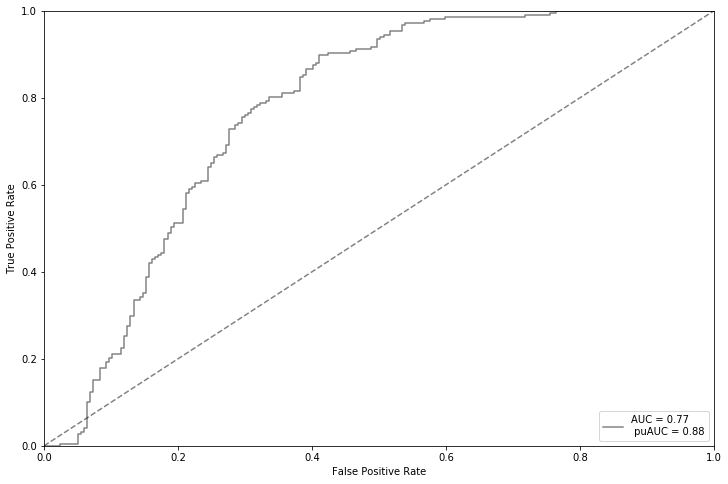

[0.02044652 0.26538223 0.29993987 0.03162509 0.05620387 0.04211024
 0.05069118 0.0354526  0.03605521 0.02478695 0.03393079 0.06534912
 0.03802633]


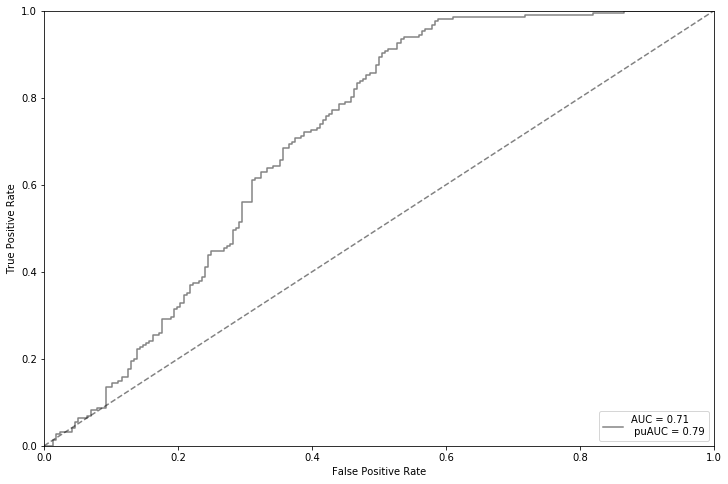

[0.03001636 0.20497816 0.27125737 0.05952646 0.10303651 0.04304592
 0.04849161 0.04371205 0.03145012 0.02893029 0.02502711 0.07459152
 0.03593651]


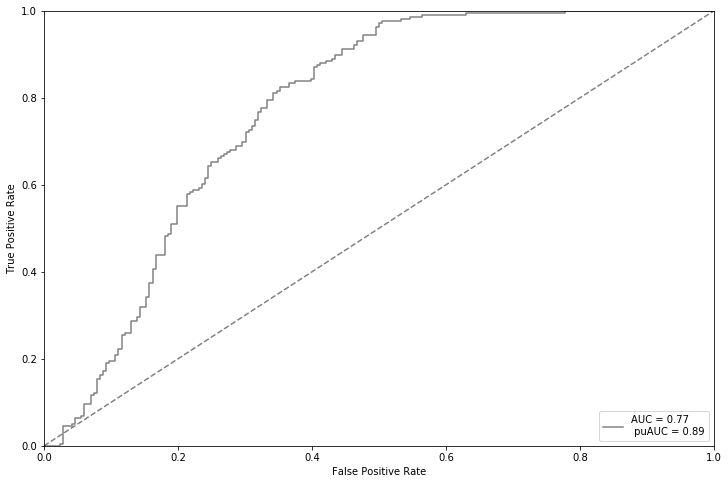

[0.01489967 0.30833162 0.23830146 0.06098678 0.09338424 0.03033256
 0.04344773 0.03333942 0.04217269 0.01486855 0.02337469 0.06351659
 0.03304398]


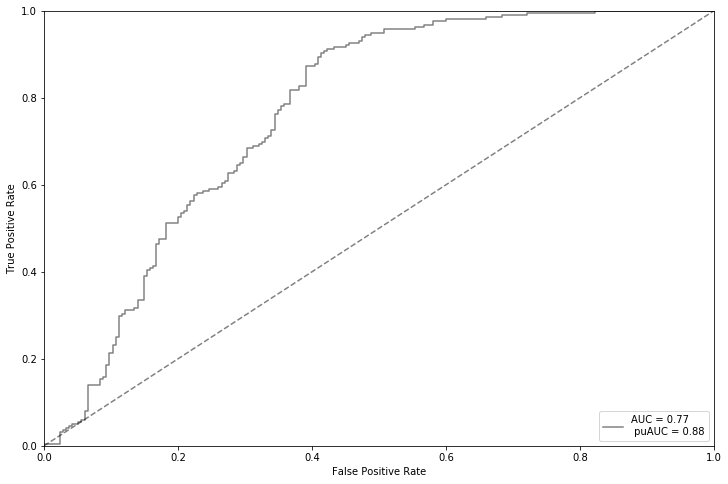

[0.01891787 0.20832379 0.28173854 0.05964093 0.09425054 0.06426055
 0.05734741 0.03433873 0.03961579 0.02399489 0.02651995 0.05001406
 0.04103693]


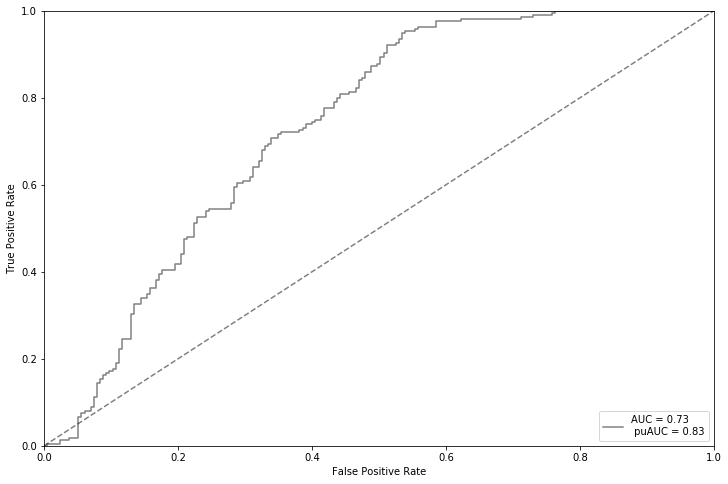

[0.02246368 0.22418619 0.34644451 0.04221954 0.08430364 0.03491319
 0.03922899 0.02860674 0.03129298 0.02742003 0.0179706  0.04727291
 0.05367702]


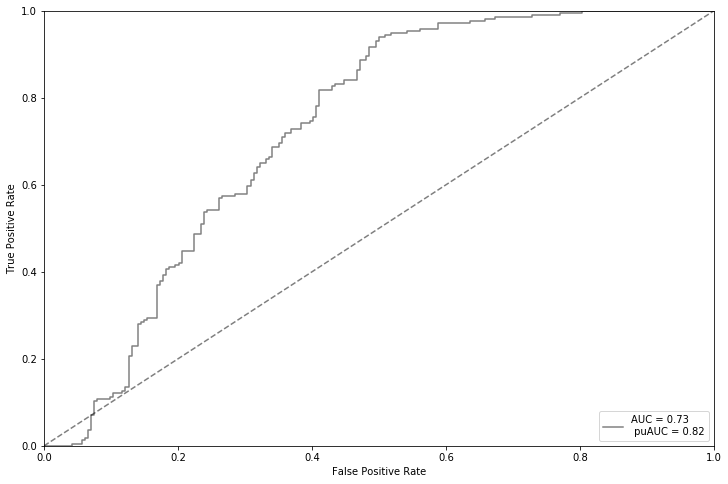

[0.02428982 0.2543459  0.25860621 0.02727891 0.09498996 0.04522067
 0.05566954 0.02945915 0.02890017 0.02530069 0.02478301 0.06837458
 0.06278138]


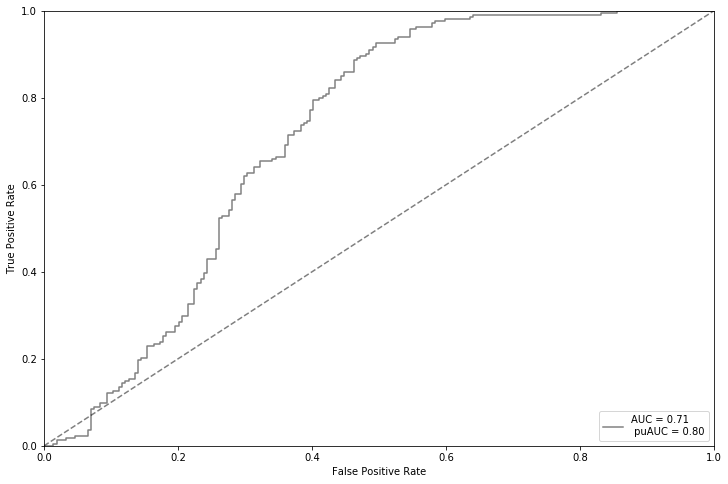

[0.01962363 0.30160637 0.29356247 0.04122204 0.03293917 0.04308901
 0.03232643 0.0316799  0.03246374 0.02759511 0.03153342 0.078534
 0.03382472]


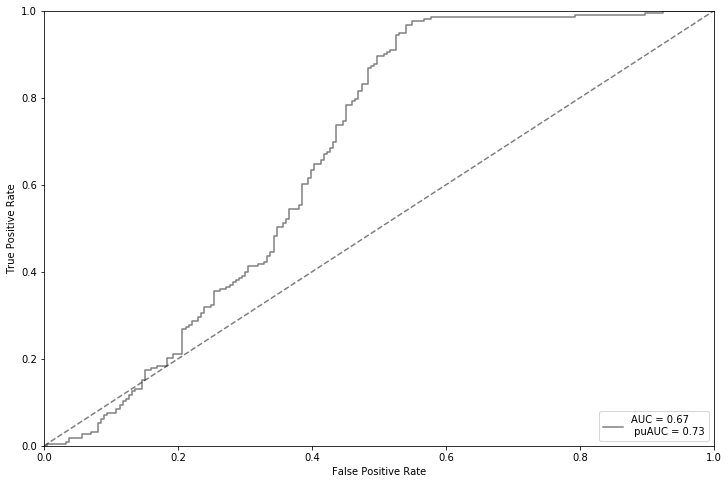

[0.03359296 0.27011691 0.26789528 0.02524956 0.07961409 0.04448835
 0.04529138 0.04449706 0.02329704 0.03275263 0.03052969 0.06090714
 0.04176791]


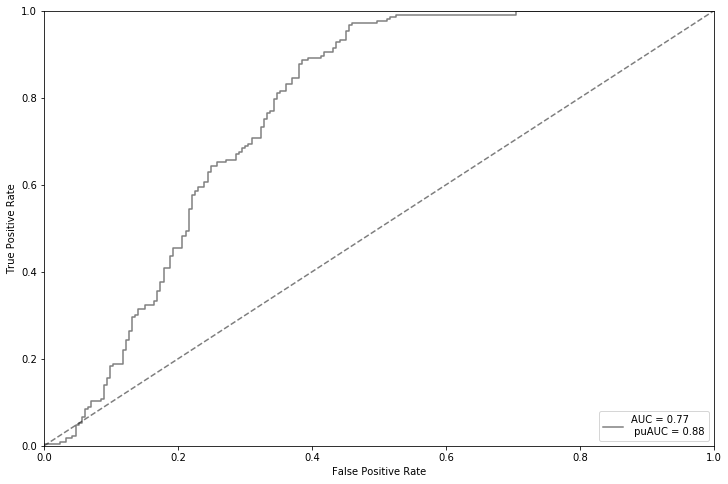

[0.02175907 0.25157238 0.27292692 0.09653497 0.0595451  0.03487505
 0.05695665 0.06311961 0.03049002 0.02237002 0.03018747 0.03413888
 0.0255239 ]


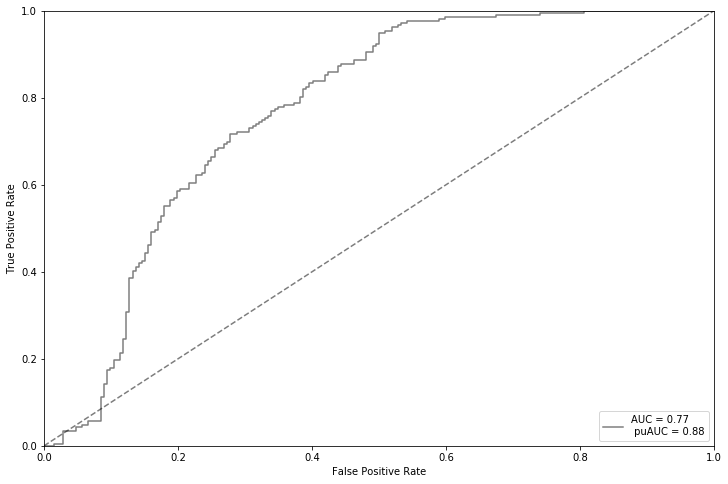

[0.0315707  0.20641019 0.29468498 0.0598652  0.06044901 0.0496084
 0.04570944 0.02960167 0.02996265 0.01622566 0.03011849 0.07639098
 0.06940264]


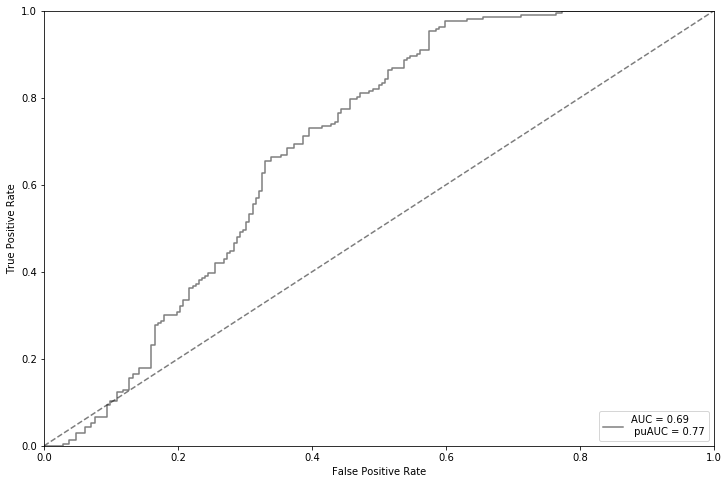

[0.02683184 0.20308323 0.2867378  0.08367582 0.06237868 0.05891726
 0.0385219  0.04182392 0.02992929 0.02436432 0.02118028 0.07766245
 0.04489321]


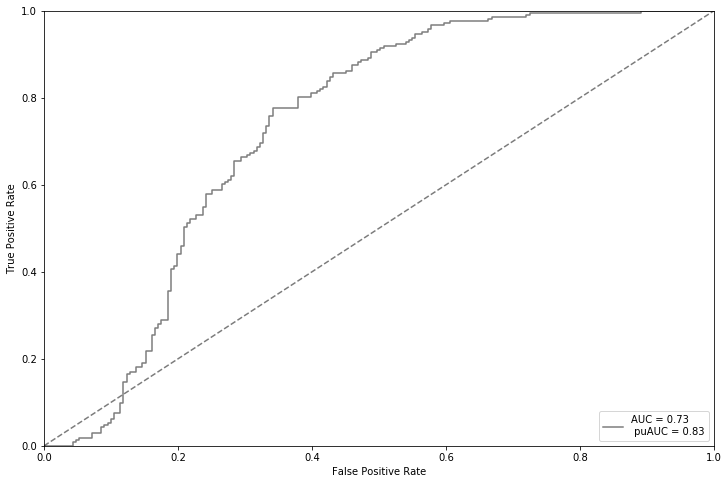

[0.02401793 0.21022666 0.3012952  0.05982494 0.0714738  0.03471806
 0.04037851 0.03275137 0.03968456 0.02365678 0.03235692 0.0921922
 0.03742306]


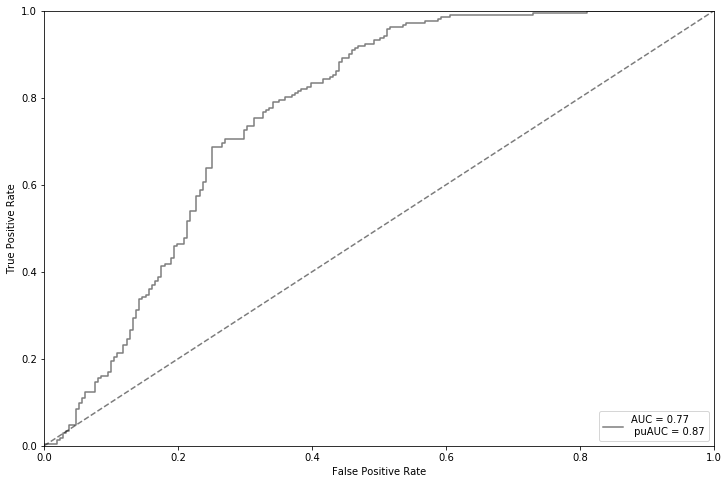

[0.02653086 0.2370967  0.29723427 0.04774179 0.09134332 0.04754624
 0.03478905 0.04170773 0.03392397 0.02775136 0.01813928 0.04886539
 0.04733005]


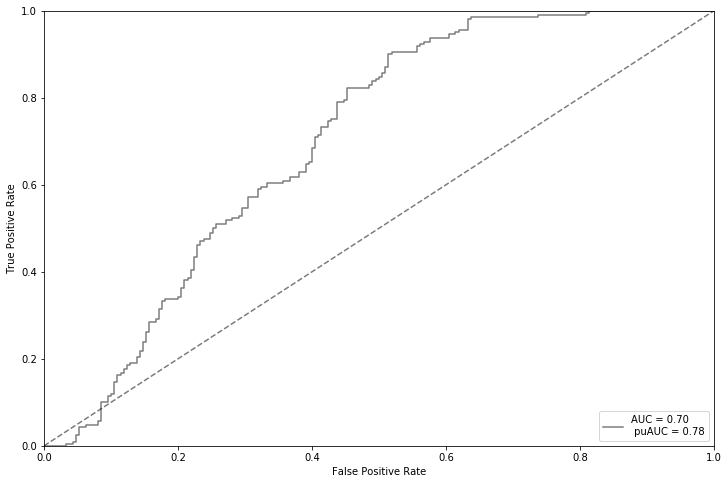

[0.0322241  0.26226599 0.31017019 0.03840235 0.07180566 0.04952732
 0.02722583 0.03941618 0.02432706 0.02039024 0.03573245 0.05780489
 0.03070774]


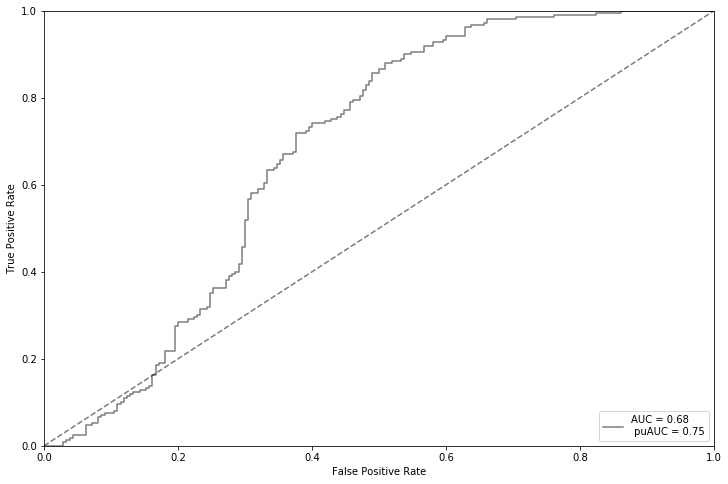

[0.02598636 0.23482363 0.23780976 0.06062261 0.0854657  0.0543929
 0.03963115 0.03665188 0.02734846 0.03601534 0.03740789 0.09062836
 0.03321595]


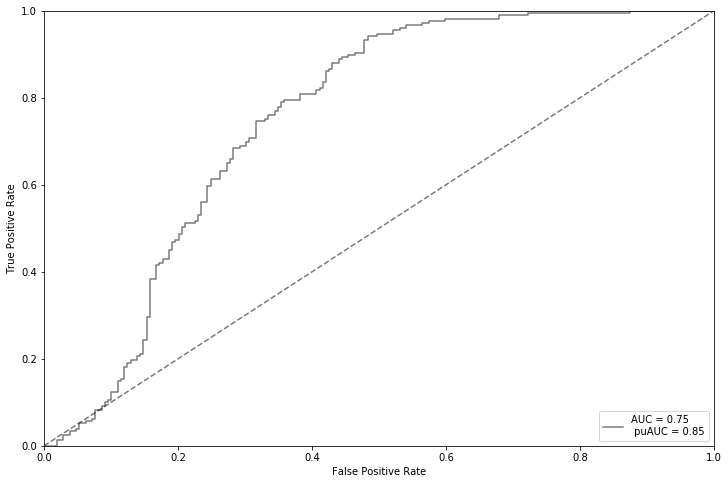

[0.02436578 0.25024119 0.30511366 0.06433267 0.0580124  0.03797511
 0.04340216 0.03493423 0.04512753 0.02078409 0.0268925  0.05250324
 0.03631542]


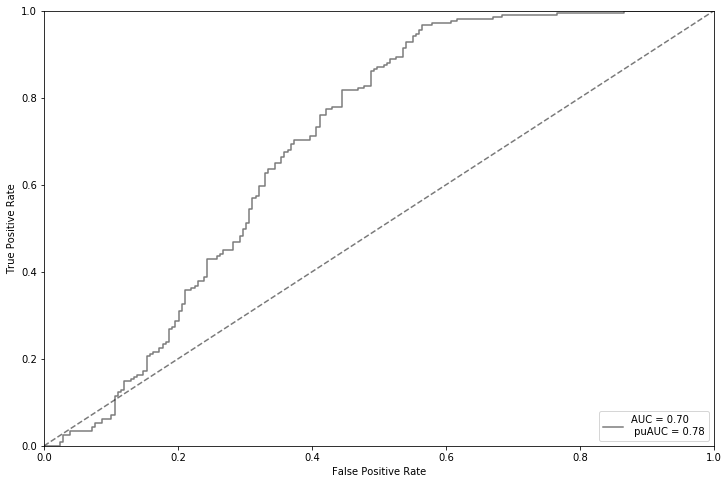

[0.02356022 0.20607902 0.30082728 0.08074991 0.05844198 0.05925654
 0.03374893 0.03776133 0.03097262 0.0332525  0.02707495 0.03837794
 0.06989677]


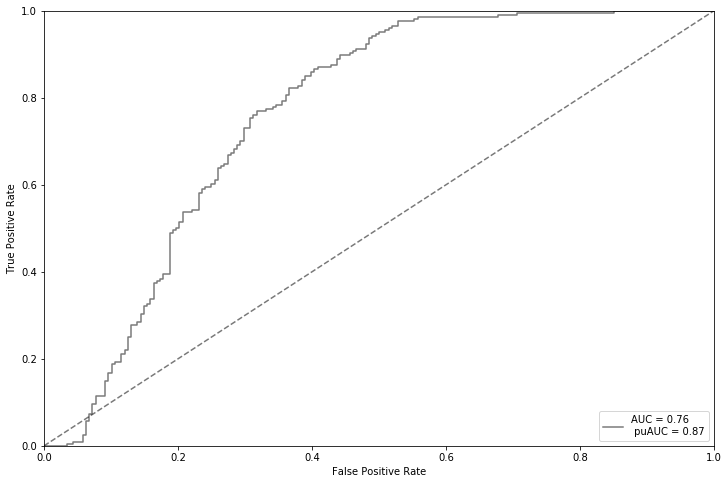

[0.04209743 0.25929891 0.22758931 0.08765554 0.07220908 0.03420072
 0.03485698 0.04191923 0.03128135 0.03498283 0.03893827 0.05862194
 0.03634839]


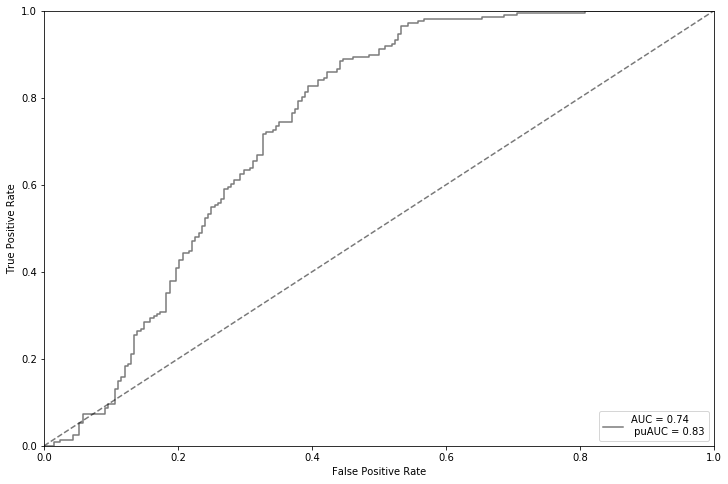

[0.01618527 0.23811952 0.34113344 0.04715676 0.06712484 0.07352265
 0.03950522 0.03700415 0.03091542 0.02543454 0.01752357 0.03367387
 0.03270076]


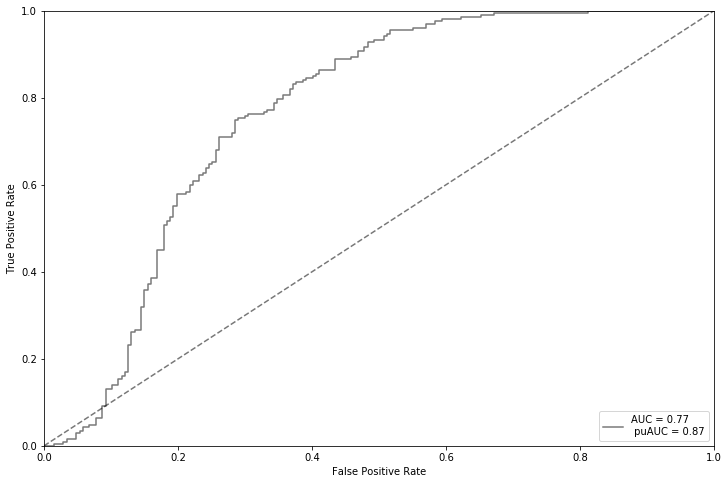

[0.03631795 0.25200009 0.28842801 0.06393524 0.0657483  0.0405221
 0.05054264 0.04250095 0.02982103 0.02130144 0.03091885 0.04164506
 0.03631835]


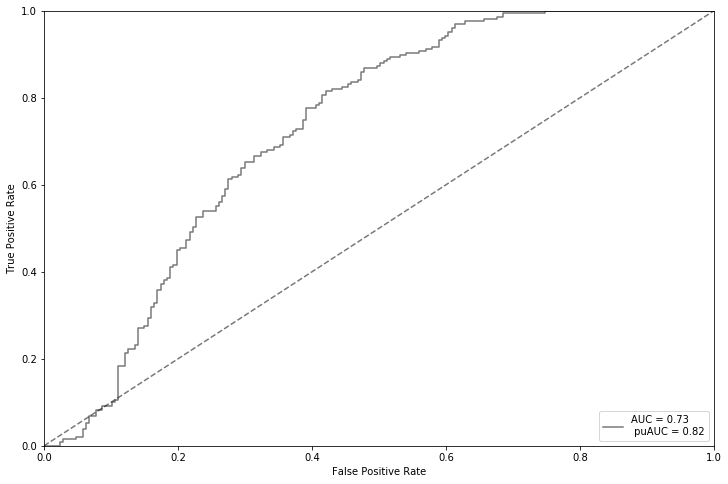

[0.03060868 0.22773099 0.29350964 0.05556835 0.10079381 0.05227026
 0.03529519 0.03320914 0.03165409 0.01756762 0.01859364 0.05142982
 0.05176878]


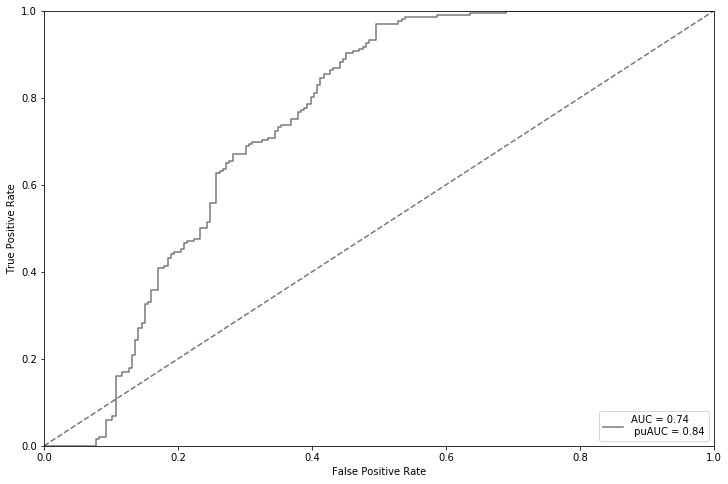

[0.02212176 0.21688968 0.31763547 0.05580754 0.05426325 0.03685066
 0.04852015 0.04508553 0.02293811 0.03101151 0.03238212 0.08120669
 0.03528752]


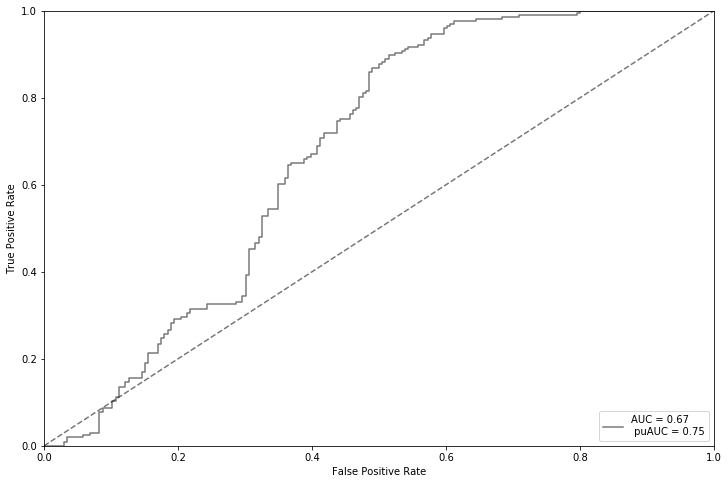

[0.02800417 0.20234699 0.37782601 0.03456529 0.06731509 0.05173532
 0.03753238 0.03345649 0.02872781 0.03405999 0.03603107 0.04330824
 0.02509116]


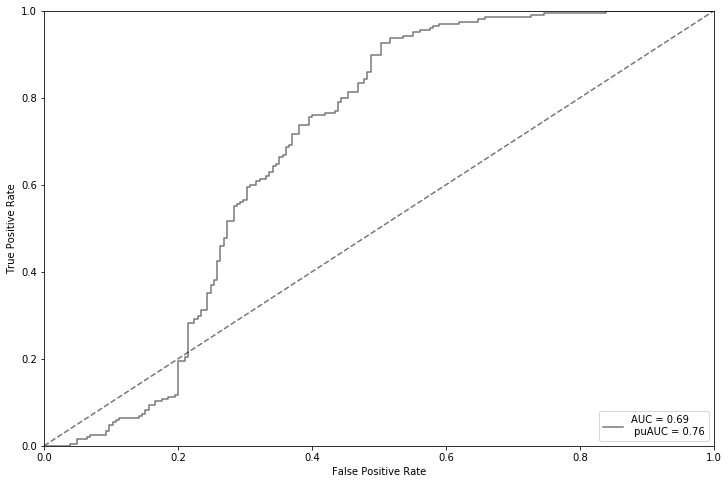

[0.0182178  0.26115287 0.26248597 0.03890519 0.09486246 0.03448649
 0.02994291 0.03332141 0.04640349 0.02806051 0.03883753 0.07228238
 0.04104099]


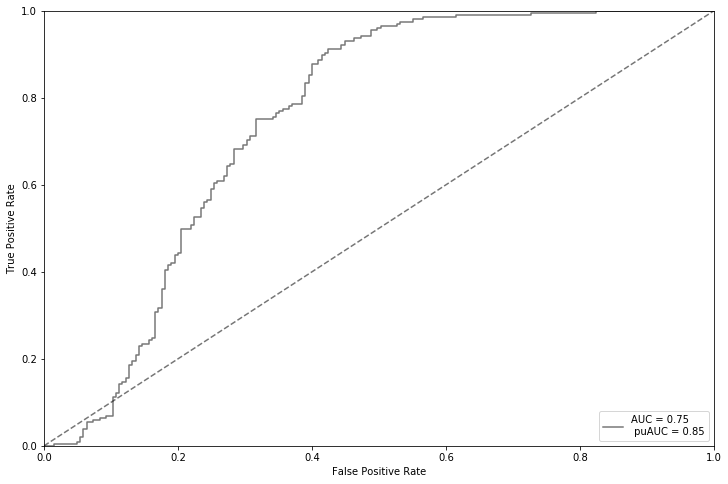

[0.01838662 0.22075714 0.28188328 0.04512991 0.07082109 0.04680905
 0.03389906 0.04664217 0.02519653 0.03469775 0.02518396 0.07326216
 0.07733129]


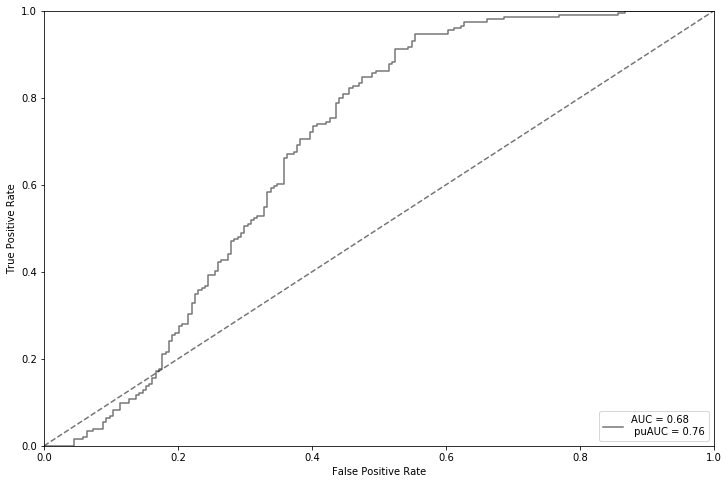

[0.0293242  0.23864631 0.31646471 0.03782517 0.09379848 0.04183925
 0.03278847 0.02754129 0.0369135  0.02666052 0.02490549 0.04345362
 0.04983899]


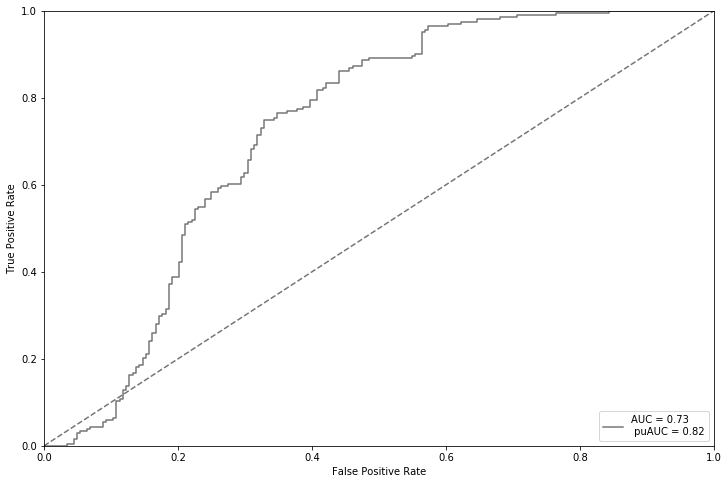

[0.02251619 0.22045785 0.31133164 0.06463611 0.07289703 0.03186649
 0.0396325  0.05423134 0.02688886 0.02111329 0.03520454 0.05429468
 0.04492949]


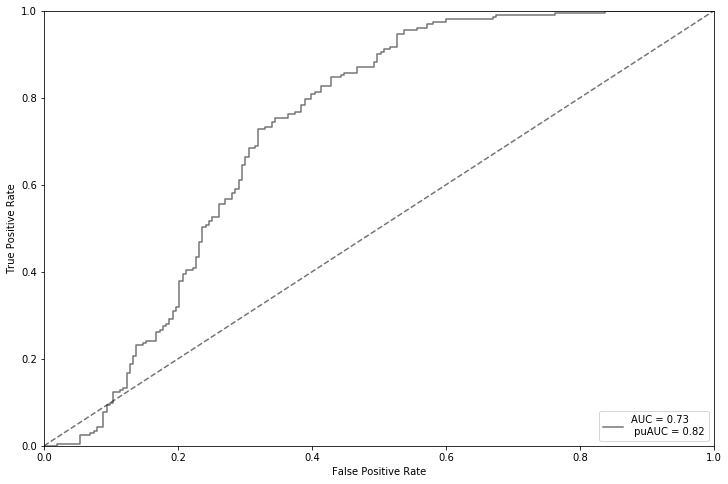

[0.02103002 0.25559242 0.34128084 0.05224994 0.06442399 0.03161802
 0.03627726 0.03055478 0.02441919 0.02373973 0.02360806 0.04488472
 0.05032103]


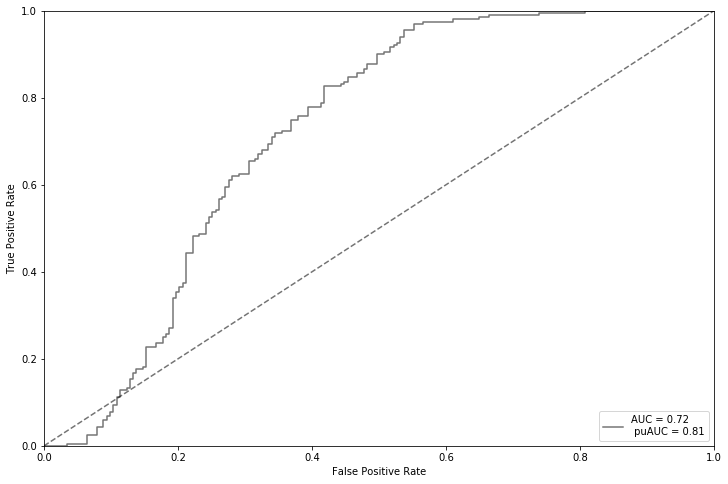

[0.03014213 0.28206485 0.27665817 0.05105602 0.0672881  0.0375307
 0.05466396 0.038183   0.02966979 0.0226857  0.0182493  0.04791519
 0.0438931 ]


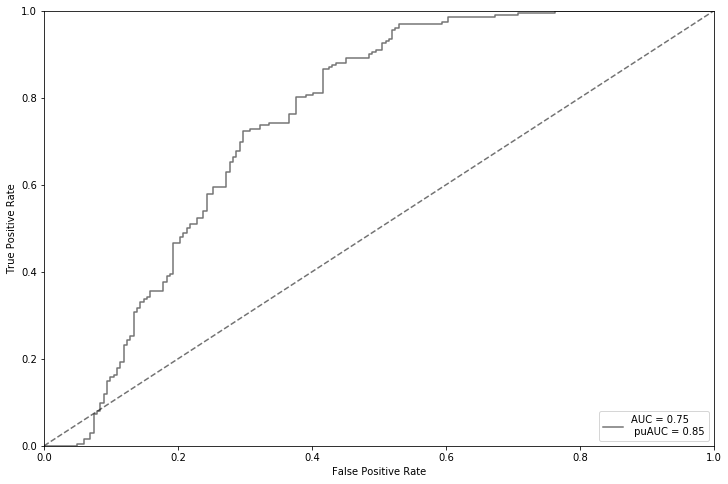

[0.03103374 0.25718456 0.31145528 0.04417779 0.04947014 0.03600749
 0.03939965 0.03494069 0.0354833  0.0317734  0.02390405 0.06004626
 0.04512366]


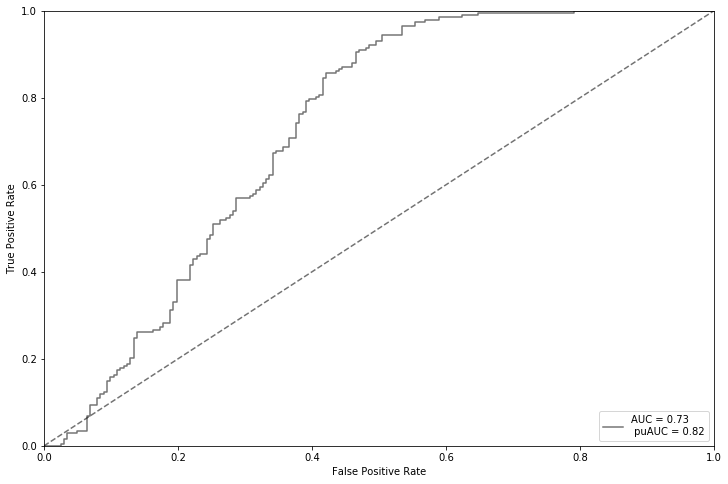

[0.03741551 0.24844325 0.2946398  0.08788907 0.0500099  0.03701009
 0.04531741 0.02991284 0.02760338 0.02381715 0.03593884 0.04957154
 0.03243124]


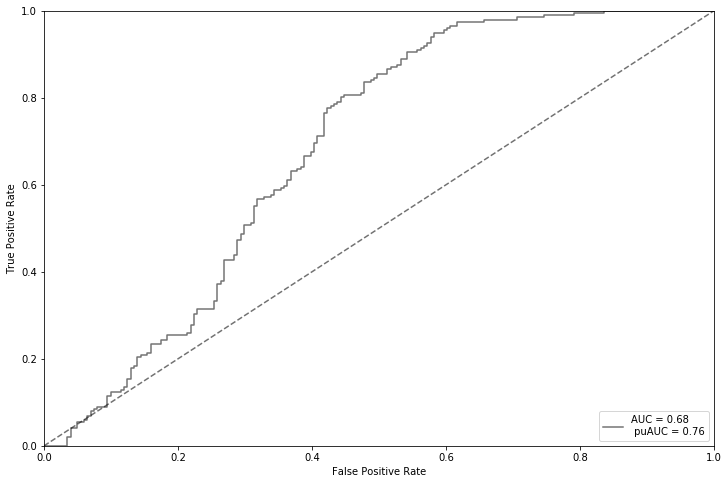

[0.0431759  0.19417095 0.34160266 0.13114325 0.03521659 0.03554404
 0.02800525 0.03499576 0.02964212 0.01847882 0.02479065 0.04942422
 0.03380979]


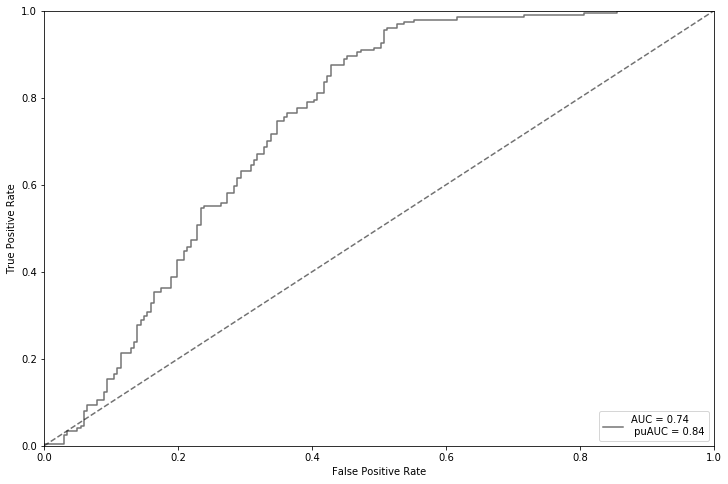

[0.03037138 0.2761054  0.26769004 0.03690085 0.09535419 0.03882476
 0.03756954 0.03337598 0.03790103 0.02589776 0.02985676 0.04639172
 0.04376056]


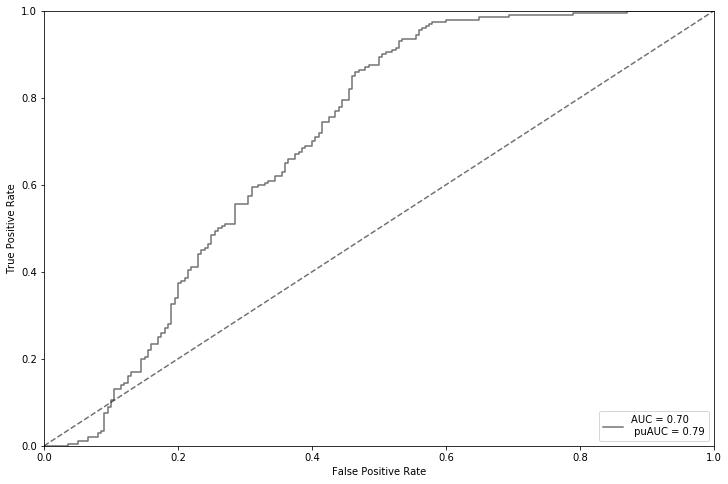

[0.04413042 0.27435625 0.27662551 0.05828396 0.04247319 0.03158333
 0.05398682 0.04061123 0.0239291  0.03273084 0.02524658 0.06407102
 0.03197176]


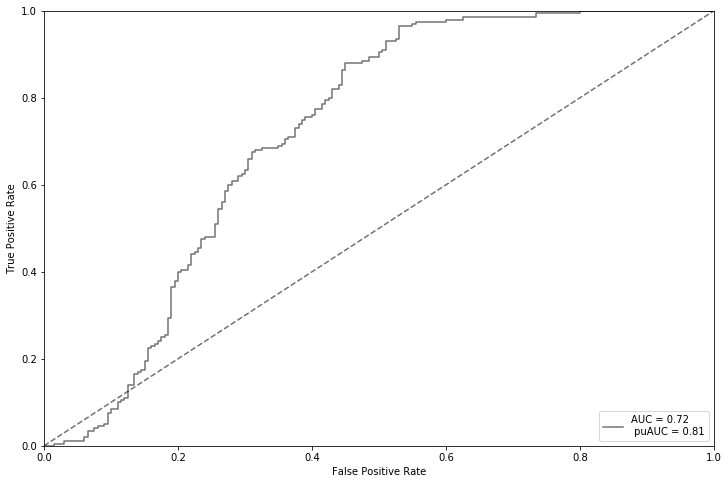

[0.03484874 0.26320939 0.30206042 0.05337751 0.06508535 0.04153787
 0.04104418 0.03891734 0.02538135 0.02608175 0.01894209 0.04902549
 0.04048852]


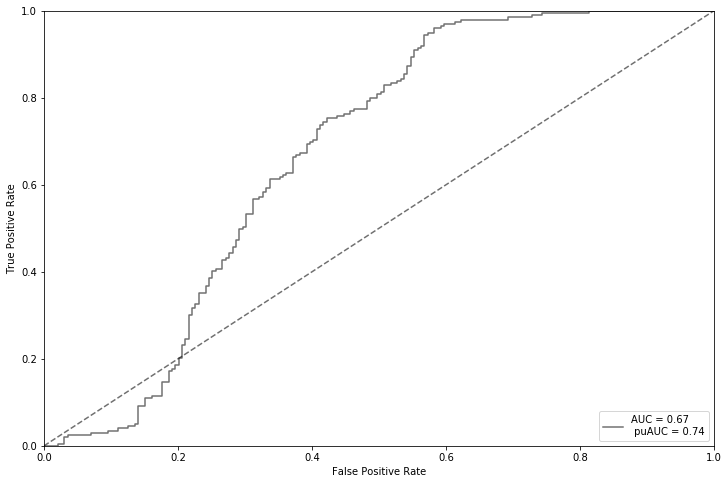

[0.01702738 0.24611373 0.2765492  0.0523018  0.11229286 0.05435511
 0.03832704 0.03966804 0.02378282 0.02104937 0.02274229 0.05195863
 0.04383173]


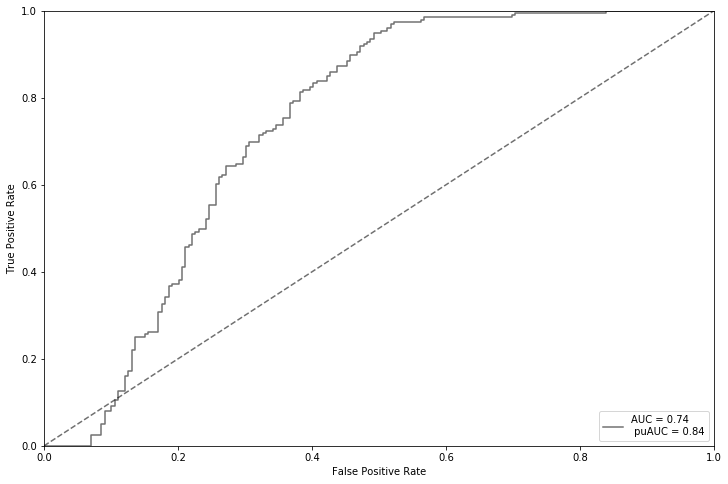

[0.02479382 0.23270213 0.27169646 0.06125939 0.08198686 0.03144618
 0.06783305 0.03035041 0.03309374 0.02502005 0.02006669 0.06785927
 0.05189196]


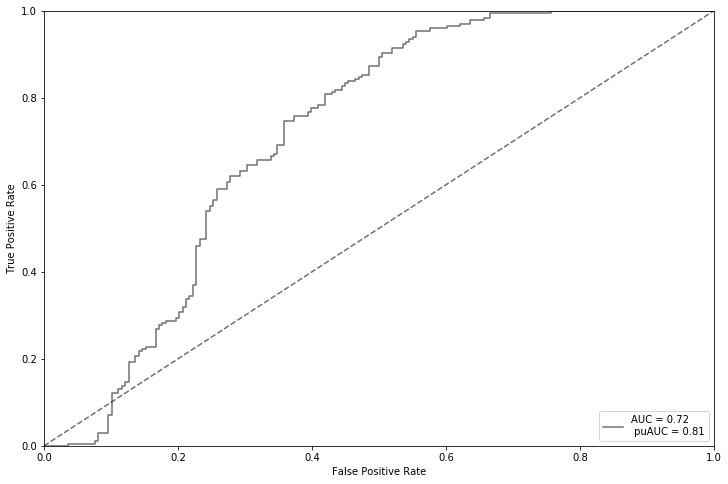

[0.02643342 0.22419498 0.26339432 0.06126519 0.07293224 0.05750072
 0.04778344 0.04437016 0.0345871  0.02983604 0.03439067 0.06548581
 0.03782591]


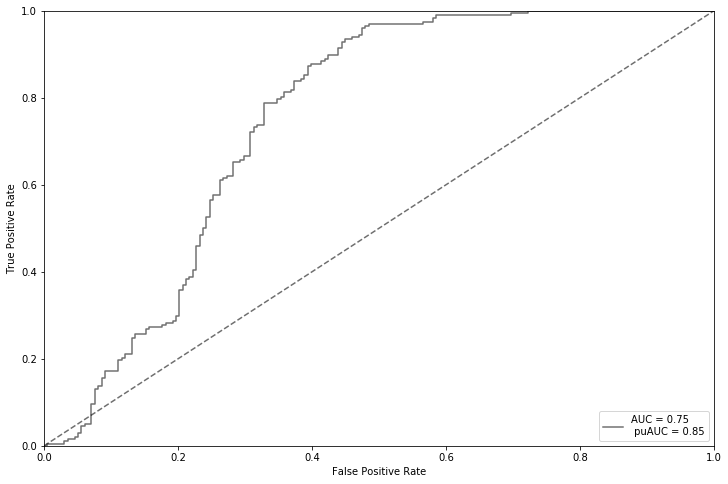

[0.02945622 0.24679923 0.30302522 0.02573928 0.07625974 0.04399131
 0.04060364 0.03945436 0.02972656 0.02545692 0.02197987 0.07478649
 0.04272116]


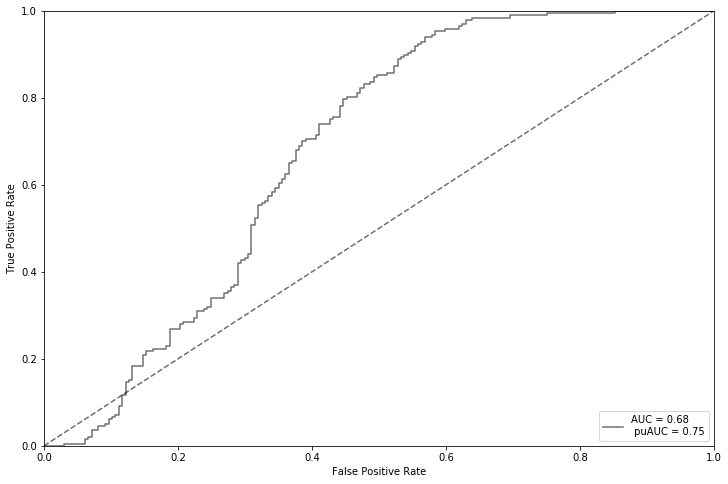

[0.02036008 0.23287722 0.34300404 0.03559866 0.04967716 0.03371394
 0.04610398 0.02840658 0.03733075 0.02766682 0.03518839 0.07581006
 0.0342623 ]


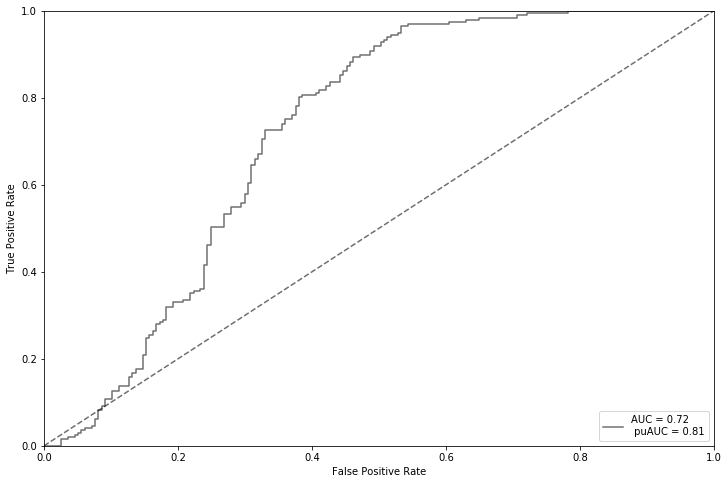

[0.02902872 0.21314498 0.30364012 0.0512913  0.07593833 0.05307692
 0.03127529 0.03106292 0.03329852 0.03271446 0.0274975  0.06823651
 0.04979444]


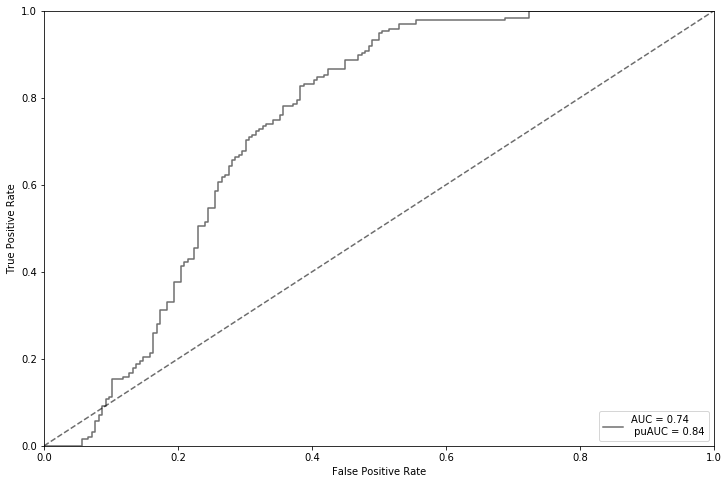

[0.03911857 0.26672059 0.23859191 0.04062149 0.05784134 0.05102506
 0.03678871 0.03894482 0.03864871 0.0278587  0.04281179 0.04693624
 0.07409208]


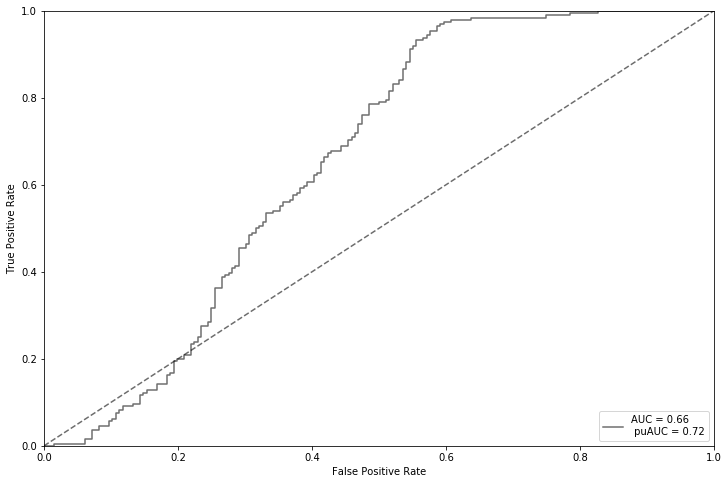

[0.02120735 0.27312093 0.28539836 0.03286466 0.08687656 0.03315525
 0.04108366 0.037624   0.03618395 0.03104817 0.01916525 0.06431058
 0.03796126]


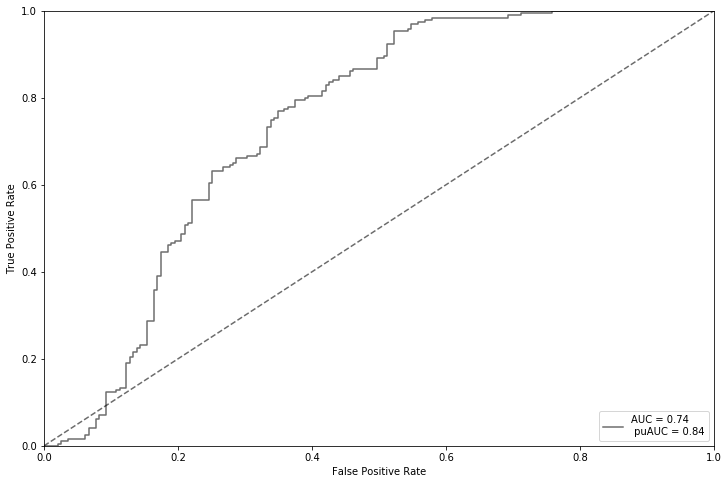

[0.02213086 0.21631189 0.29043933 0.05220822 0.06306111 0.05338247
 0.04650713 0.05598526 0.02689272 0.03119034 0.0361649  0.04776169
 0.05796408]


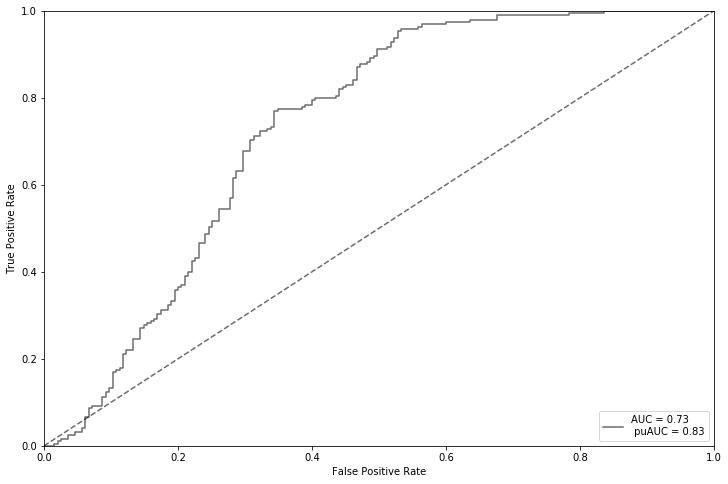

[0.03181346 0.23310487 0.23337014 0.09321958 0.05973604 0.03848506
 0.06082747 0.03193332 0.02686097 0.02215188 0.04671034 0.08210621
 0.03968065]


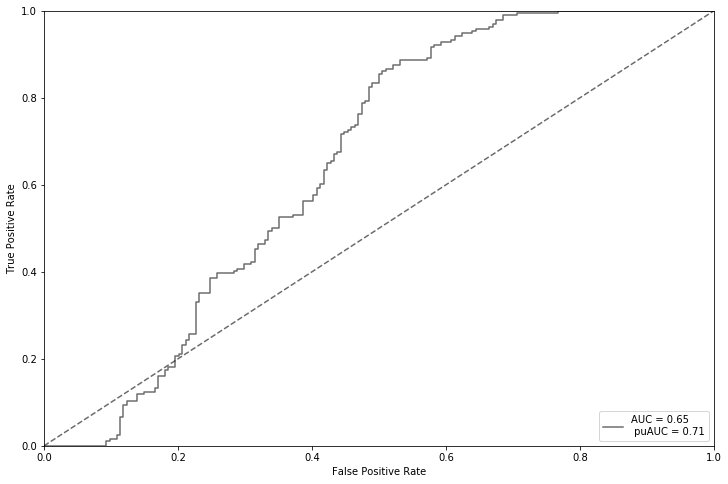

[0.03754313 0.24245298 0.27252331 0.05772095 0.06784693 0.03953219
 0.0303971  0.03435546 0.0334318  0.02653411 0.02240539 0.06477334
 0.07048331]


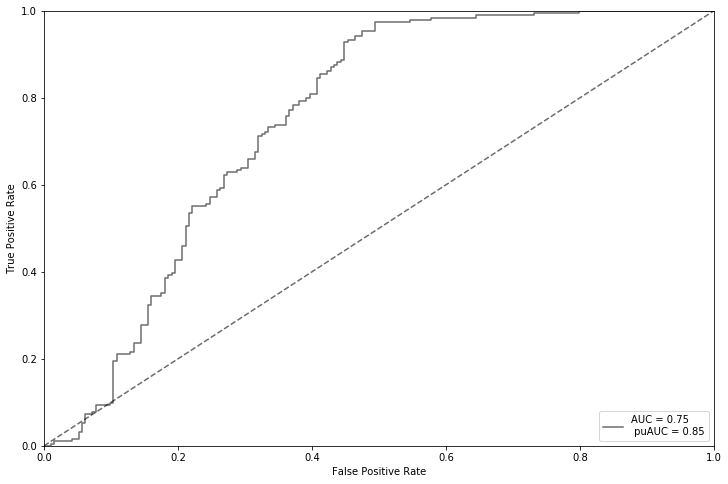

[0.01801149 0.21822166 0.27934072 0.09167351 0.07856985 0.03853223
 0.04559434 0.05132856 0.03118735 0.02159033 0.0255524  0.05162539
 0.04877217]


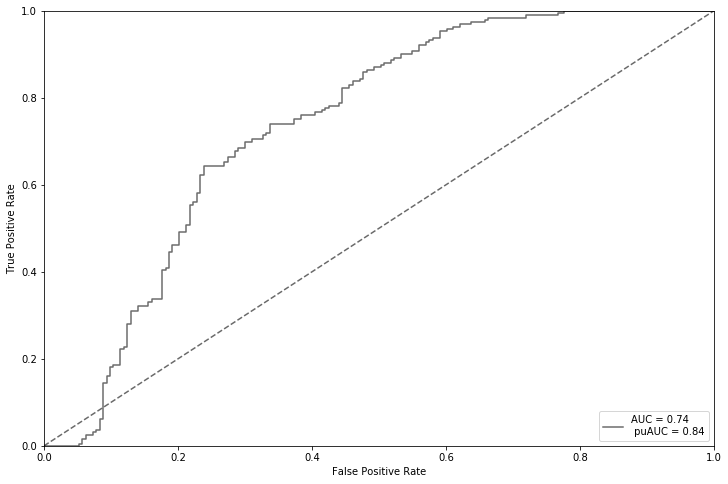

[0.03595121 0.24542829 0.26154417 0.06811615 0.06051548 0.03098529
 0.03375849 0.04706706 0.0510899  0.02354573 0.03013892 0.07305408
 0.03880525]


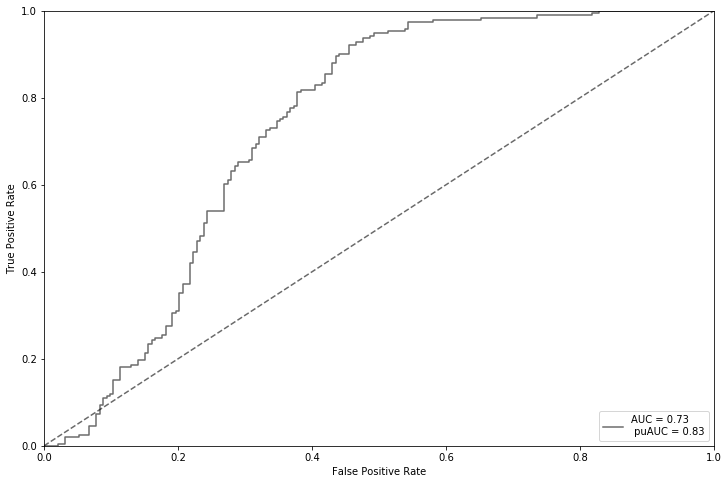

[0.01759431 0.2736798  0.29735215 0.03705184 0.0640357  0.03333665
 0.04016896 0.04745117 0.03474779 0.03492252 0.02365026 0.05474209
 0.04126677]


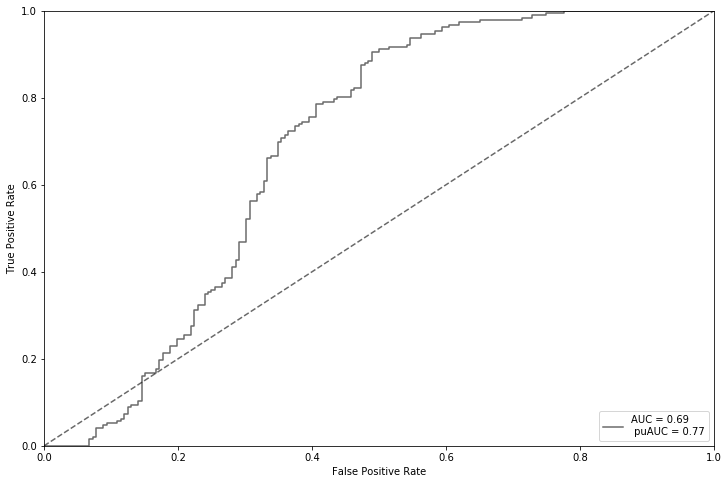

[0.03648493 0.23956079 0.26825983 0.0663947  0.08535146 0.03062678
 0.03454673 0.04302062 0.04386192 0.02474713 0.024808   0.04766786
 0.05466924]


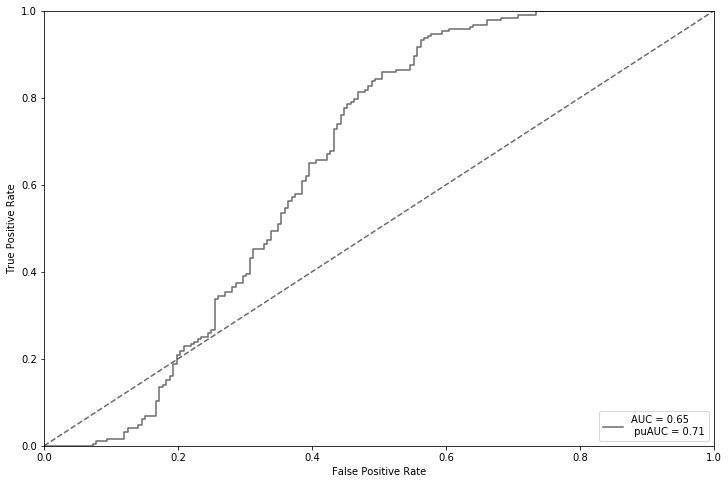

[0.02649866 0.23270437 0.2557345  0.04408271 0.0899421  0.03739498
 0.04274934 0.03714847 0.03032521 0.04371461 0.02799353 0.05431238
 0.07739916]


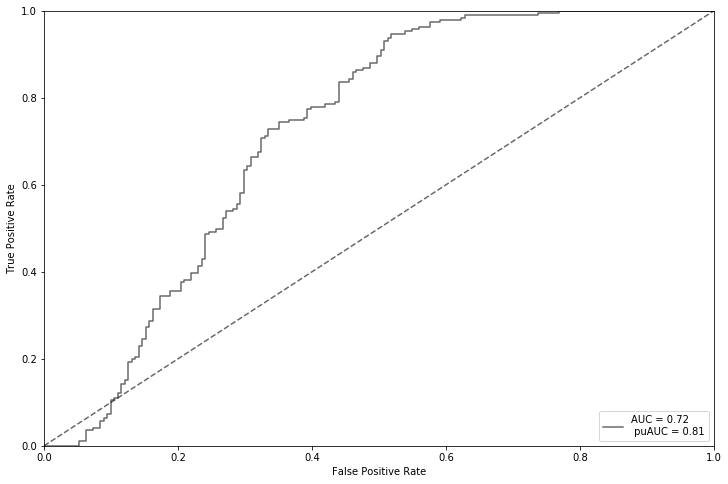

[0.04487738 0.22833782 0.28108928 0.0298461  0.07637757 0.04278992
 0.04459931 0.06772643 0.02436772 0.02904187 0.02025045 0.06557559
 0.04512056]


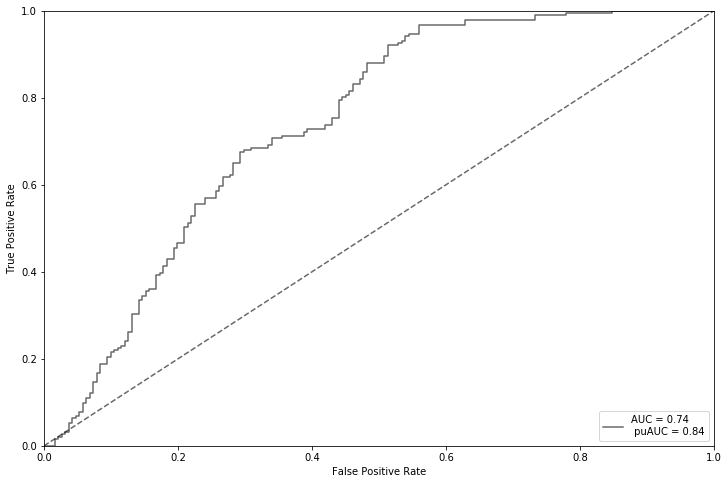

[0.03381409 0.24838366 0.26977872 0.02151673 0.09277033 0.03404439
 0.04937721 0.0397823  0.02966477 0.02938489 0.02994474 0.06211037
 0.05942779]


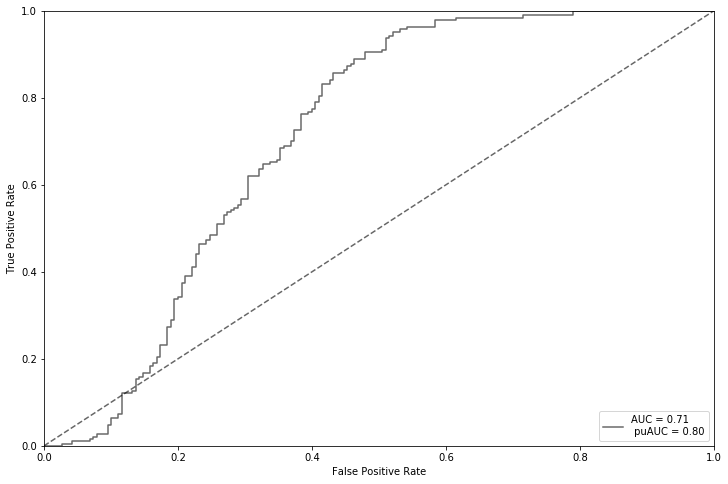

[0.04217779 0.25457438 0.2747341  0.06695555 0.08180953 0.03834908
 0.03561909 0.03813303 0.03124523 0.01953753 0.02581645 0.04426937
 0.04677886]


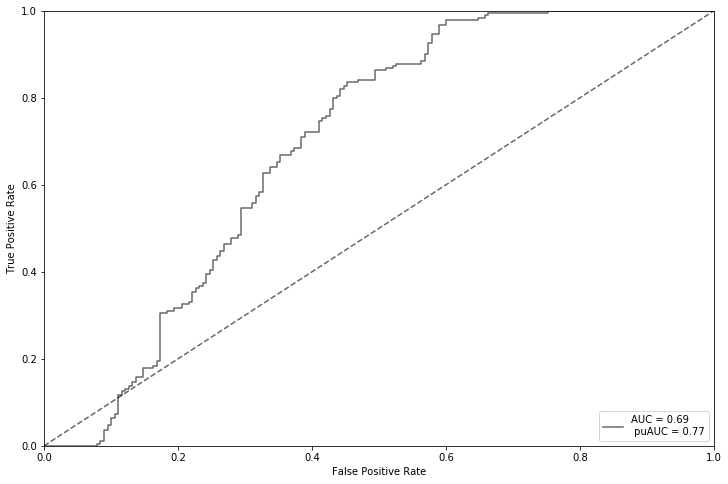

[0.02856079 0.22725705 0.32526837 0.04697474 0.06417829 0.04353039
 0.03348056 0.05316491 0.02528702 0.02319083 0.03309938 0.0650486
 0.03095906]


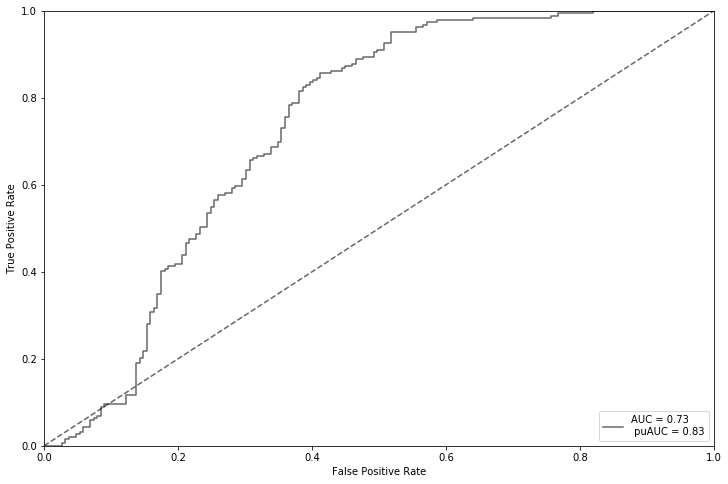

[0.01668946 0.24665927 0.2964897  0.04852606 0.09088385 0.02982131
 0.03082234 0.03707216 0.02694394 0.02083506 0.02664767 0.06527933
 0.06332984]


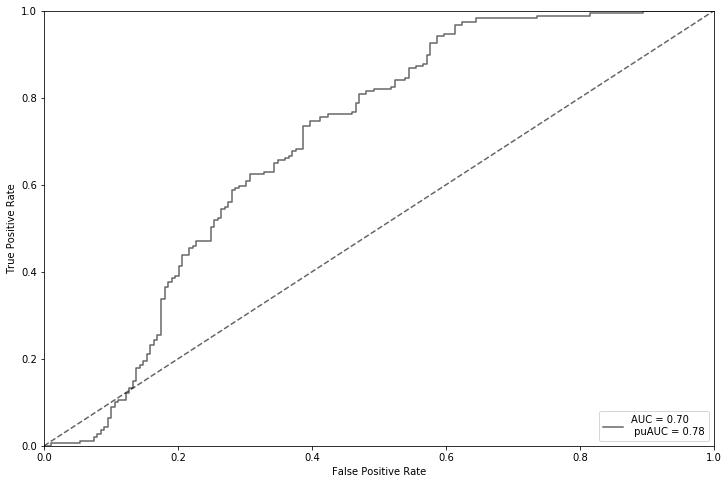

[0.02040728 0.19540365 0.24119137 0.01691508 0.10819622 0.04974311
 0.05083583 0.08215577 0.02556966 0.04001751 0.03830644 0.06655357
 0.06470453]


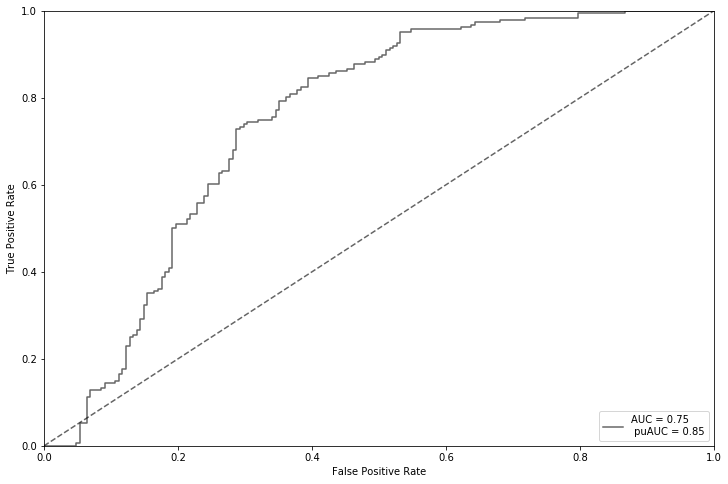

[0.01654594 0.21657776 0.30452284 0.04226037 0.07673372 0.05056789
 0.04781939 0.03442039 0.02728332 0.02983517 0.03471261 0.08409692
 0.03462367]


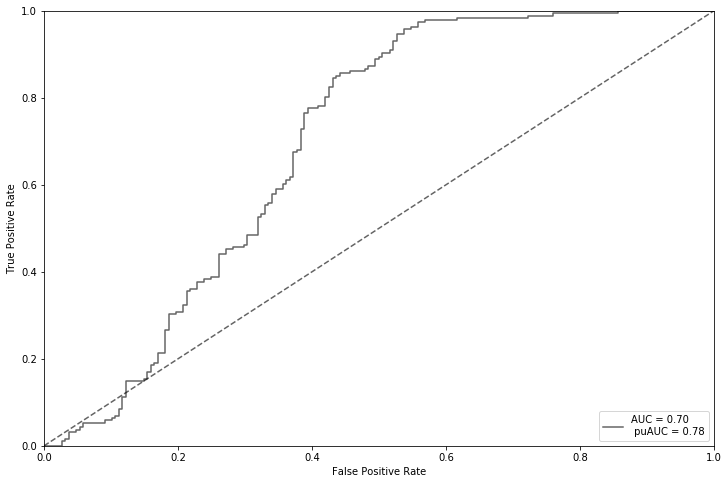

[0.02962759 0.24268954 0.30112538 0.04564042 0.08757441 0.02931612
 0.0347573  0.03786992 0.02587566 0.02394266 0.03240893 0.07030198
 0.03887009]


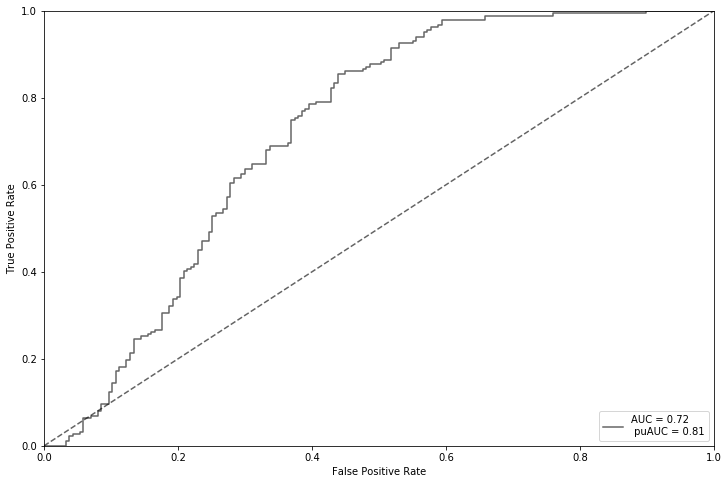

[0.03863456 0.24934138 0.26216659 0.021329   0.08406401 0.06681426
 0.03919628 0.05005437 0.02307553 0.02780292 0.02376456 0.06540637
 0.04835016]


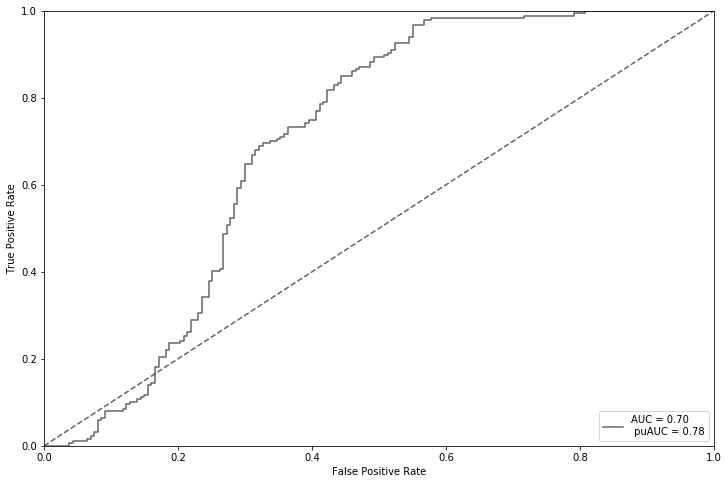

[0.01653607 0.27255329 0.26993668 0.05395727 0.08831717 0.04568099
 0.03305063 0.04057547 0.02974682 0.02233913 0.02107595 0.05049284
 0.05573767]


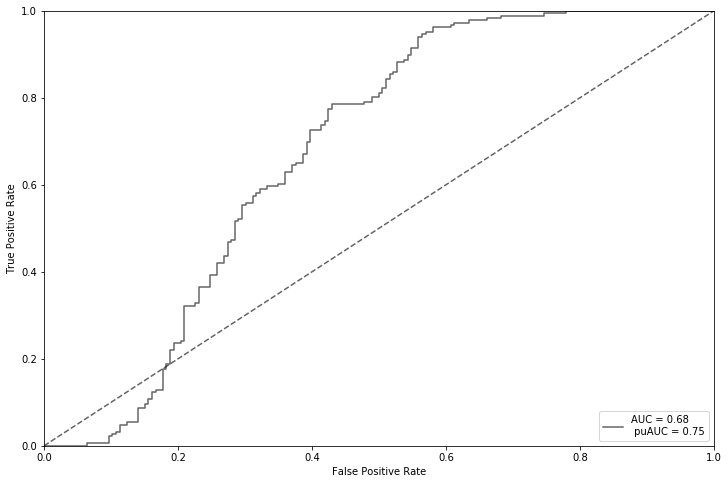

[0.03404431 0.22800379 0.30106936 0.04659511 0.07143626 0.04407111
 0.04903122 0.03788601 0.0286359  0.02508212 0.03839606 0.05392275
 0.041826  ]


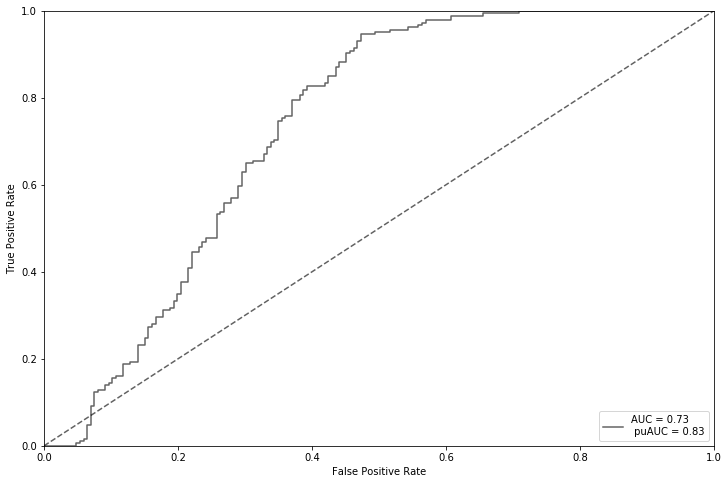

[0.02636811 0.22565275 0.25619174 0.09343782 0.07847272 0.0417657
 0.03065624 0.02968224 0.03632228 0.03488323 0.02413881 0.05631846
 0.06610991]


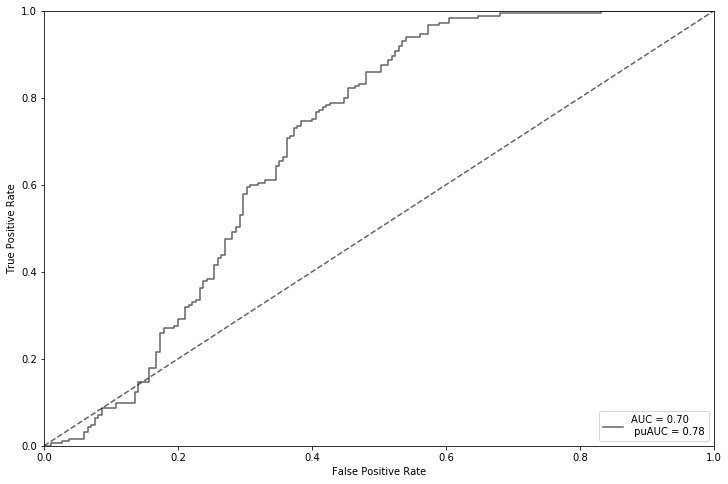

[0.03497383 0.26476    0.29085983 0.06502833 0.05274723 0.04919578
 0.04452593 0.03815843 0.02460915 0.03389707 0.01917568 0.06038273
 0.02168602]


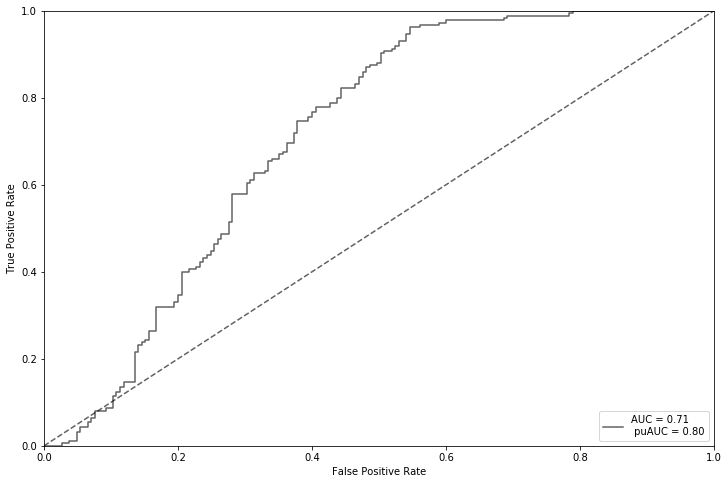

[0.01947859 0.19733118 0.28673534 0.02129214 0.12056155 0.02295188
 0.03889069 0.03781428 0.02960482 0.03531118 0.04308895 0.09063386
 0.05630555]


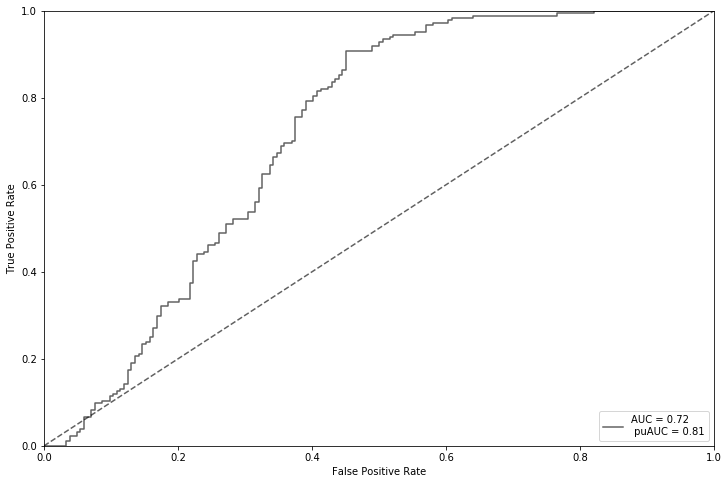

[0.0213214  0.24856104 0.25631013 0.05202835 0.09814619 0.03761661
 0.0505218  0.03126982 0.03260062 0.01894919 0.02247761 0.08758526
 0.04261199]


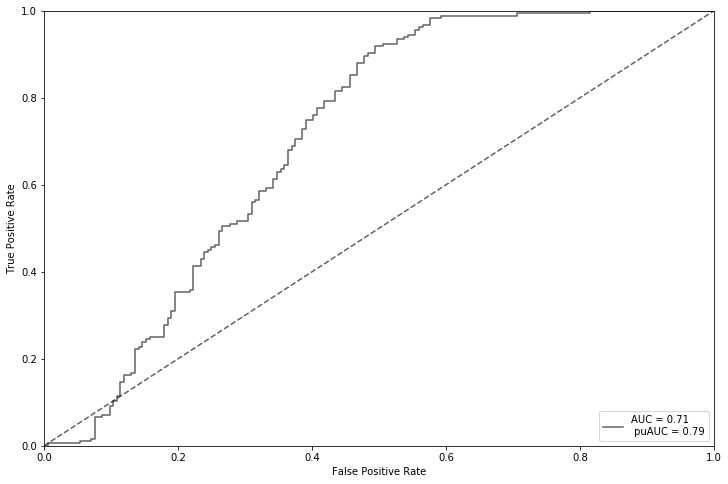

[0.02164995 0.25260138 0.22878891 0.06824722 0.09735123 0.06244583
 0.03971625 0.05075256 0.03148807 0.02337926 0.01395529 0.06299727
 0.04662678]


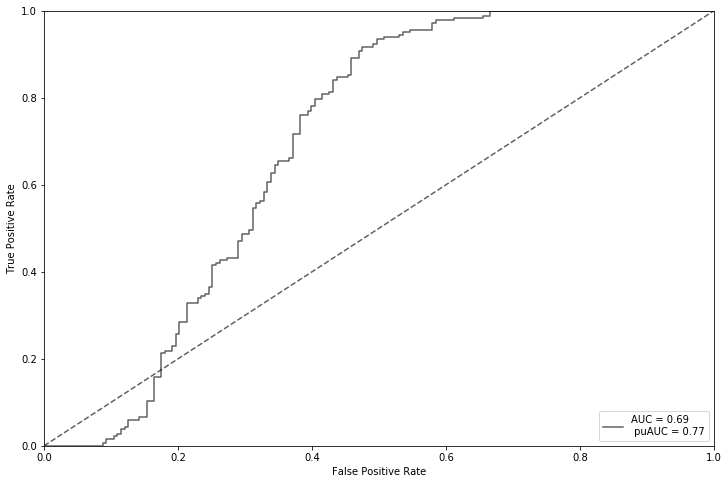

[0.0196497  0.25509318 0.30602057 0.05056463 0.07625481 0.03322387
 0.04038403 0.04977007 0.03636887 0.02470417 0.02743028 0.04845361
 0.03208221]


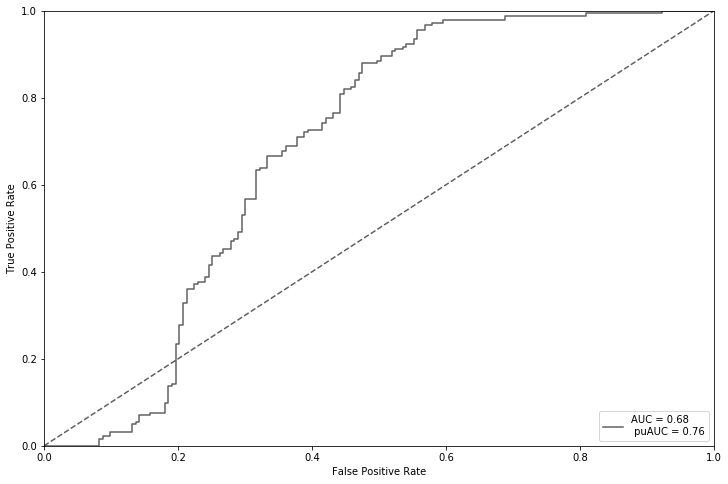

[0.03215547 0.26111283 0.24354127 0.05678407 0.08070137 0.05326761
 0.0387162  0.0427846  0.03637967 0.02683415 0.03144214 0.04658661
 0.04969401]


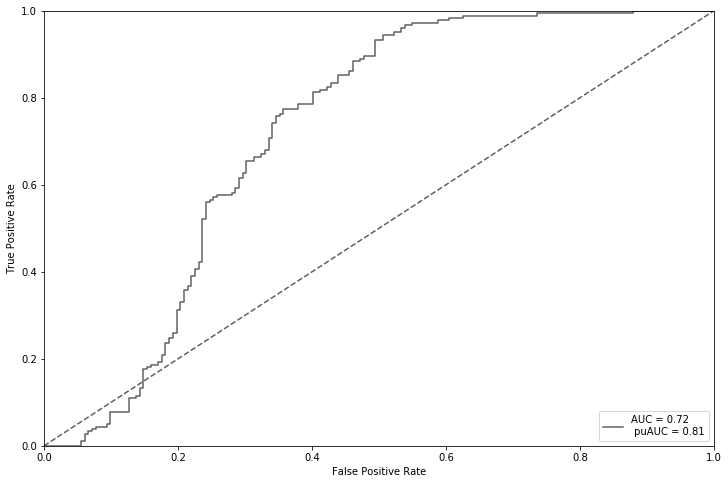

[0.01669161 0.26867869 0.31229052 0.0674807  0.05893117 0.03108877
 0.02659046 0.0445684  0.02309133 0.01954552 0.02998197 0.04431248
 0.05674837]


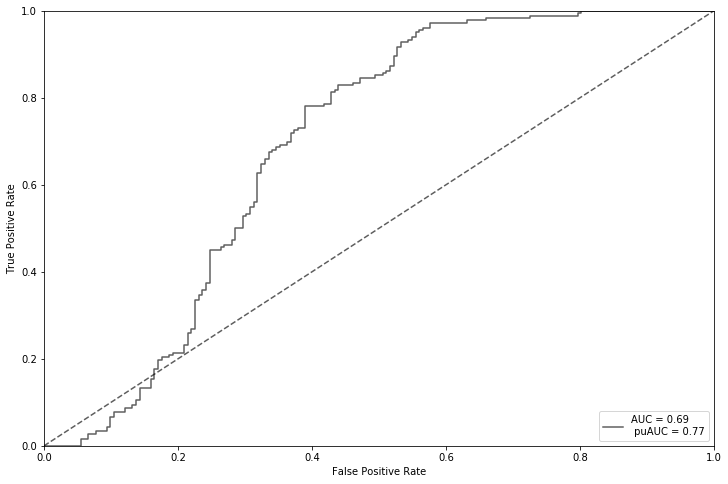

[0.01933725 0.23001773 0.22966654 0.04108126 0.08139227 0.07305951
 0.06443125 0.05731141 0.0270083  0.0252529  0.02280137 0.0947177
 0.03392249]


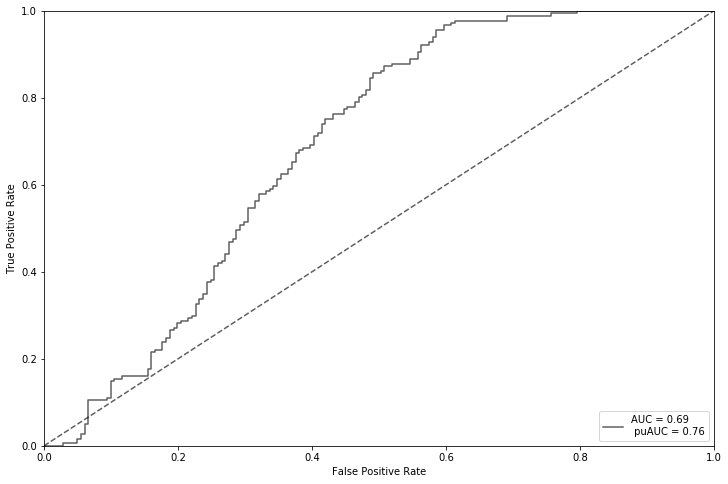

[0.02035183 0.30264571 0.26515237 0.0564687  0.05913588 0.04568418
 0.042344   0.03342176 0.02377748 0.02693387 0.03099383 0.04546711
 0.04762328]


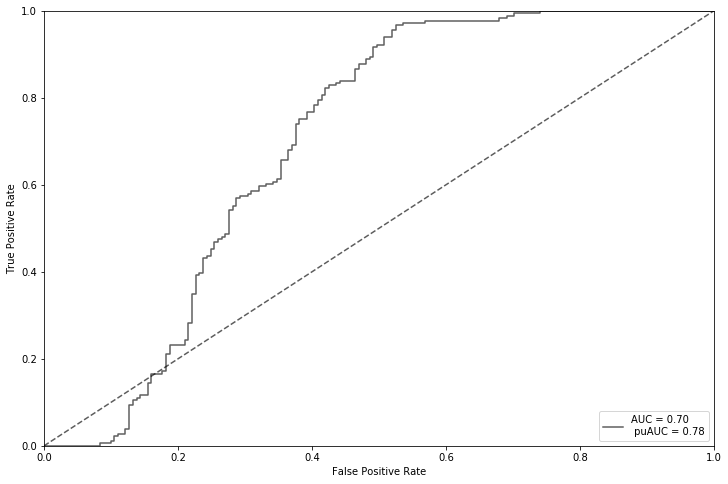

[0.0174411  0.26182308 0.24597781 0.0708053  0.0678479  0.08107809
 0.03920217 0.04010616 0.03898082 0.02186198 0.02040296 0.06255682
 0.0319158 ]


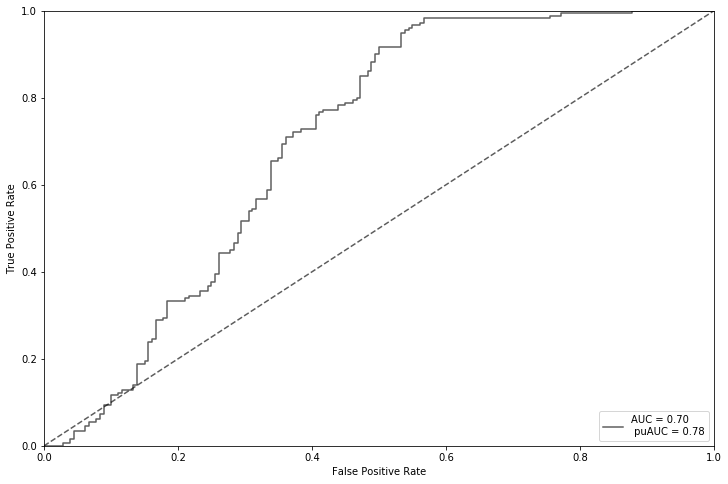

[0.03723137 0.29734178 0.20678486 0.05544954 0.07437991 0.05549288
 0.05640155 0.0343144  0.04072552 0.0273107  0.03178523 0.04152916
 0.04125309]


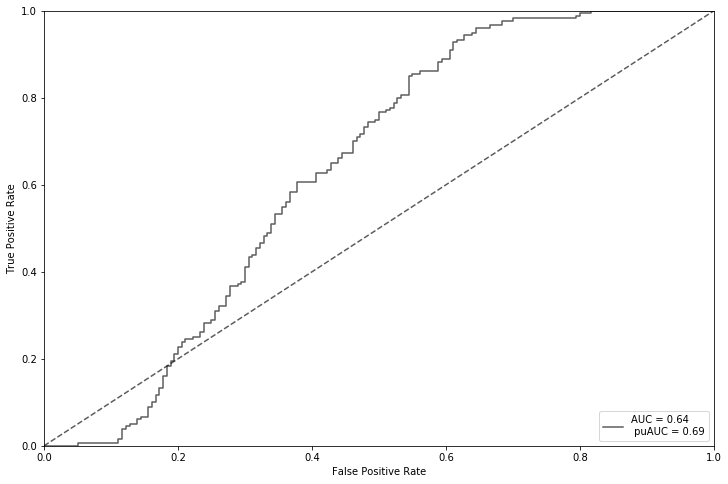

[0.01924238 0.2923481  0.23779815 0.05145022 0.07733618 0.04652862
 0.04011544 0.03159136 0.04052286 0.02385341 0.04517118 0.05390794
 0.04013415]


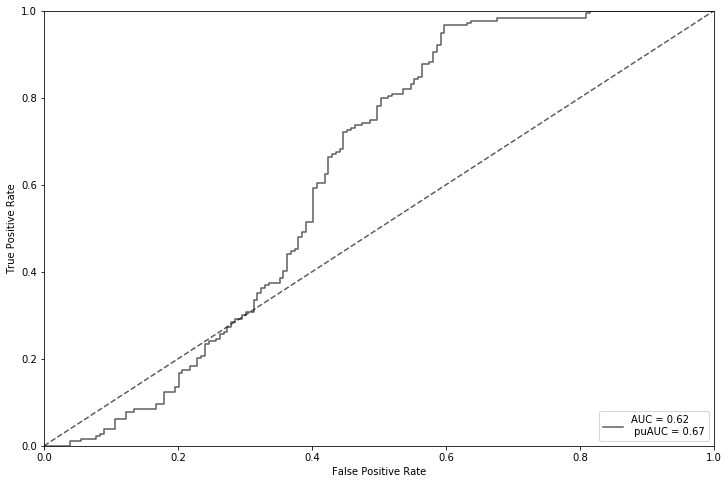

[0.01875646 0.31373009 0.23207308 0.04270681 0.06822157 0.06304135
 0.02971096 0.05758346 0.0286819  0.03061271 0.03123718 0.03955052
 0.0440939 ]


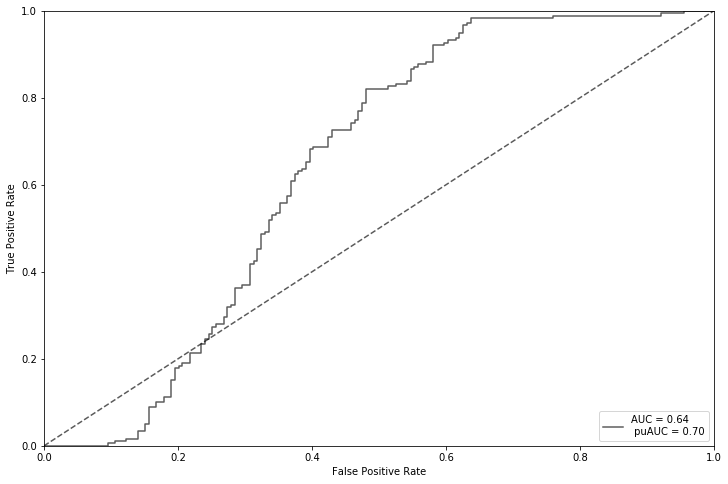

[0.03469086 0.26293496 0.28728718 0.04971789 0.05364186 0.05068597
 0.0284548  0.03672645 0.03031567 0.02470842 0.04262945 0.05081078
 0.04739573]


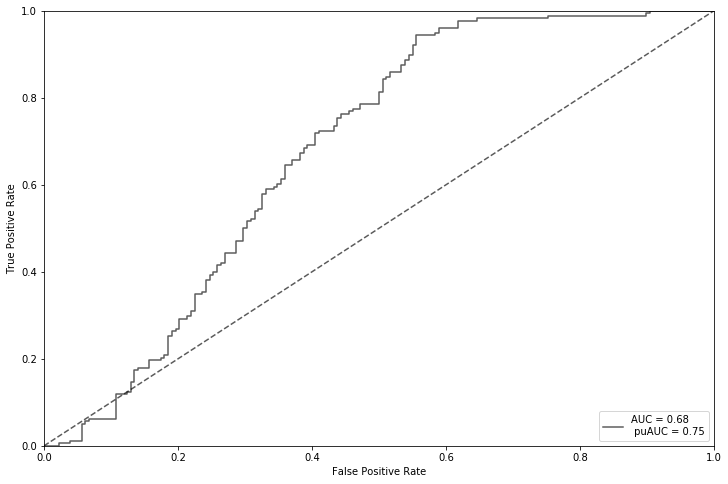

[0.02651901 0.27487332 0.23178118 0.02097903 0.0899167  0.04076662
 0.05932304 0.04774363 0.03344468 0.02852027 0.03666364 0.05854589
 0.05092298]


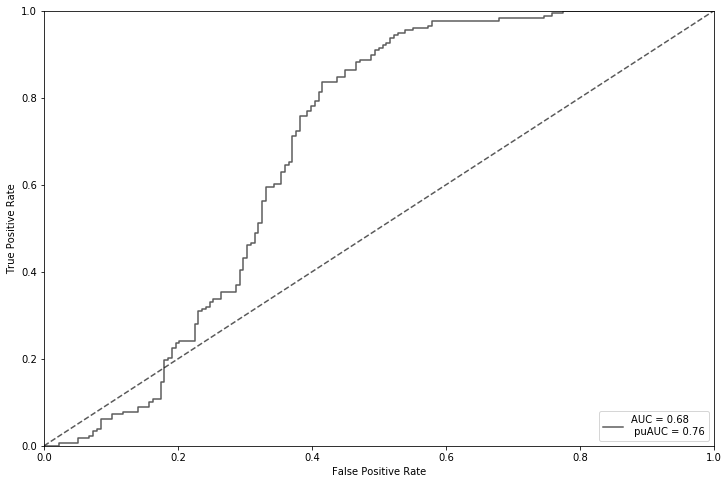

[0.03384643 0.278743   0.23345806 0.01150067 0.08784244 0.0667014
 0.04011303 0.04967844 0.04017437 0.04276346 0.02706078 0.05110734
 0.0370106 ]


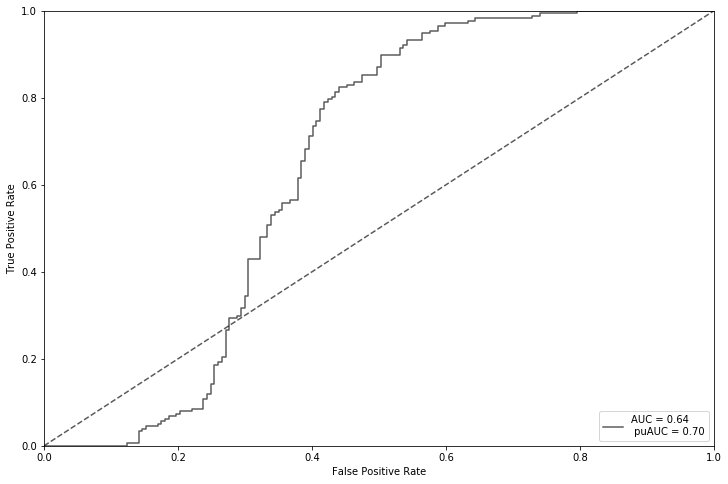

[0.02910043 0.24195684 0.29739471 0.04229256 0.05741906 0.04755931
 0.0649828  0.03856483 0.03136198 0.0345217  0.01911026 0.06172636
 0.03400915]


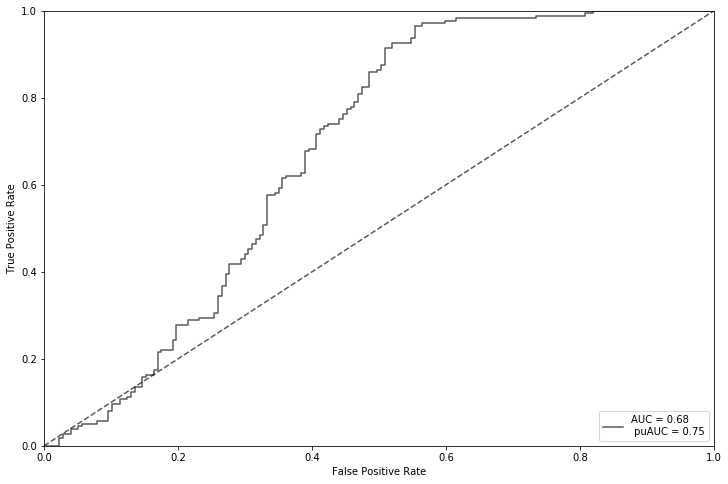

[0.02390998 0.2657482  0.25254975 0.04571853 0.07134206 0.03641045
 0.02608978 0.04079959 0.02701103 0.02781313 0.02910309 0.08722559
 0.06627881]


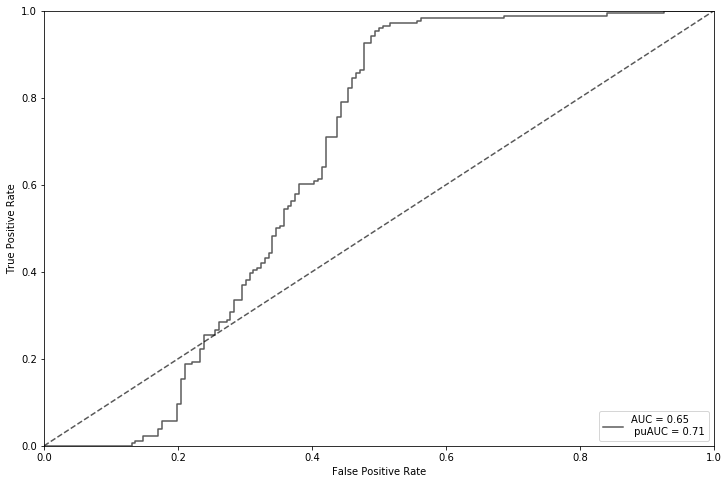

[0.0244746  0.21902807 0.2957278  0.01921086 0.07716386 0.04279215
 0.0387506  0.0716299  0.03824815 0.02769354 0.02152704 0.07219047
 0.05156297]


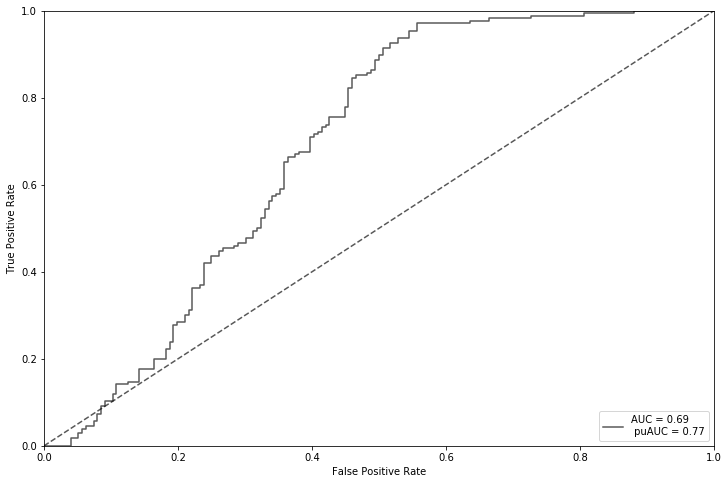

[0.03533584 0.24731323 0.30435193 0.02631736 0.10165518 0.03686868
 0.02895914 0.03256324 0.02916215 0.02146609 0.04157958 0.05111203
 0.04331555]


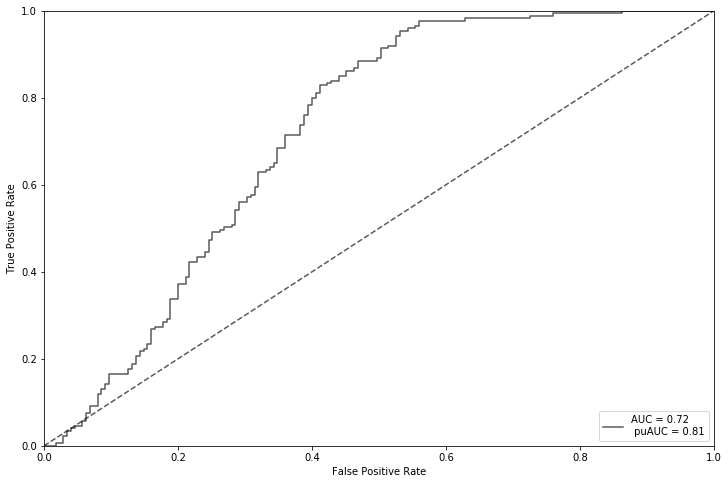

[0.0329547  0.20924426 0.2969989  0.01724132 0.07055416 0.05253475
 0.04218867 0.05500018 0.03597893 0.02840512 0.02331401 0.07353187
 0.06205312]


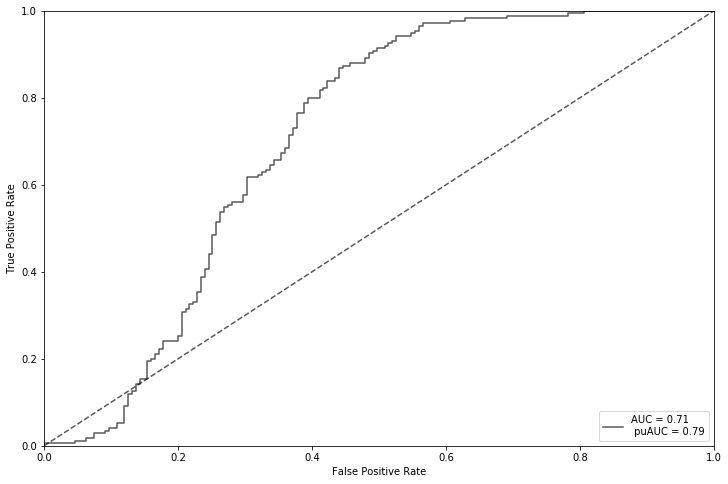

[0.02797036 0.26809073 0.28307136 0.01945109 0.05565335 0.05638106
 0.04367866 0.05018877 0.03262002 0.0399353  0.02673793 0.05194853
 0.04427284]


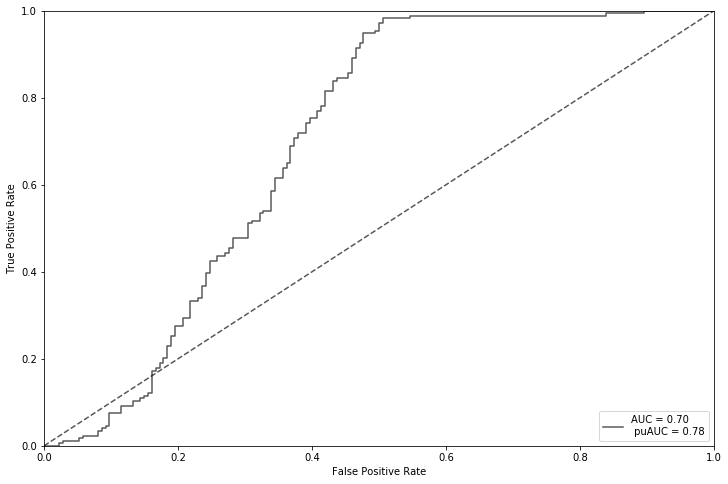

[0.02920683 0.24232924 0.2885429  0.01033316 0.1066703  0.03138825
 0.04658497 0.0456857  0.02858646 0.02977641 0.04568562 0.05864158
 0.03656858]


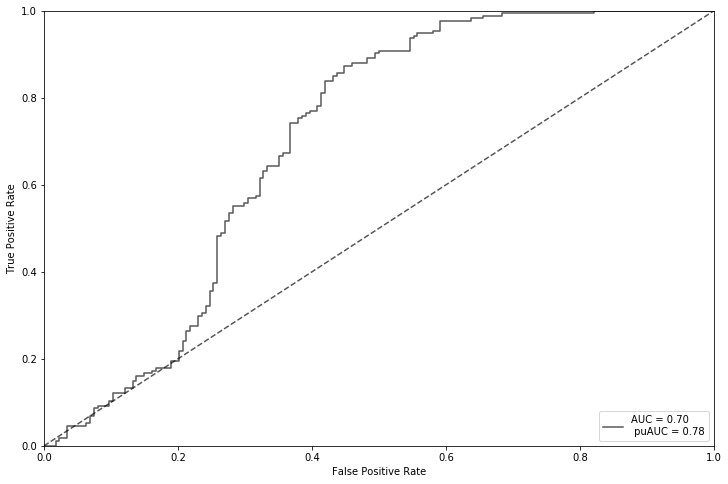

[0.04372775 0.24728403 0.23892017 0.06072922 0.08149611 0.03092796
 0.04835886 0.05849149 0.03240934 0.03011234 0.01695491 0.0712038
 0.03938401]


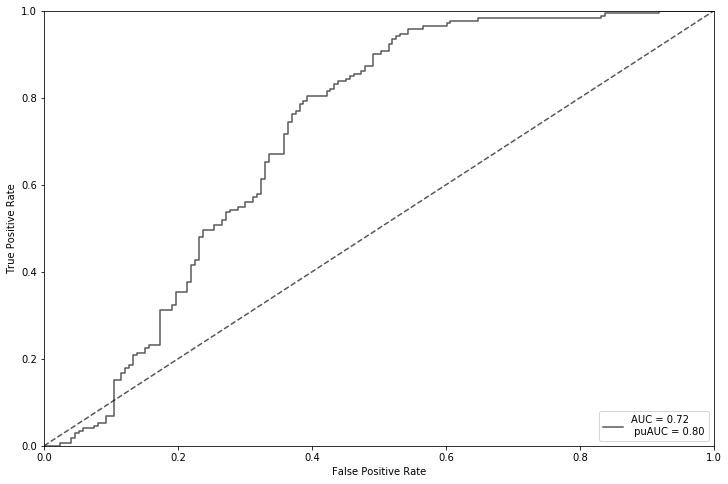

[0.02161613 0.24900726 0.26927196 0.07706091 0.0564957  0.06585692
 0.04397525 0.03258252 0.03004413 0.03748133 0.03136183 0.04750573
 0.03774032]


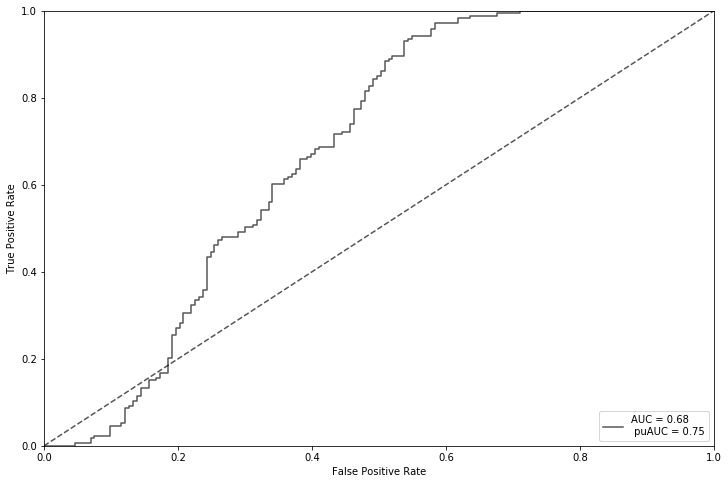

[0.02686526 0.24835518 0.27847386 0.05564716 0.08375469 0.0293762
 0.04813073 0.0488093  0.02671734 0.02165941 0.02361354 0.05490473
 0.05369261]


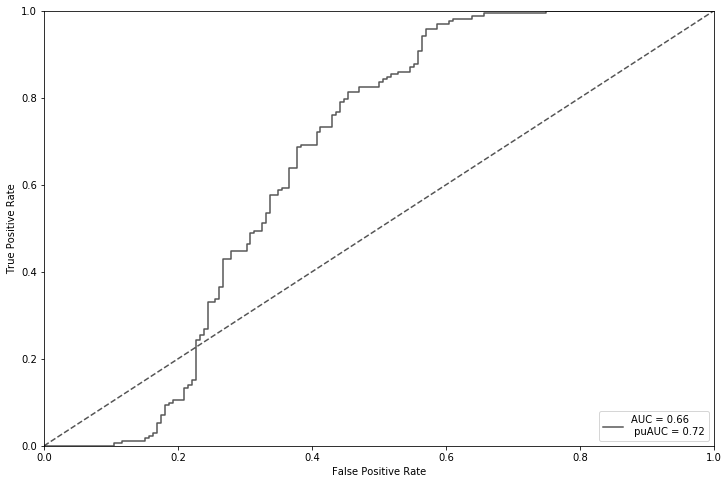

[0.016238   0.20981682 0.31985809 0.04427646 0.08264099 0.03715255
 0.04529619 0.04743493 0.02974309 0.03087237 0.04911055 0.04196928
 0.04559068]


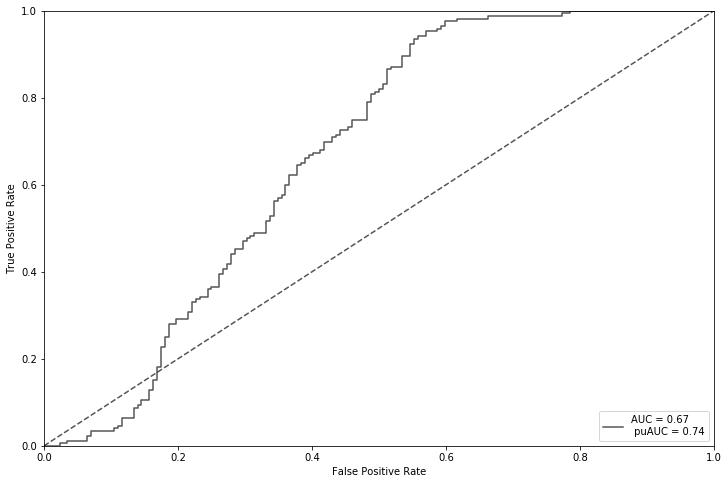

[0.0345096  0.26142625 0.31737066 0.06240818 0.06613661 0.03787503
 0.04130058 0.02889764 0.02033994 0.02250748 0.02321965 0.04701146
 0.03699694]


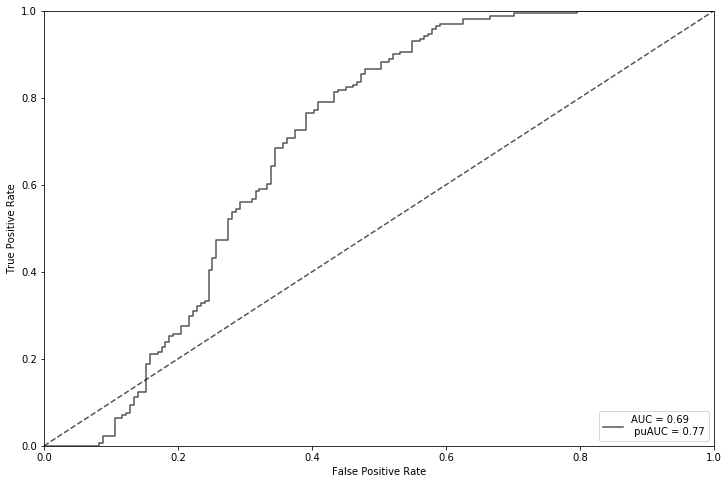

[0.04493314 0.23757124 0.28294338 0.02799878 0.11171005 0.03140331
 0.04450485 0.04095882 0.02715413 0.03454476 0.02730708 0.03429525
 0.05467521]


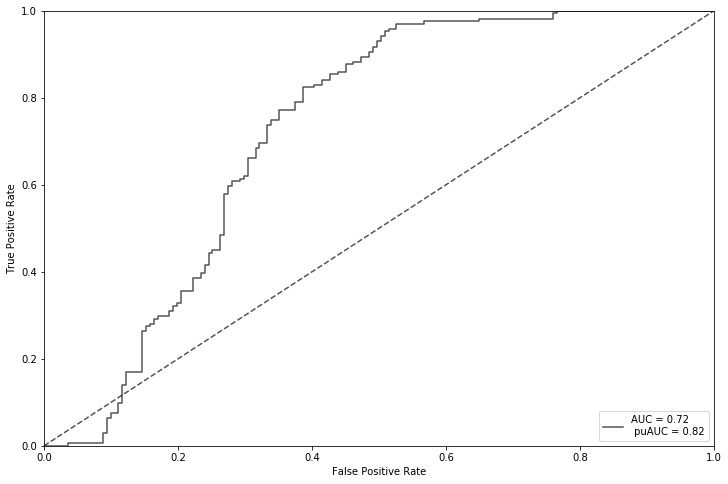

[0.03289369 0.26867923 0.28454921 0.02998073 0.08598013 0.04032013
 0.0446462  0.04006359 0.03212558 0.03345312 0.03099253 0.05118107
 0.0251348 ]


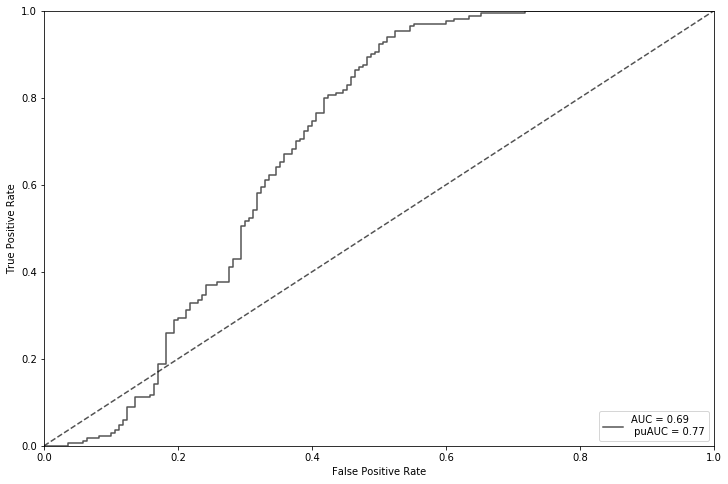

[0.02468535 0.25045958 0.29829081 0.0541307  0.05662277 0.03682386
 0.02927911 0.0398655  0.03026238 0.03358497 0.03616608 0.04441253
 0.06541635]


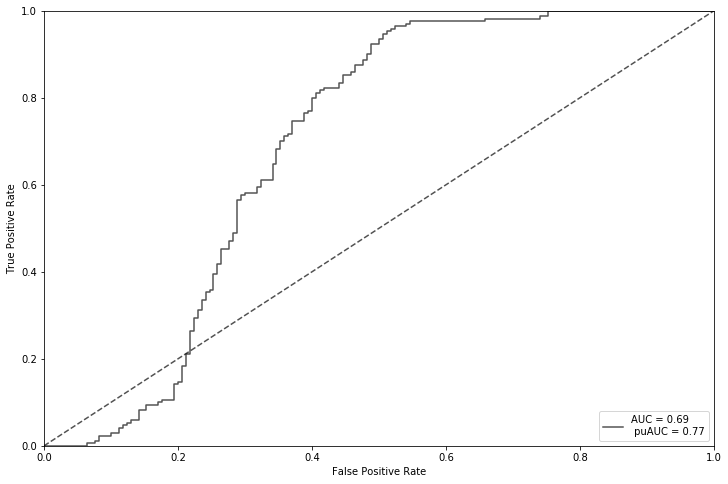

[0.03304847 0.22843005 0.31532512 0.04065017 0.05905663 0.02537543
 0.03467366 0.03942153 0.03440478 0.02954696 0.0345473  0.0644993
 0.0610206 ]


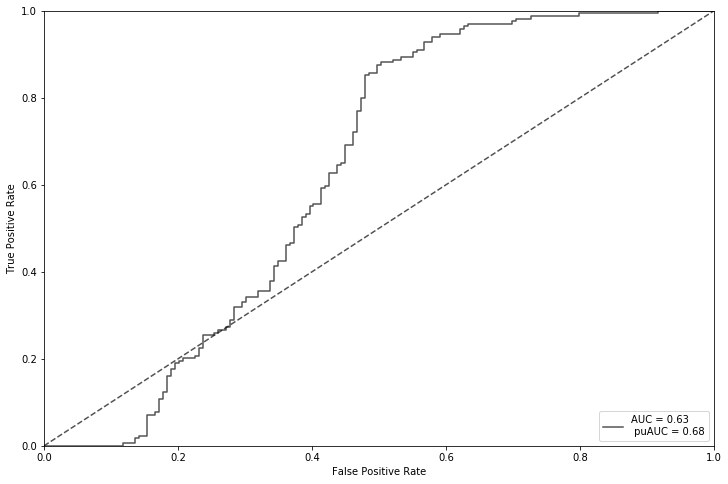

[0.03154991 0.25549439 0.31549028 0.05804701 0.05279041 0.03220125
 0.04327543 0.04383474 0.03543063 0.02485525 0.02127356 0.04563412
 0.04012301]


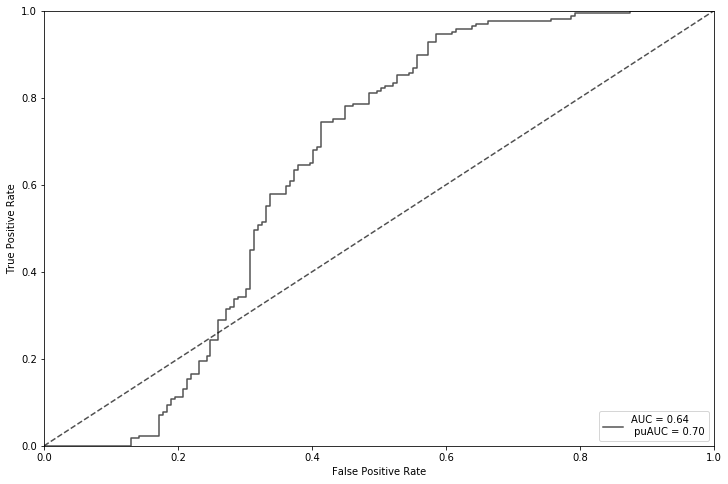

[0.03762445 0.30367268 0.24081516 0.02835014 0.05782505 0.02912129
 0.03900294 0.04621212 0.04260287 0.02640494 0.03774384 0.05603575
 0.05458877]


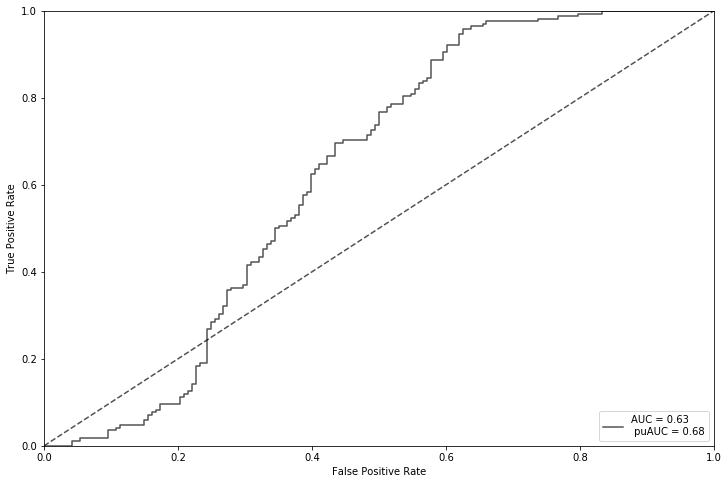

[0.04337595 0.20821764 0.23286293 0.10923586 0.07864683 0.03417622
 0.04937534 0.05391027 0.03906174 0.02868286 0.02413502 0.04401161
 0.05430774]


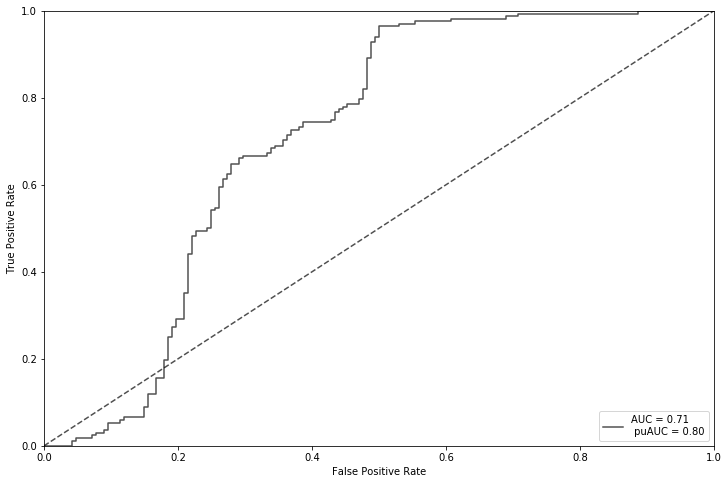

[0.04711556 0.28998699 0.21711624 0.03191518 0.069888   0.06554963
 0.03365382 0.04380692 0.0337112  0.03948044 0.02209848 0.04764526
 0.05803228]


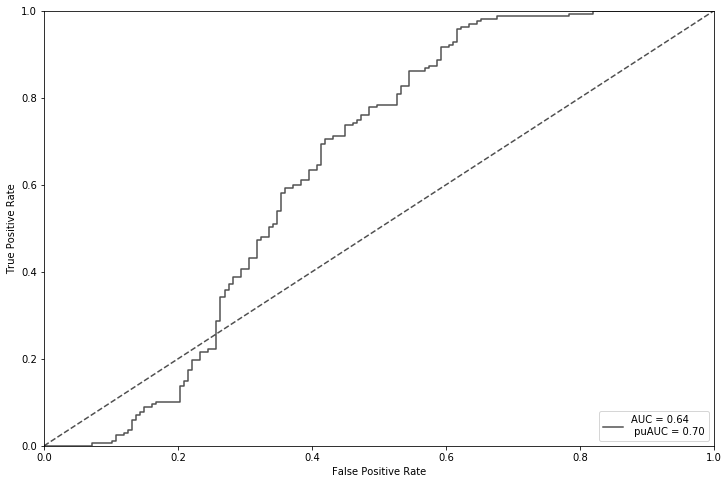

[0.01994432 0.2834459  0.23424248 0.04455969 0.07655518 0.04441387
 0.04508641 0.04845387 0.03256185 0.02637783 0.02563046 0.04971603
 0.06901213]


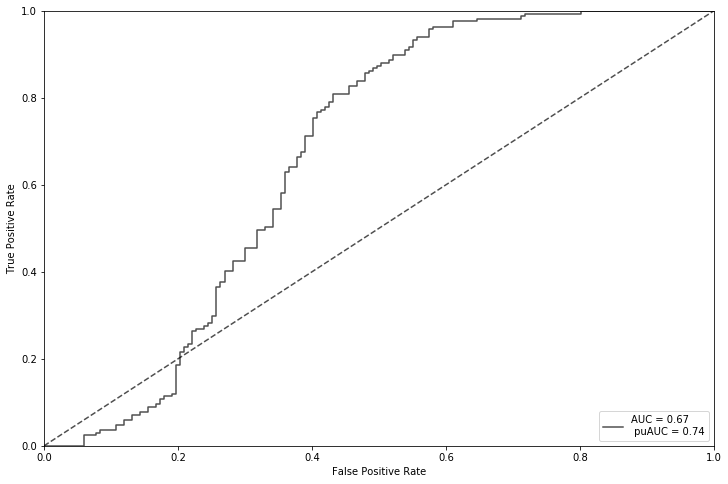

[0.02715006 0.2050064  0.2490734  0.04604329 0.10298186 0.06305814
 0.04100252 0.04836685 0.03486049 0.02805498 0.03611008 0.072764
 0.04552792]


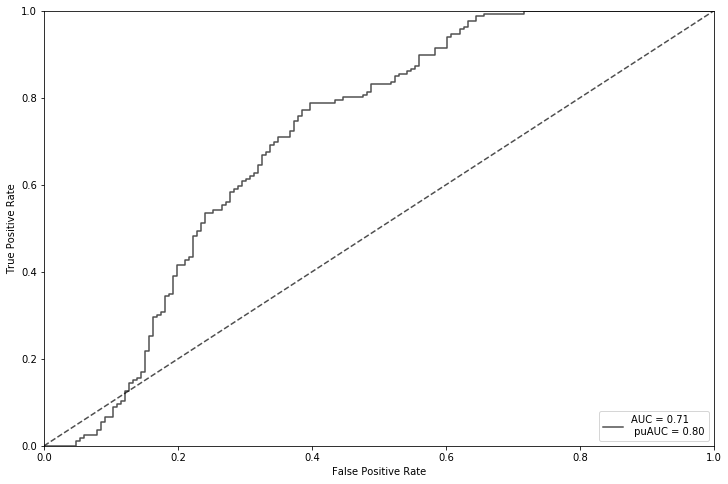

[0.0423313  0.27411612 0.24899332 0.03556268 0.09713651 0.0399394
 0.04200998 0.03912853 0.02530448 0.03143511 0.03586586 0.04626471
 0.041912  ]


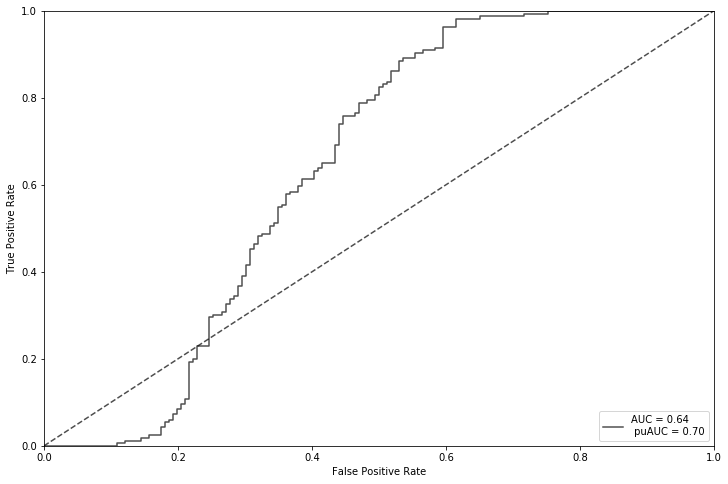

[0.01822701 0.21287654 0.27359454 0.06423943 0.08959559 0.05399181
 0.03436384 0.04662796 0.03720017 0.03195579 0.02130344 0.05420884
 0.06181504]


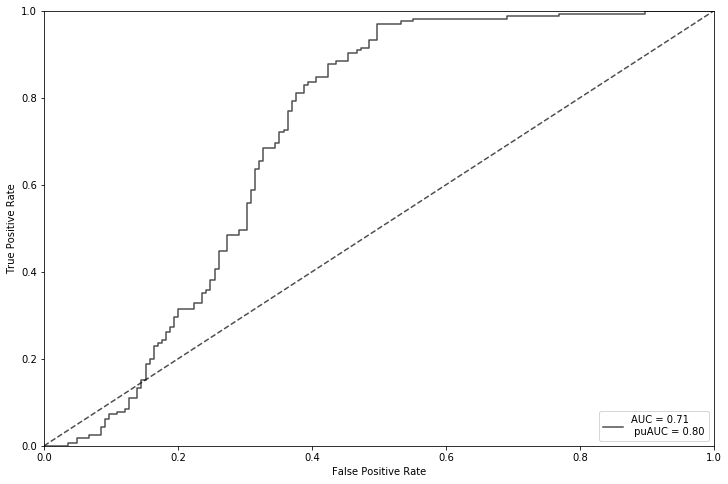

[0.02901608 0.29012891 0.26980356 0.03373973 0.06882635 0.04195456
 0.03296089 0.03849978 0.03079251 0.02521202 0.03752682 0.0436594
 0.05787941]


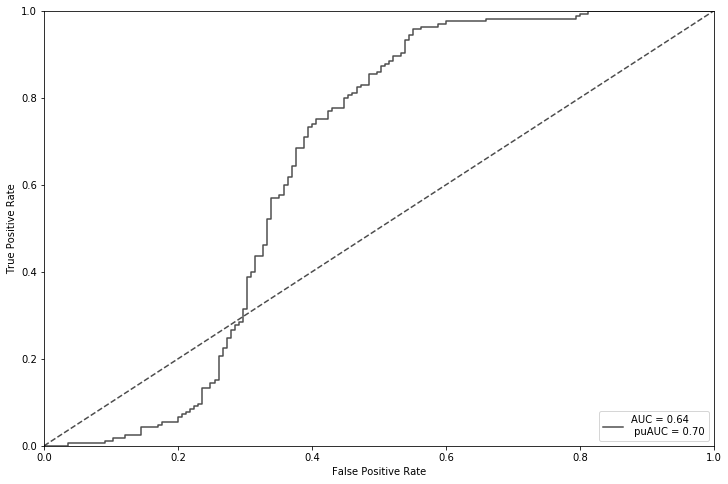

[0.02161637 0.2605136  0.24417175 0.08129383 0.07273909 0.06681298
 0.03303912 0.04200283 0.03573479 0.0219157  0.02334251 0.05273174
 0.04408566]


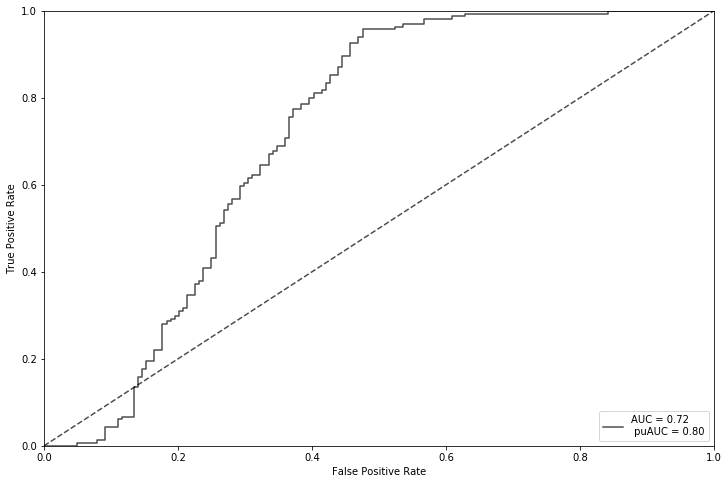

[0.02770503 0.30439443 0.23123102 0.06754503 0.065073   0.04362626
 0.03748754 0.04623843 0.0287853  0.03548805 0.02683095 0.05161392
 0.03398105]


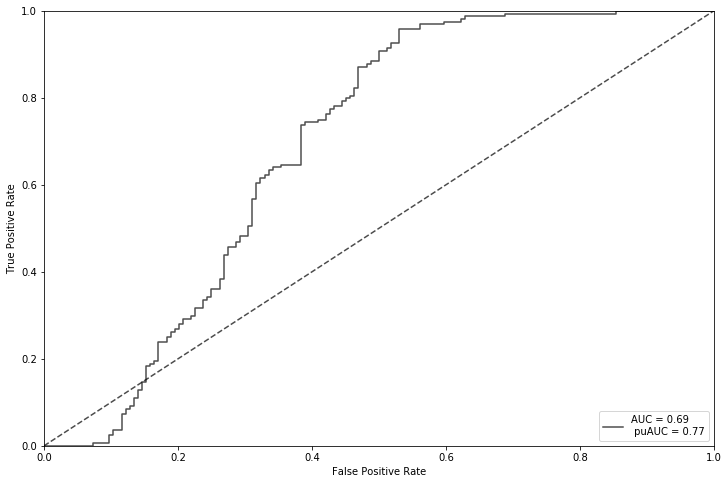

[0.02725505 0.23663896 0.27120325 0.0573987  0.0903075  0.05197454
 0.03532463 0.03003269 0.02645774 0.03195496 0.05004584 0.05900085
 0.0324053 ]


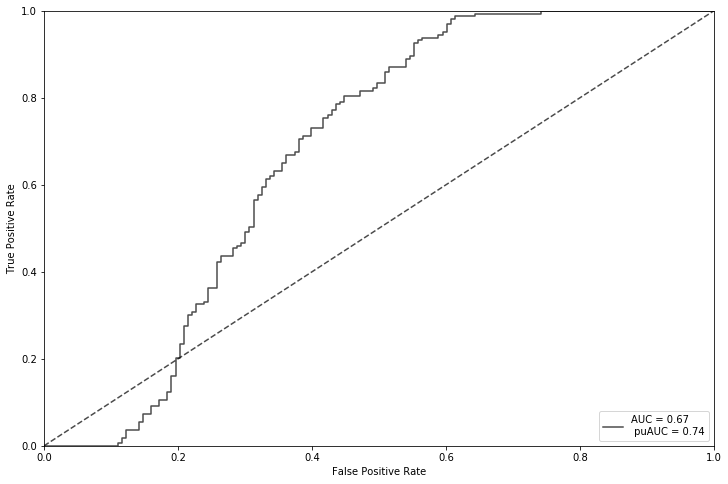

[0.02230779 0.24360485 0.3143597  0.02623485 0.07339637 0.04653352
 0.03880723 0.03157026 0.04531039 0.02751315 0.0298734  0.06498512
 0.03550337]


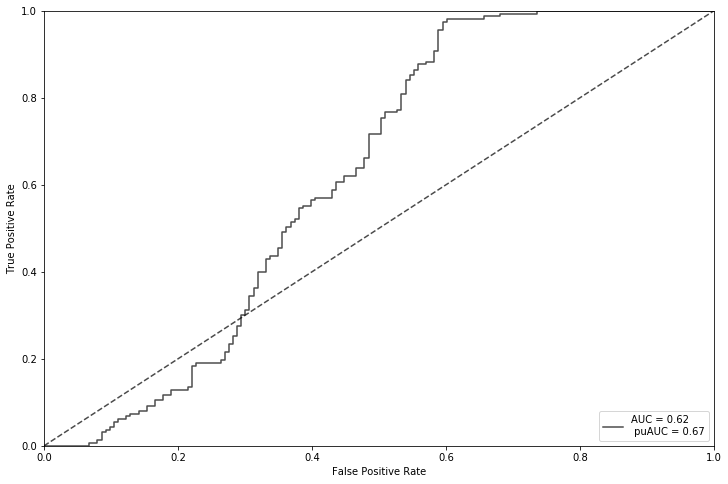

[0.03272661 0.26559684 0.2399539  0.04718574 0.0547748  0.06238839
 0.03741018 0.0392938  0.0307424  0.02479657 0.02204827 0.08093073
 0.06215177]


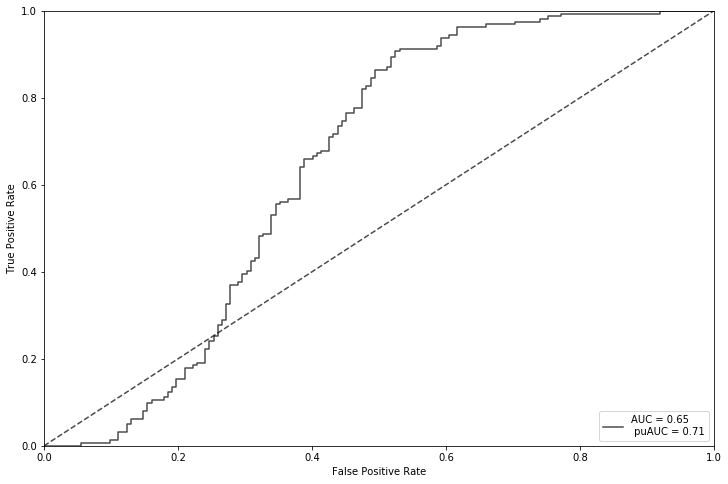

[0.01732189 0.25478354 0.29788731 0.0632811  0.07112919 0.03304831
 0.02507122 0.06347337 0.0339207  0.02984618 0.01446534 0.05296866
 0.04280319]


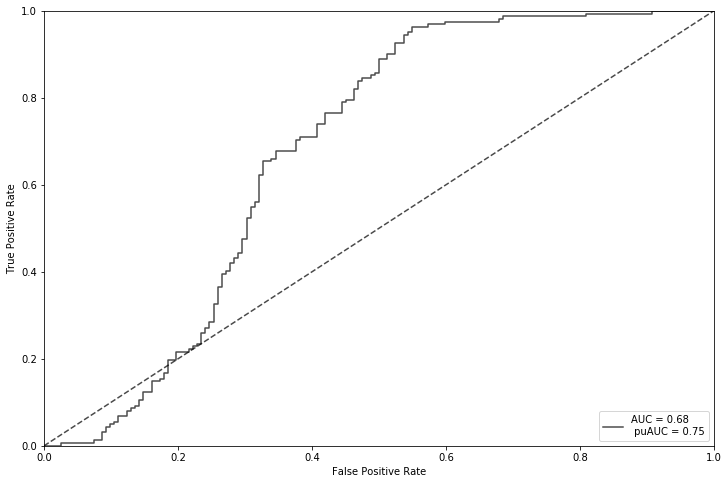

[0.02674516 0.26383284 0.19819398 0.03861074 0.11538446 0.04119561
 0.048444   0.05498739 0.04104912 0.04277323 0.03425548 0.04854026
 0.04598774]


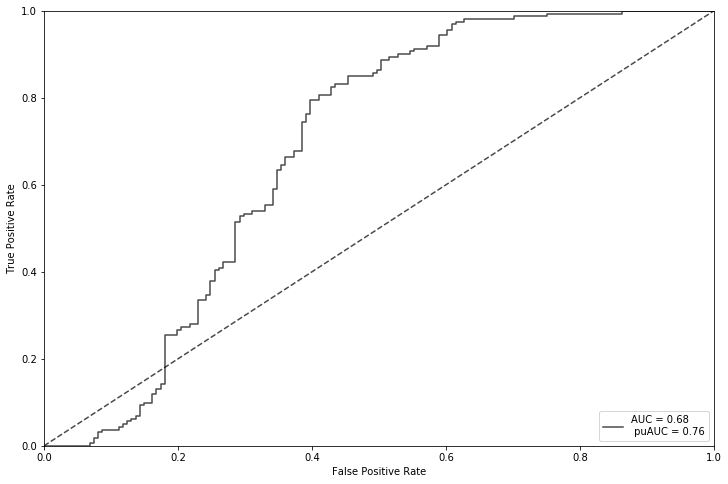

[0.04300559 0.22726983 0.25946727 0.07259412 0.04313218 0.03308341
 0.03924568 0.04476668 0.02938595 0.02752213 0.06851105 0.06892509
 0.04309103]


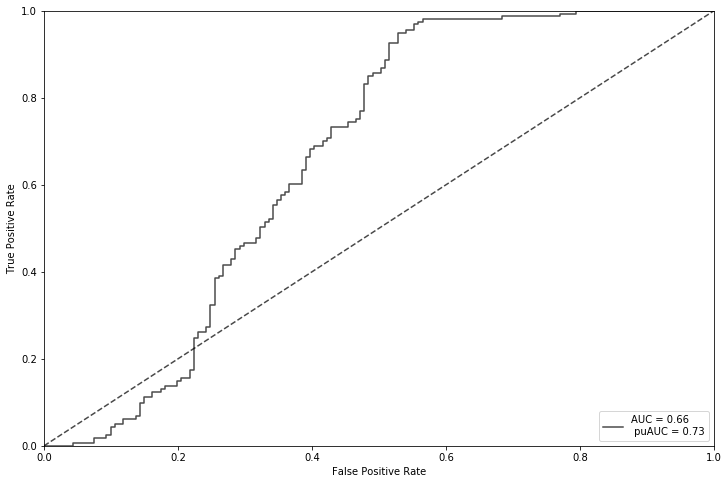

[0.02378185 0.20655868 0.26311325 0.07162874 0.07209316 0.04580331
 0.0498545  0.06616572 0.02903901 0.0263706  0.02813142 0.05575437
 0.06170539]


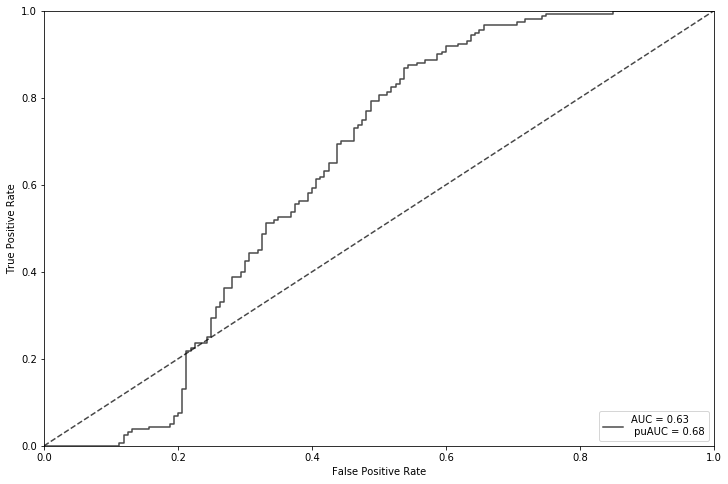

[0.05694297 0.19402341 0.30759297 0.04814271 0.0778217  0.05215869
 0.0544212  0.03552786 0.03234472 0.03471611 0.02774523 0.04275486
 0.03580756]


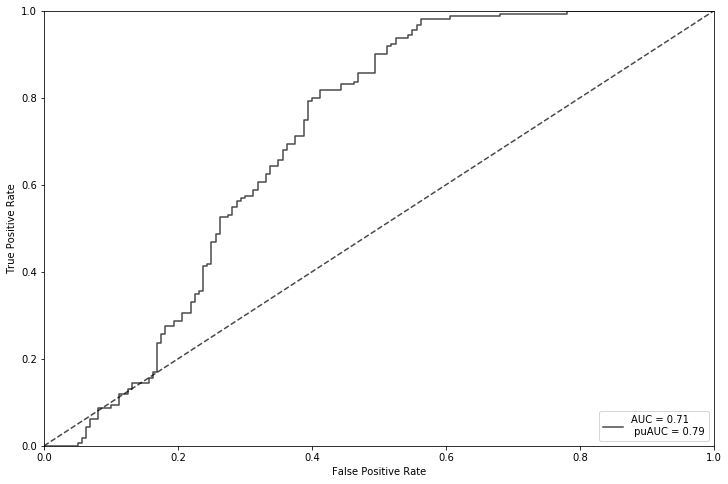

[0.04403087 0.24446817 0.24324238 0.05869874 0.07475877 0.03585592
 0.04043541 0.05654637 0.03137233 0.02549041 0.0481636  0.06050238
 0.03643465]


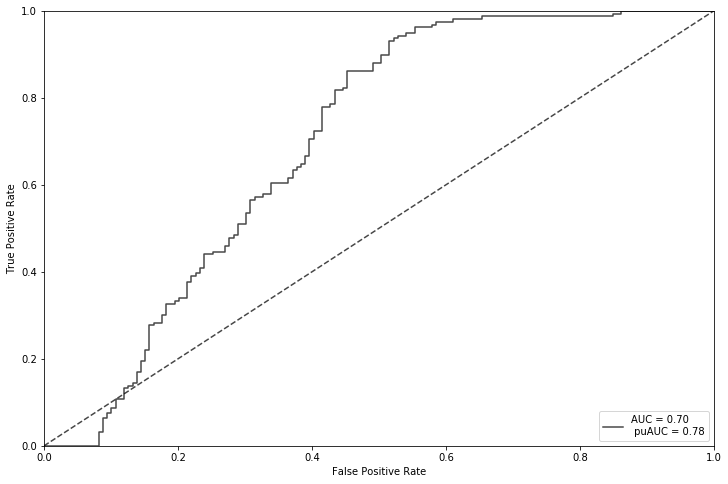

[0.03517546 0.25141228 0.22499579 0.07404553 0.07781487 0.05884663
 0.04260652 0.05949756 0.03202215 0.02460419 0.02692561 0.04561719
 0.04643623]


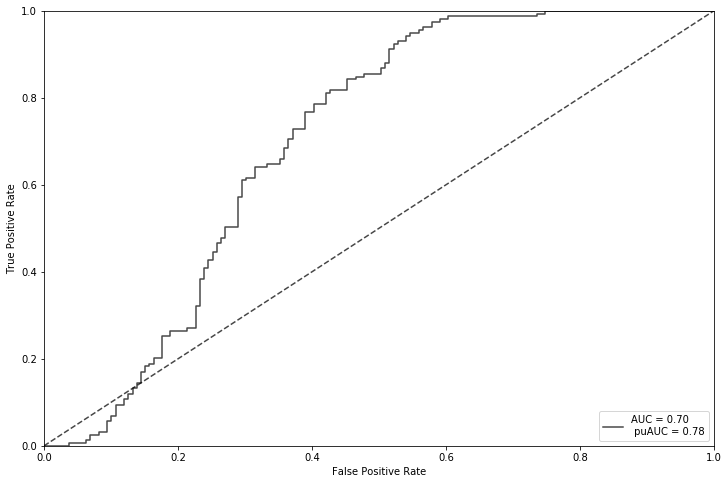

[0.02835106 0.2137731  0.2776817  0.06782864 0.07717624 0.02693025
 0.06471716 0.04712584 0.02327009 0.03090593 0.04279986 0.04310977
 0.05633037]


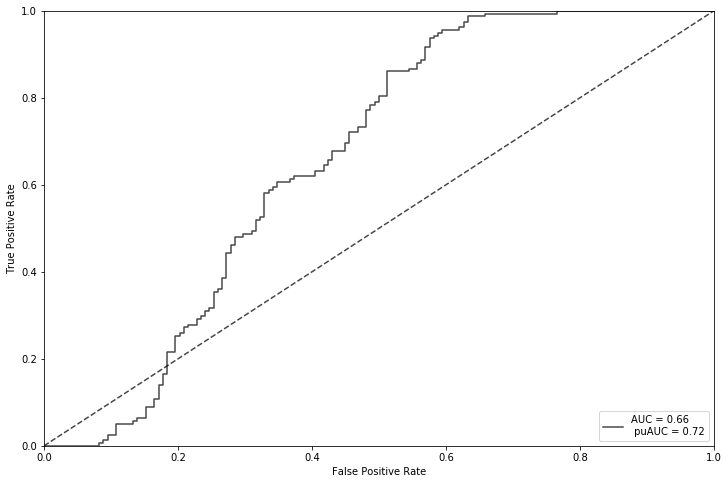

[0.02571413 0.2157187  0.30865183 0.05682566 0.06373339 0.04313307
 0.05789441 0.0511782  0.03029989 0.02460583 0.03351882 0.04252327
 0.04620279]


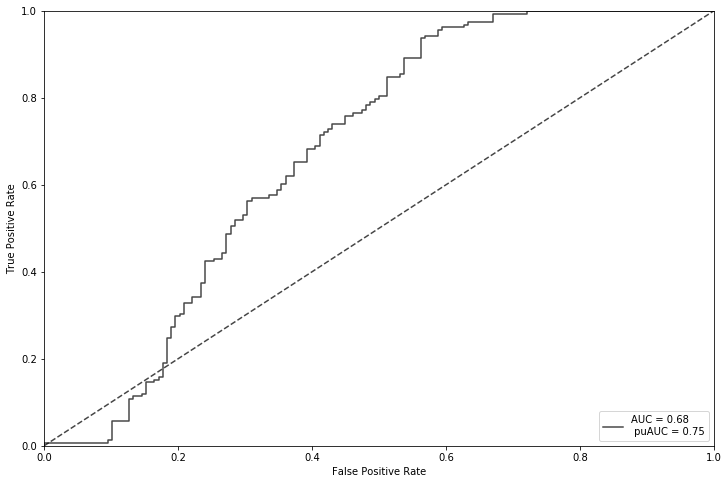

[0.04152467 0.20505939 0.20857635 0.03609058 0.09315488 0.05122851
 0.06654311 0.06230793 0.0330292  0.03132398 0.02470507 0.03992022
 0.10653609]


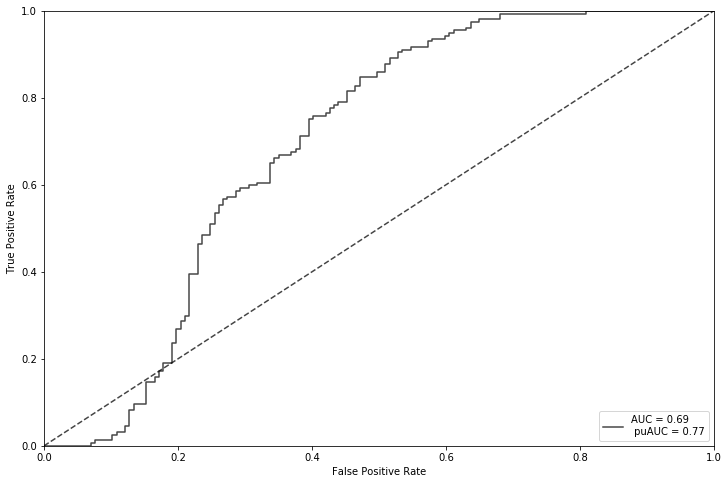

[0.02364717 0.26581432 0.25568964 0.05140949 0.0969264  0.03237907
 0.03568962 0.04448478 0.03672877 0.02693759 0.03115981 0.05922054
 0.0399128 ]


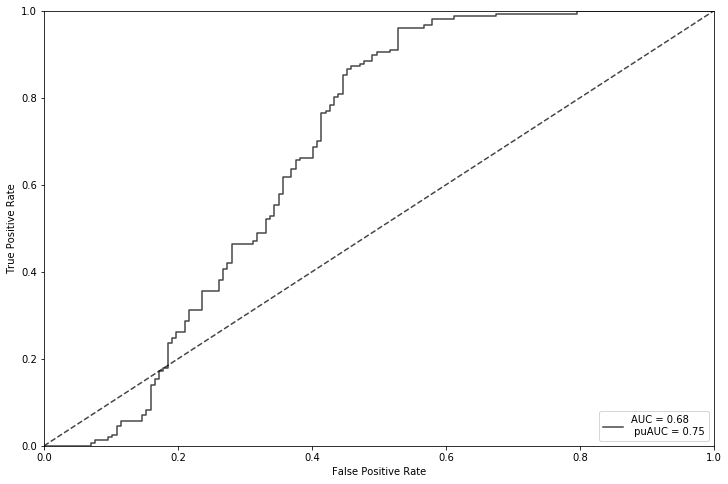

[0.03096528 0.23598682 0.26636596 0.07468155 0.08452084 0.03088962
 0.04998867 0.04968972 0.035467   0.01877467 0.02431805 0.0423413
 0.05601051]


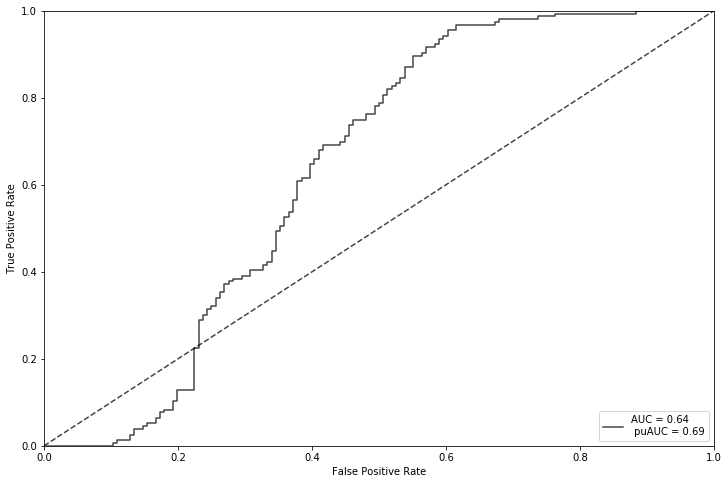

[0.02518541 0.2809462  0.24972842 0.02926831 0.04643295 0.05020737
 0.04495199 0.0575794  0.04345102 0.03679254 0.03644534 0.04169411
 0.05731692]


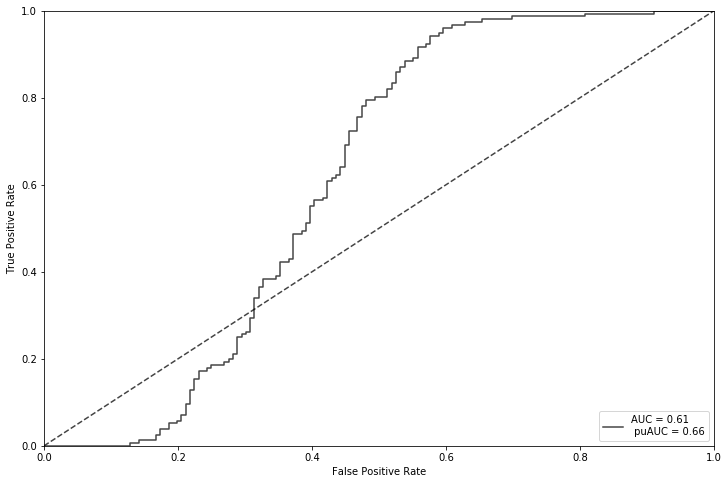

[0.02659341 0.24775681 0.26639765 0.05028624 0.08918269 0.03936106
 0.04135737 0.04413762 0.02979336 0.03335318 0.02987925 0.05532216
 0.0465792 ]


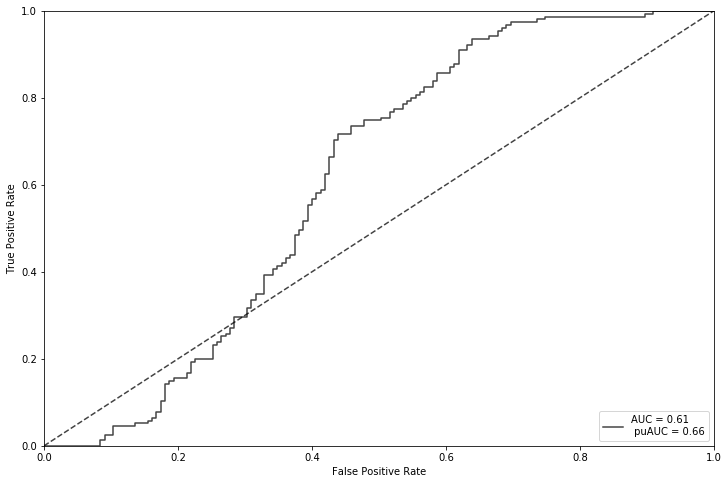

[0.03206514 0.31226639 0.27858219 0.05693589 0.04025752 0.05848672
 0.04117464 0.03821194 0.02163901 0.03459162 0.0170496  0.03846634
 0.03027299]


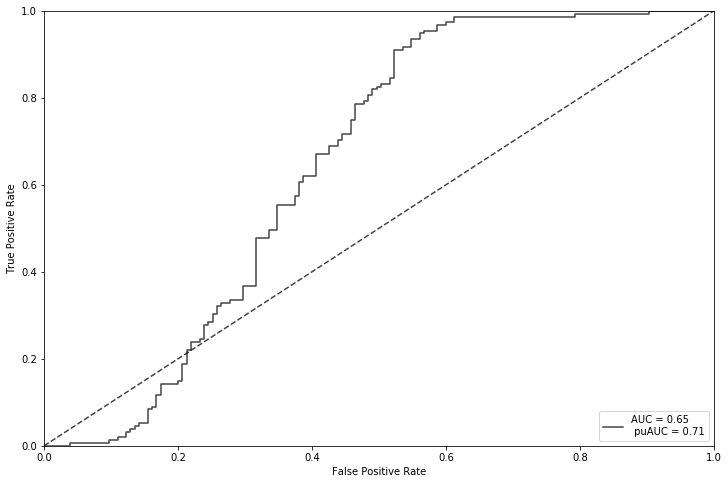

[0.02910491 0.23868331 0.23486852 0.06367043 0.07164529 0.04761502
 0.03913049 0.03781226 0.03712155 0.03021608 0.02922571 0.08358571
 0.05732072]


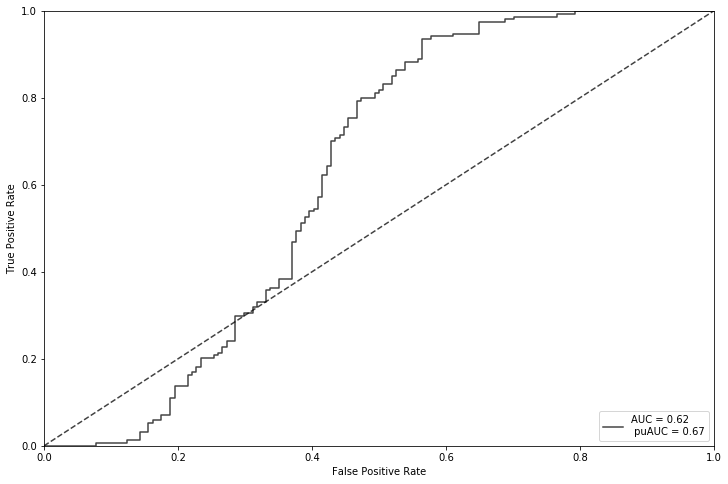

[0.05073923 0.29913187 0.21602315 0.04179753 0.0432014  0.05252727
 0.04109539 0.04321413 0.03521743 0.02916763 0.02044306 0.07023917
 0.05720273]


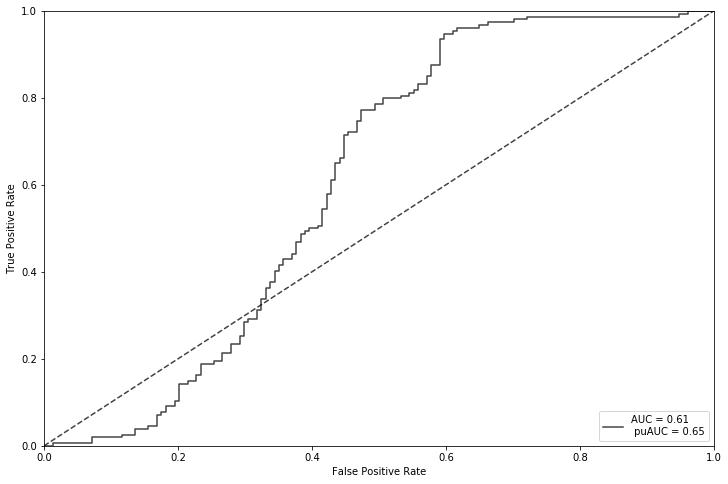

[0.01849421 0.21519878 0.32236743 0.05821101 0.07078053 0.03000814
 0.04294976 0.0381853  0.04895625 0.03935616 0.03741217 0.04388895
 0.03419128]


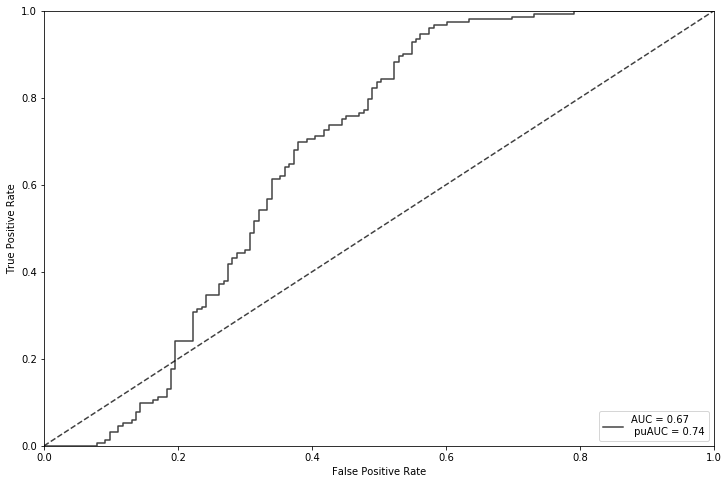

[0.01524199 0.24599677 0.3091064  0.04204075 0.04678095 0.0576292
 0.03491215 0.048837   0.0252051  0.02677893 0.03143061 0.0612815
 0.05475865]


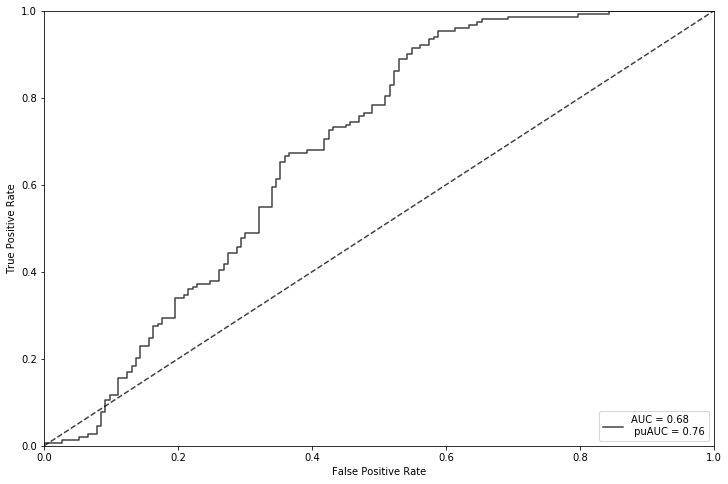

[0.01771716 0.24380312 0.33914998 0.05133061 0.05625683 0.03263681
 0.02951843 0.05756318 0.04194364 0.03188346 0.0190902  0.04035715
 0.03874941]


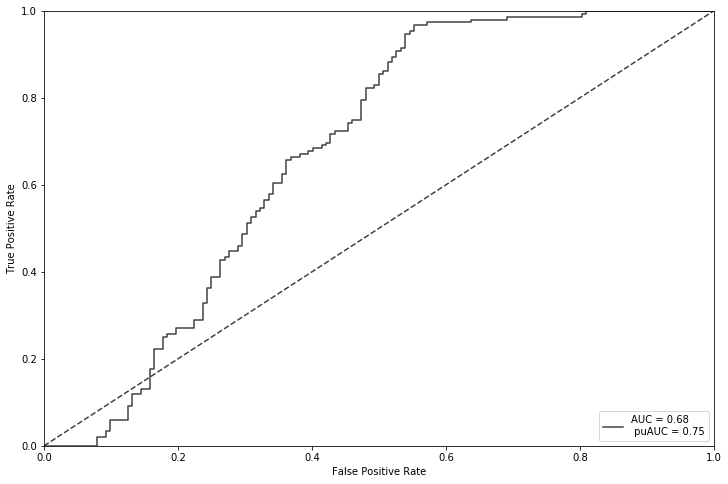

[0.0225066  0.26115414 0.2567347  0.02522304 0.06715952 0.03107142
 0.06937107 0.03950569 0.03594676 0.02539798 0.02915869 0.0604793
 0.07629111]


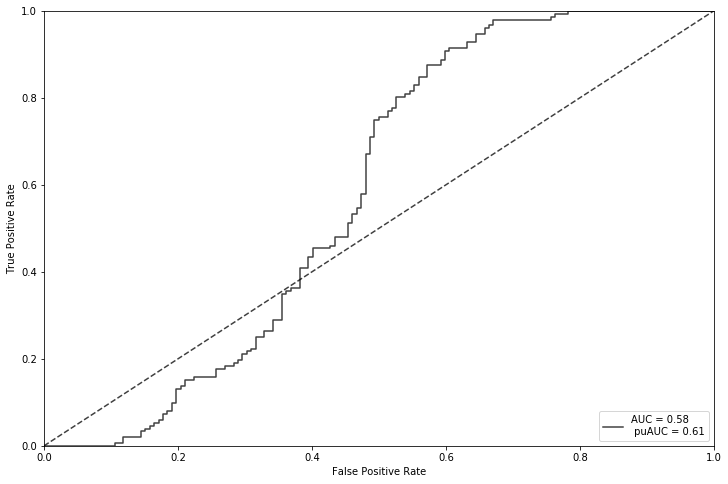

Total number of iterations: 275


In [37]:
gbs = gbs_base.copy()

n = 579
iterations = 500
auroc = iterations*[0]

for ite in range(iterations):
    
    gbs = gbs.reindex(np.random.permutation(gbs.index))

    fst = int(n/2) #first half
    lst = n - fst  #second half

    df_1 = gbs.head(fst).copy()
    df_2 = gbs.tail(lst).copy()

    train = pd.concat([gesis.sample(n=lst), df_2])
    test = pd.concat([gesis.sample(n=fst), df_1])

    y = train.Umfrage
    X = train.drop(columns=['Umfrage'], axis=1).copy()
    clf = RandomForestClassifier(n_estimators=500, max_depth=4)
    clf.fit(X, y)
    print(clf.feature_importances_)

    y_test = test.Umfrage
    X_test = test.drop(columns=['Umfrage'], axis=1).copy()

    preds = [i[1] for i in clf.predict_proba(X_test)]
    auroc[ite] = roc(y_test, preds, ite/iterations, ite)
    
    rem = df_1.drop(columns = ['Umfrage'], axis=1)
    result = [i[1] for i in clf.predict_proba(rem)]
    
    if (gbs.index[np.argmax(result)] > 0.5):
        gbs = gbs.drop(gbs.index[np.argmax(result)]).copy()
        n = n-1
    else:
        print("Total number of iterations: " + str(579 - n))
        break
        
#stats = gbs.describe()
#stats = stats.round(2)
#stats.to_csv(os.path.join(path, 'data/resultStatscsv'), encoding = "ISO-8859-1", index= False)

In [38]:
from PIL import Image

for name in range(579 - n):
    
    img = Image.open(os.path.join(path, 'tex/fig/roc/'+str(name)+'.png'))
    img = img.convert("RGBA")
    
    datas = img.getdata()
    newData = []
    for item in datas:
        if item[0] == 255 and item[1] == 255 and item[2] == 255:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)
    img.putdata(newData)
    img.save(os.path.join(path, 'tex/fig/roc/'+str(name)+'.png'), "PNG")

for ite in range(579 - n):
    background = Image.open(os.path.join(path, 'tex/fig/roc/roc.png'))
    foreground = Image.open(os.path.join(path, 'tex/fig/roc/'+str(ite)+'.png'))
    Image.alpha_composite(background,foreground).save(os.path.join(path, 'tex/fig/roc/roc.png'))

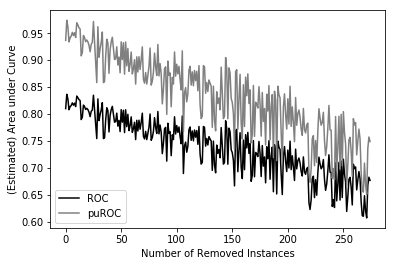

In [39]:
puRoc = []
for i in auroc:
    puRoc.append(puROC(i, 0.29))

plt.ylabel('(Estimated) Area under Curve')
plt.xlabel('Number of Removed Instances')
plt.plot(auroc[:(579 - n)], color='black', label = 'ROC')
plt.plot(puRoc[:(579 - n)], color='grey', label = 'puROC')
plt.legend(loc = 'lower left')

plt.savefig(os.path.join(path, 'tex/fig/roc_AUC2.png'))
plt.show()